In [1]:
from IPython.display import display, HTML

css_str = '''
    <style>
        div.text_cell_render {
            font-family: serif, serif;
            font-size: 120%;
            line-height: 180% !important;
        }

        hr {
            height: 1px;
        }
    </style>
'''

HTML(css_str)

<hr>

**Autores**: JESÚS ALBERTO GALLINAL MORENO, PABLO CASTAÑEDA, VÍCTOR ALDUNATE OSCARIZ y JAVIER BLANCO ÁLVAREZ

**Fecha**: 18/01/2024

**Asignatura**: *Programación Científica y HPC - PER 8406*

**Actividad (grupal)**: **Polinomios de Chebyshev y visualizaciones en Jupyter Notebooks**

<hr>

# Raíces de Polinomio Chebyshev
En este apartado se determinan las raíces de los polinomios de Chebyshev $T_{11}$ y $T_{21}$ que a su vez serán los nodos utilizados para los distintos métodos de interpolación requeridos en la actividad

## Bibliotecas y dependencias

In [2]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev


## Funciones de trabajo

Las funciones que analizaremos en esta actividad son:

* $f(x) = \sin(x)$

* $f(x) = \frac{1}{1 + 25x^2}$

* $f(x) = e^{-20x^2}$



En python vendrían definidas como:

In [3]:
#Funciones de trabajo

def y_1(x:np.array)->np.array:
  '''
  Devuelve el resultado del seno de cada elemento de x
    y = np.sin(x)
  inputs:
    x (np.array): arreglo unidimensional de valores de x en radianes

  return:
    sin(x) (np.array): seno del ángulo para cada valor de x
  '''
  return np.sin(x)

def y_2(x:np.array)->np.array:
  '''
  Devuelve el resultado de la expresión 1/(1+(25*x**2)) para cada elemento de x
    y = 1/(1+(25*x**2))
  inputs:
    x(np.array): arreglo unidimensional de valores de x

  return:
    1/(1+(25*x**2)) (np.array): resultado de la expresión dada para cada valor de x
  '''
  return 1/(1+(25*x**2))

def y_3(x:np.array)->np.array:
  '''
  Devuelve el resultado de la expresión np.exp(-20*x**2) para cada elemento de x
    y = np.exp(-20*x**2)
  inputs:
    x (np.array): arreglo unidimensional de valores de x

  return:
    np.exp(-20*x**2) (np.array): resultado de la expresión para cada valor de x
  '''

  return np.exp(-20*x**2)

Para determinar el rango de valores más apropiado para evaluar las funciones mencionadas, se lleva a cabo un análisis del dominio de cada función.

El dominio de la función $f(x)=sin(x)$ pertenece a todos los reales, lo que podemos acotar los valores de entrada x en una revolución completa: $[-\pi, \pi]$.

Esta misma propiedad se extiende al dominio de las funciones $f(x) = \frac{1}{1 + 25x^2}$ y $f(x) = e^{-20x^2}$ ya que ambas pertenecen al conjunto de todos los números reales, dado que el valor de x es elevado al cuadrado.

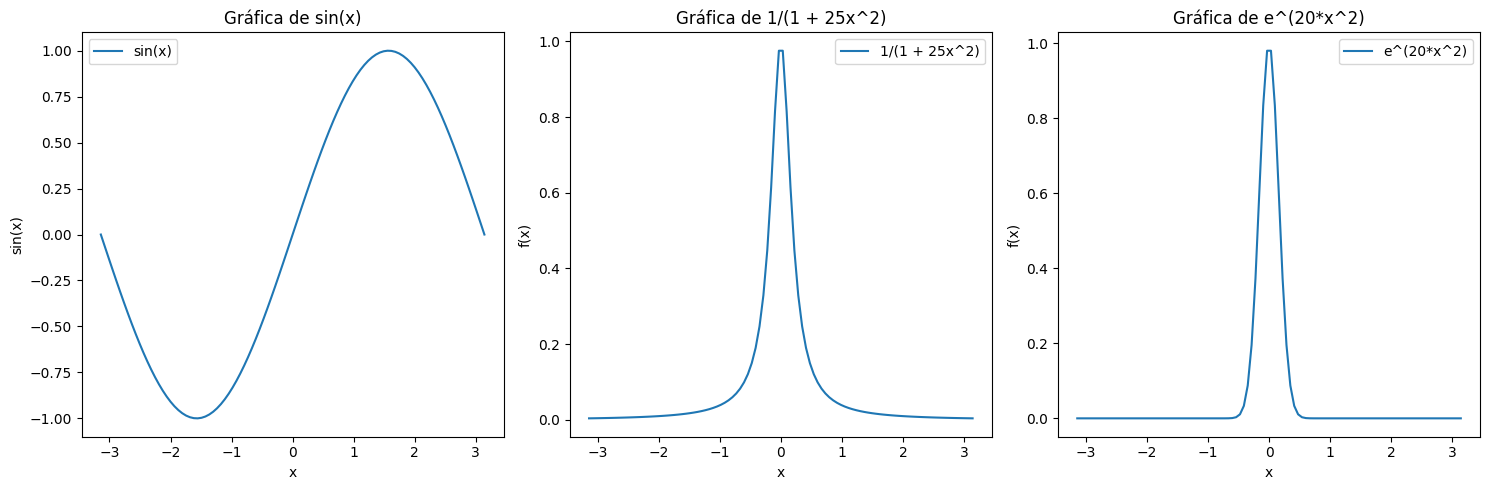

In [4]:
x = np.linspace(-np.pi, np.pi, 100) #valores de x

#funciones evaluadas en un rango dado para visualizar su dominio
y_f1 = y_1(x)
y_f2 = y_2(x)
y_f3 = y_3(x)

# Subgráficos
plt.figure(figsize=(15, 5))

# f(x) = sin(x)
plt.subplot(1, 3, 1)
plt.plot(x, y_f1, label='sin(x)')
plt.title('Gráfica de sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')

plt.legend()

# f(x) = 1/(1 + 25x^2)
plt.subplot(1, 3, 2)
plt.plot(x, y_f2, label='1/(1 + 25x^2)')
plt.title('Gráfica de 1/(1 + 25x^2)')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()

# f(x) = e^(20*x^2)
plt.subplot(1, 3, 3)
plt.plot(x, y_f3, label='e^(20*x^2)')
plt.title('Gráfica de e^(20*x^2)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()


plt.tight_layout()
plt.show()

## Raíces de los Polinomios
### Polinomio de grado 11

Se ha utilizado la biblioteca `numpy.polynomial.chebyshev` para calcular las raíces del polinomio de Chebyshev de grado 11 en el intervalo $[-\pi, \pi]$
Se utiliza el método `roots()` para calcular las raíces del polinomio de Chebyshev. Estas raíces son los valores de $x$ para los cuales el polinomio se anula

In [5]:
#para 11 nodos
coeffs_cheb_11 = [0] * 11 + [1]
T11 = chebyshev.Chebyshev(coeffs_cheb_11, [-np.pi, np.pi])
roots_ch_11 = T11.roots()
roots_ch_11


array([-3.10961577e+00, -2.85769319e+00, -2.37425731e+00, -1.69847322e+00,
       -8.85088931e-01, -4.46691646e-17,  8.85088931e-01,  1.69847322e+00,
        2.37425731e+00,  2.85769319e+00,  3.10961577e+00])

### Polinomio grado 21
Análogamente al paso anterior,  se determinan las raíces del polinomio grado 21 con los valores de $x$ para los cuales el polinomio se anula en el intervalo $[-\pi, \pi]$

In [6]:
#para 21 nodos
coeffs_cheb_21 = [0] * 21 + [1]
T21 = chebyshev.Chebyshev(coeffs_cheb_21, [-np.pi, np.pi])
roots_ch_21 = T21.roots()
roots_ch_21

array([-3.13280812e+00, -3.06282637e+00, -2.92442613e+00, -2.72069905e+00,
       -2.45619604e+00, -2.13682568e+00, -1.76972216e+00, -1.36308597e+00,
       -9.26000691e-01, -4.68230088e-01, -5.29500782e-16,  4.68230088e-01,
        9.26000691e-01,  1.36308597e+00,  1.76972216e+00,  2.13682568e+00,
        2.45619604e+00,  2.72069905e+00,  2.92442613e+00,  3.06282637e+00,
        3.13280812e+00])

## Comprobación Gráfica
A continuación se muestran los puntos de interpolación de Chebyshev grado 11 y 21 para cada una de las funciones de trabajo.

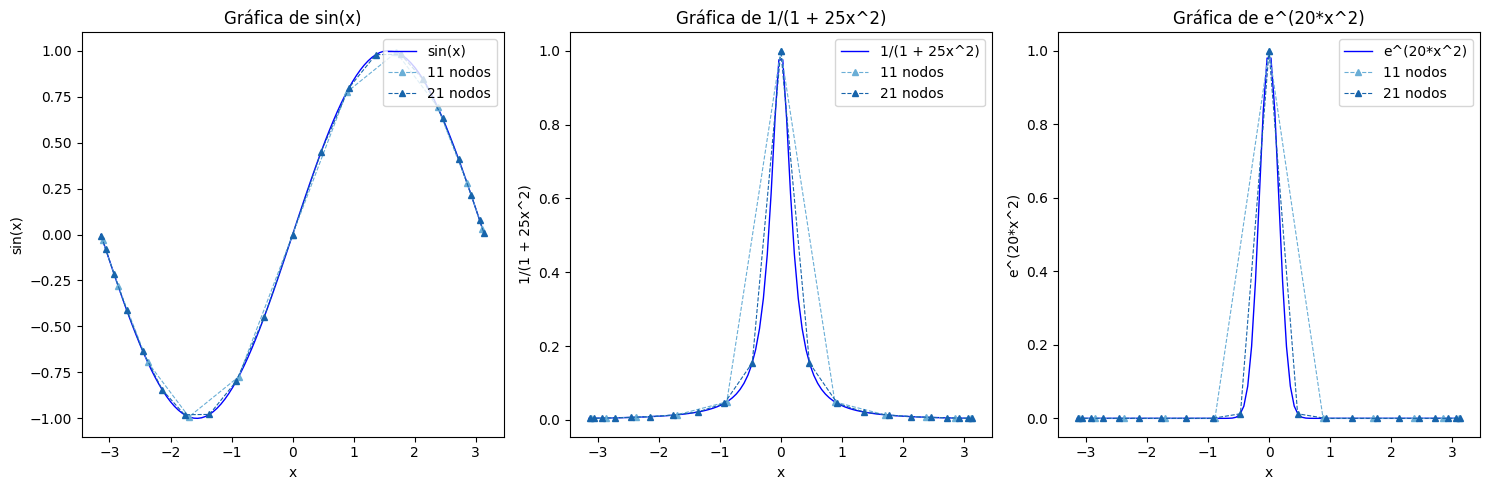

In [7]:
import matplotlib.cm as cm
cmap = cm.Blues


plt.figure(figsize=(15, 5))
# f(x) = sin(x)
plt.subplot(1, 3, 1)
plt.plot(x, y_f1, label='sin(x)', linestyle='-', color='blue', linewidth=1)
plt.plot(roots_ch_11, y_1(roots_ch_11), label='11 nodos',linewidth=0.8, color=cmap(0.5), linestyle='--', marker='^', markersize=4)
plt.plot(roots_ch_21, y_1(roots_ch_21), label='21 nodos',linewidth=0.8, color=cmap(0.8), linestyle='--', marker='^', markersize=4)
plt.title('Gráfica de sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend(loc='upper right')



# f(x) = 1/(1 + 25x^2)
plt.subplot(1, 3, 2)
plt.plot(x, y_f2, label='1/(1 + 25x^2)', linestyle='-', color='blue', linewidth=1)
plt.plot(roots_ch_11, y_2(roots_ch_11), label='11 nodos',linewidth=0.8, color=cmap(0.5), linestyle='--', marker='^', markersize=4)
plt.plot(roots_ch_21, y_2(roots_ch_21), label='21 nodos',linewidth=0.8, color=cmap(0.8), linestyle='--', marker='^', markersize=4)
plt.title('Gráfica de 1/(1 + 25x^2)')
plt.xlabel('x')
plt.ylabel('1/(1 + 25x^2)')
plt.legend(loc='upper right')

# f(x) = e^(20*x^2)
plt.subplot(1, 3, 3)
plt.plot(x, y_f3, label='e^(20*x^2)', linestyle='-', color='blue', linewidth=1)
plt.plot(roots_ch_11, y_3(roots_ch_11), label='11 nodos',linewidth=0.8, color=cmap(0.5), linestyle='--', marker='^', markersize=4)
plt.plot(roots_ch_21, y_3(roots_ch_21), label='21 nodos',linewidth=0.8, color=cmap(0.8), linestyle='--', marker='^', markersize=4)
plt.title('Gráfica de e^(20*x^2)')
plt.xlabel('x')
plt.ylabel('e^(20*x^2)')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Guardamos los nodos generados para su uso posterior y también generaremos los nodos equiespaciados.

In [8]:
np.savetxt('nodos_21.txt', roots_ch_21)
np.savetxt('nodos_11.txt', roots_ch_11)

nodos_equis_11 = np.linspace(-np.pi, np.pi, num=11)
nodos_equis_21 = np.linspace(-np.pi, np.pi, num=21)

np.savetxt('nodos_equis_21.txt', nodos_equis_21)
np.savetxt('nodos_equis_11.txt', nodos_equis_11)

# **Interpolación Baricéntrica** 


La interpolación baricéntrica es un método utilizado en matemáticas y gráficos computacionales para aproximar valores intermedios dentro de un conjunto de datos discretos. Se aplica comúnmente en el contexto de la interpolación polinómica, donde se busca encontrar un polinomio que pase a través de un conjunto dado de puntos.

La idea fundamental detrás de la interpolación baricéntrica es representar el polinomio interpolante en la forma de una combinación lineal de polinomios básicos, llamados polinomios baricéntricos. Estos polinomios se construyen de manera que tomen el valor 1 en uno de los puntos de datos conocidos y 0 en los demás. La fórmula general para el polinomio interpolante P(x) en la interpolación baricéntrica se puede expresar como:

$$ P(x) = \sum_{i=0}^{n} f_i \cdot l_i(x) $$

Donde:
- $n$ es el número total de puntos de datos conocidos.
- $f_i$ es el valor de la función en el punto $x_i$.
- $l_i(x)$ son los polinomios baricéntricos asociados a los puntos de datos, definidos como:

$$ l_i(x) = \frac{1}{\prod_{j=0, j\neq i}^{n} (x_i - x_j)} $$


La expresión anterior representa el producto de las diferencias $x_i - x_j$ para $j$ diferente de $i$, lo cual asegura que $l_i(x_j) = 0$ cuando $j$ es diferente de $i$. Además, $l_i(x_i)$ toma el valor de 1, cumpliendo así la condición de interpolación.

Para la realización de esta actividad se empleará la función `baricentric_interpolate` incluida en la libreria `scipy.interpolate` que construye un polinomio que pasa por un conjunto dado de puntos y luego evalúa el polinomio

## Bibliotecas y dependencias

In [9]:
import time
import numpy as np
from scipy.interpolate import barycentric_interpolate
import matplotlib.pyplot as plt

## Nodos de interpolación
Importamos los nodos de interpolación que ya hemos determinado mediante el método de `Chebyshev`

In [10]:
x_11_equis = np.loadtxt('nodos_equis_11.txt', delimiter='\t')
x_21_equis = np.loadtxt('nodos_equis_21.txt', delimiter='\t')
x_11 = np.loadtxt('nodos_11.txt', delimiter='\t')
x_21 = np.loadtxt('nodos_21.txt', delimiter='\t')

## Función **f(x) = sin(x)**

Para 11 nodos equiespaciados:

Tiempo de obtención del polinomio: 0.00309610 segundos


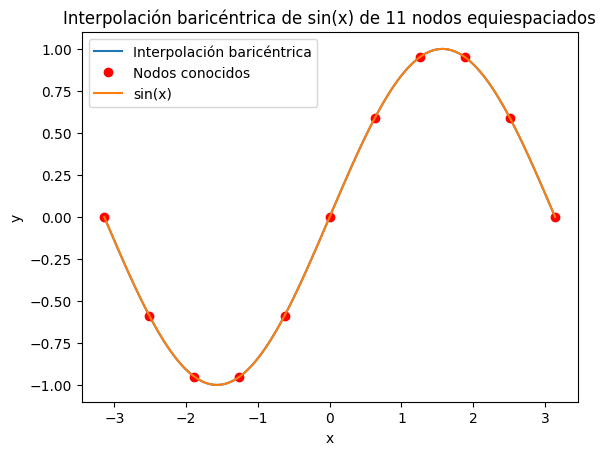

In [11]:
# Definir la función seno
def f(x):
    return np.sin(x)

# Definir los 11 nodos
nodes = x_11_equis

# Calcular la interpolación para varios puntos en el rango
x_range = np.linspace(min(nodes), max(nodes), 150) #Dependiendo de la precisión que queramos habrá que cambiar el valor de 150, si ponemos menos será menos preciso

tiempo0 = time.time()
interpolated_values = barycentric_interpolate(nodes, f(nodes), x_range)
tiempo_tot = time.time() - tiempo0

# Imprimir el tiempo de obtención del polinomio
print(f"Tiempo de obtención del polinomio: {tiempo_tot:.8f} segundos")

# Graficar los resultados
plt.plot(x_range, interpolated_values, label='Interpolación baricéntrica')
plt.plot(nodes, f(nodes), 'ro', label='Nodos conocidos')
plt.plot(x_range, f(x_range), label='sin(x)')
plt.legend()
plt.title('Interpolación baricéntrica de sin(x) de 11 nodos equiespaciados')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Para 11 nodos de Chebyshev:

Tiempo de obtención del polinomio: 0.00100040 segundos


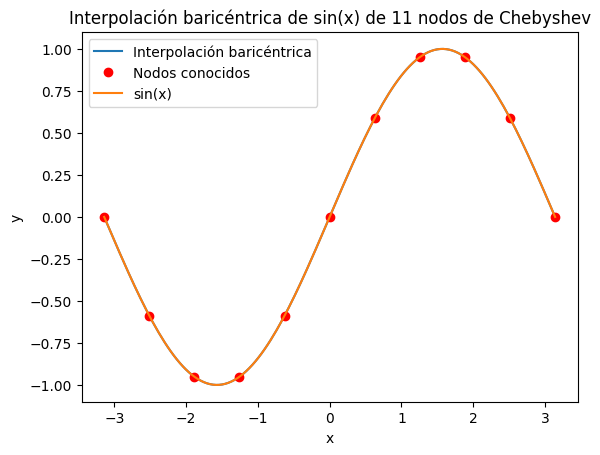

In [12]:
# Definir la función seno
def f(x):
    return np.sin(x)

# Definir los 11 nodos
nodes = x_11_equis

# Calcular la interpolación para varios puntos en el rango
x_range = np.linspace(min(nodes), max(nodes), 150) #Dependiendo de la precisión que queramos habrá que cambiar el valor de 150, si ponemos menos será menos preciso

tiempo0 = time.time()
interpolated_values = barycentric_interpolate(nodes, f(nodes), x_range)
tiempo_tot = time.time() - tiempo0

# Imprimir el tiempo de obtención del polinomio
print(f"Tiempo de obtención del polinomio: {tiempo_tot:.8f} segundos")

# Graficar los resultados
plt.plot(x_range, interpolated_values, label='Interpolación baricéntrica')
plt.plot(nodes, f(nodes), 'ro', label='Nodos conocidos')
plt.plot(x_range, f(x_range), label='sin(x)')
plt.legend()
plt.title('Interpolación baricéntrica de sin(x) de 11 nodos de Chebyshev')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Para 21 nodos equiespaciados:

Tiempo de obtención del polinomio: 0.00100112 segundos


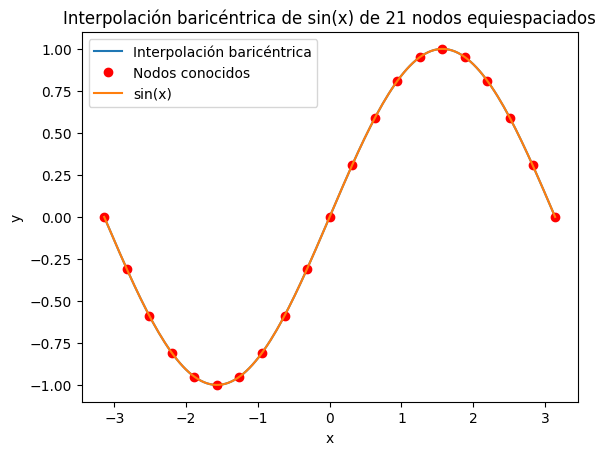

In [13]:
# Definir la función seno
def f(x):
    return np.sin(x)

# Definir los 21 nodos equiespaciados
nodes = x_21_equis

# Calcular la interpolación para varios puntos en el rango
x_range = np.linspace(min(nodes), max(nodes), 150)

tiempo0 = time.time()
interpolated_values = barycentric_interpolate(nodes, f(nodes), x_range)
tiempo_tot = time.time() - tiempo0

# Imprimir el tiempo de obtención del polinomio
print(f"Tiempo de obtención del polinomio: {tiempo_tot:.8f} segundos")

# Graficar los resultados
plt.plot(x_range, interpolated_values, label='Interpolación baricéntrica')
plt.plot(nodes, f(nodes), 'ro', label='Nodos conocidos')
plt.plot(x_range, f(x_range), label='sin(x)')
plt.legend()
plt.title('Interpolación baricéntrica de sin(x) de 21 nodos equiespaciados')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Para 21 nodos de Chebyshev:

Tiempo de obtención del polinomio: 0.00000000 segundos


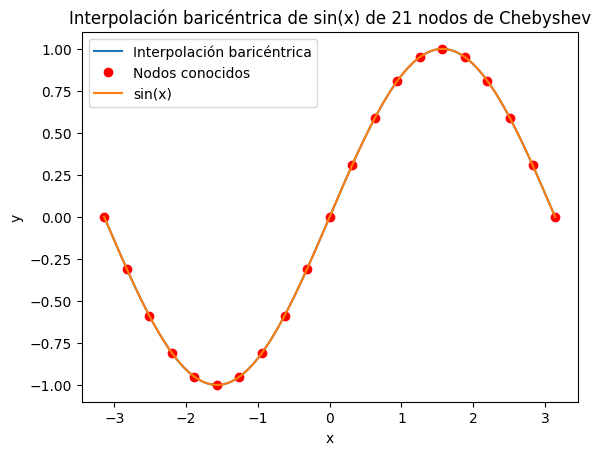

In [14]:
# Definir la función seno
def f(x):
    return np.sin(x)

# Definir los 21 nodos de Chebyshev
nodes = x_21_equis

# Calcular la interpolación para varios puntos en el rango
x_range = np.linspace(min(nodes), max(nodes), 150)

tiempo0 = time.time()
interpolated_values = barycentric_interpolate(nodes, f(nodes), x_range)
tiempo_tot = time.time() - tiempo0

# Imprimir el tiempo de obtención del polinomio
print(f"Tiempo de obtención del polinomio: {tiempo_tot:.8f} segundos")

# Graficar los resultados
plt.plot(x_range, interpolated_values, label='Interpolación baricéntrica')
plt.plot(nodes, f(nodes), 'ro', label='Nodos conocidos')
plt.plot(x_range, f(x_range), label='sin(x)')
plt.legend()
plt.title('Interpolación baricéntrica de sin(x) de 21 nodos de Chebyshev')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## **Función $f(x) = \frac{1}{1 + 25x^2}$**

Para 11 nodos equiespaciados:

Tiempo de obtención del polinomio: 0.00000000 segundos


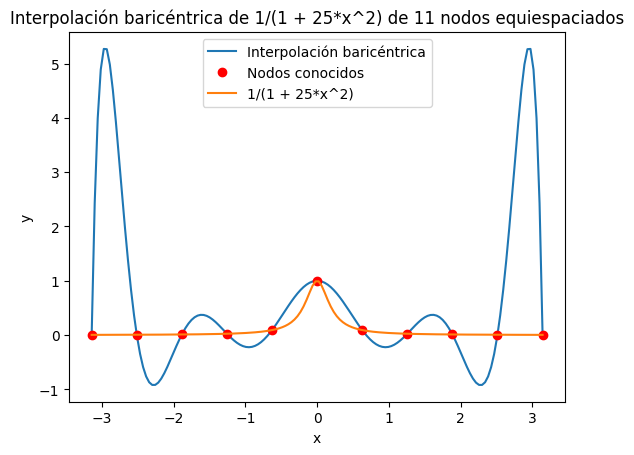

In [15]:
# Definir la función 1/(1 + 25*x^2)
def f(x):
    return 1 / (1 + 25 * x**2)

# Definir los 11 nodos equiespaciados
nodes = x_11_equis

# Calcular la interpolación para varios puntos en el rango
x_range = np.linspace(min(nodes), max(nodes), 150)

tiempo0 = time.time()
interpolated_values = barycentric_interpolate(nodes, f(nodes), x_range)
tiempo_tot = time.time() - tiempo0

# Imprimir el tiempo de obtención del polinomio
print(f"Tiempo de obtención del polinomio: {tiempo_tot:.8f} segundos")

# Graficar los resultados
plt.plot(x_range, interpolated_values, label='Interpolación baricéntrica')
plt.plot(nodes, f(nodes), 'ro', label='Nodos conocidos')
plt.plot(x_range, f(x_range), label='1/(1 + 25*x^2)')
plt.legend()
plt.title('Interpolación baricéntrica de 1/(1 + 25*x^2) de 11 nodos equiespaciados')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Para 11 nodos de Chebyshev:

Tiempo de obtención del polinomio: 0.00000000 segundos


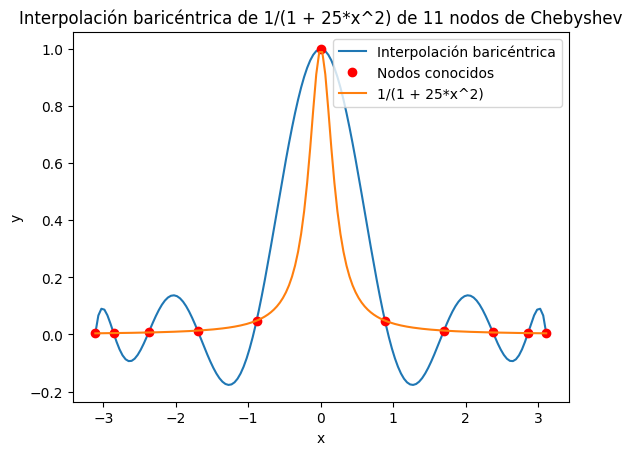

In [16]:
# Definir la función 1/(1 + 25*x^2)
def f(x):
    return 1 / (1 + 25 * x**2)

# Definir los 11 nodos de Chebyshev
nodes = x_11

# Calcular la interpolación para varios puntos en el rango
x_range = np.linspace(min(nodes), max(nodes), 150)

tiempo0 = time.time()
interpolated_values = barycentric_interpolate(nodes, f(nodes), x_range)
tiempo_tot = time.time() - tiempo0

# Imprimir el tiempo de obtención del polinomio
print(f"Tiempo de obtención del polinomio: {tiempo_tot:.8f} segundos")

# Graficar los resultados
plt.plot(x_range, interpolated_values, label='Interpolación baricéntrica')
plt.plot(nodes, f(nodes), 'ro', label='Nodos conocidos')
plt.plot(x_range, f(x_range), label='1/(1 + 25*x^2)')
plt.legend()
plt.title('Interpolación baricéntrica de 1/(1 + 25*x^2) de 11 nodos de Chebyshev')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Para 21 nodos equiespaciados:

Tiempo de obtención del polinomio: 0.00099969 segundos


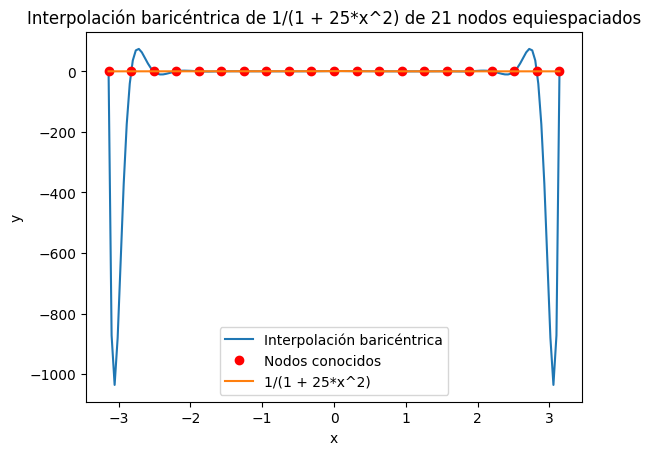

In [17]:
# Definir la función 1/(1 + 25*x^2)
def f(x):
    return 1 / (1 + 25 * x**2)

# Definir los 21 nodos equiespaciados
nodes = x_21_equis

# Calcular la interpolación para varios puntos en el rango
x_range = np.linspace(min(nodes), max(nodes), 150)

tiempo0 = time.time()
interpolated_values = barycentric_interpolate(nodes, f(nodes), x_range)
tiempo_tot = time.time() - tiempo0

# Imprimir el tiempo de obtención del polinomio
print(f"Tiempo de obtención del polinomio: {tiempo_tot:.8f} segundos")

# Graficar los resultados
plt.plot(x_range, interpolated_values, label='Interpolación baricéntrica')
plt.plot(nodes, f(nodes), 'ro', label='Nodos conocidos')
plt.plot(x_range, f(x_range), label='1/(1 + 25*x^2)')
plt.legend()
plt.title('Interpolación baricéntrica de 1/(1 + 25*x^2) de 21 nodos equiespaciados')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Para 21 nodos de Chebyshev:

Tiempo de obtención del polinomio: 0.00199819 segundos


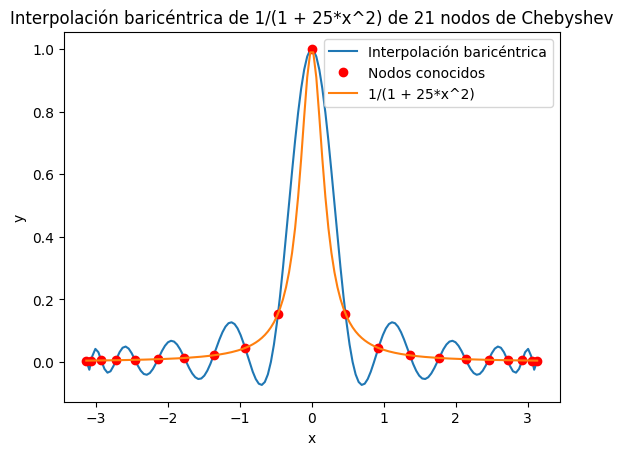

In [18]:
# Definir la función 1/(1 + 25*x^2)
def f(x):
    return 1 / (1 + 25 * x**2)

# Definir los 21 nodos de Chebyshev
nodes = x_21

# Calcular la interpolación para varios puntos en el rango
x_range = np.linspace(min(nodes), max(nodes), 150)

tiempo0 = time.time()
interpolated_values = barycentric_interpolate(nodes, f(nodes), x_range)
tiempo_tot = time.time() - tiempo0

# Imprimir el tiempo de obtención del polinomio
print(f"Tiempo de obtención del polinomio: {tiempo_tot:.8f} segundos")

# Graficar los resultados
plt.plot(x_range, interpolated_values, label='Interpolación baricéntrica')
plt.plot(nodes, f(nodes), 'ro', label='Nodos conocidos')
plt.plot(x_range, f(x_range), label='1/(1 + 25*x^2)')
plt.legend()
plt.title('Interpolación baricéntrica de 1/(1 + 25*x^2) de 21 nodos de Chebyshev')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Función $f(x)=e^{-20 x^2}$

Para 11 nodos equiespaciados:


Tiempo de obtención del polinomio: 0.00101161 segundos


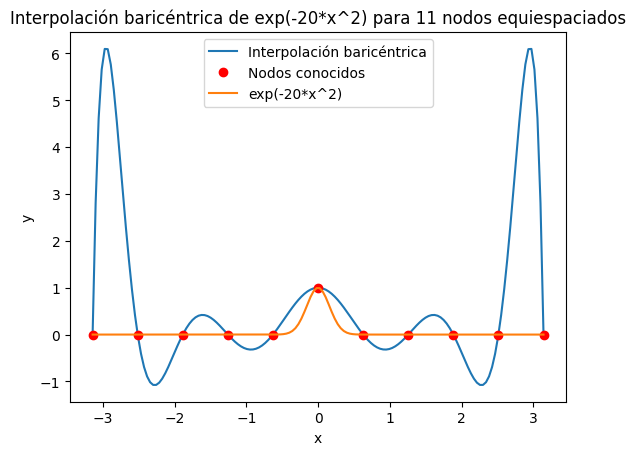

In [19]:
# Definir la función exp(-20*x^2)
def f(x):
    return np.exp(-20 * x**2)

# Definir los 11 nodos equiespaciados
nodes = x_11_equis

# Calcular la interpolación para varios puntos en el rango
x_range = np.linspace(min(nodes), max(nodes), 150)

tiempo0 = time.time()
interpolated_values = barycentric_interpolate(nodes, f(nodes), x_range)
tiempo_tot = time.time() - tiempo0

# Imprimir el tiempo de obtención del polinomio
print(f"Tiempo de obtención del polinomio: {tiempo_tot:.8f} segundos")

# Graficar los resultados
plt.plot(x_range, interpolated_values, label='Interpolación baricéntrica')
plt.plot(nodes, f(nodes), 'ro', label='Nodos conocidos')
plt.plot(x_range, f(x_range), label='exp(-20*x^2)')
plt.legend()
plt.title('Interpolación baricéntrica de exp(-20*x^2) para 11 nodos equiespaciados')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Para 21 nodos de Chebyshev:

Tiempo de obtención del polinomio: 0.00100183 segundos


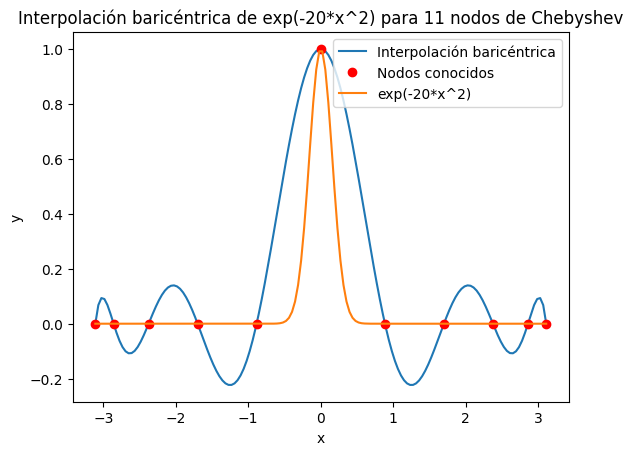

In [20]:
# Definir la función exp(-20*x^2)
def f(x):
    return np.exp(-20 * x**2)

# Definir los 11 nodos de Chebyshev
nodes = x_11

# Calcular la interpolación para varios puntos en el rango
x_range = np.linspace(min(nodes), max(nodes), 150)

tiempo0 = time.time()
interpolated_values = barycentric_interpolate(nodes, f(nodes), x_range)
tiempo_tot = time.time() - tiempo0

# Imprimir el tiempo de obtención del polinomio
print(f"Tiempo de obtención del polinomio: {tiempo_tot:.8f} segundos")

# Graficar los resultados
plt.plot(x_range, interpolated_values, label='Interpolación baricéntrica')
plt.plot(nodes, f(nodes), 'ro', label='Nodos conocidos')
plt.plot(x_range, f(x_range), label='exp(-20*x^2)')
plt.legend()
plt.title('Interpolación baricéntrica de exp(-20*x^2) para 11 nodos de Chebyshev')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Para 21 nodos equiespaciados:

Tiempo de obtención del polinomio: 0.00000000 segundos


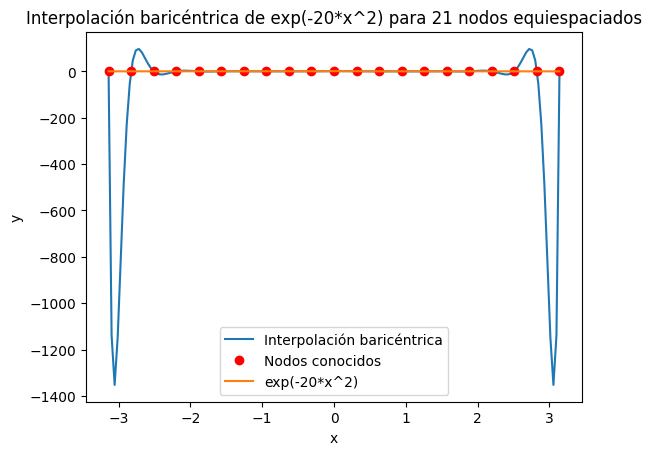

In [21]:
# Definir la función exp(-20*x^2)
def f(x):
    return np.exp(-20 * x**2)

# Definir los 21 nodos equiespaciados
nodes = x_21_equis

# Calcular la interpolación para varios puntos en el rango
x_range = np.linspace(min(nodes), max(nodes), 150)

tiempo0 = time.time()
interpolated_values = barycentric_interpolate(nodes, f(nodes), x_range)
tiempo_tot = time.time() - tiempo0

# Imprimir el tiempo de obtención del polinomio
print(f"Tiempo de obtención del polinomio: {tiempo_tot:.8f} segundos")

# Graficar los resultados
plt.plot(x_range, interpolated_values, label='Interpolación baricéntrica')
plt.plot(nodes, f(nodes), 'ro', label='Nodos conocidos')
plt.plot(x_range, f(x_range), label='exp(-20*x^2)')
plt.legend()
plt.title('Interpolación baricéntrica de exp(-20*x^2) para 21 nodos equiespaciados')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Para 21 nodos de Chebyshev:

Tiempo de obtención del polinomio: 0.00100541 segundos


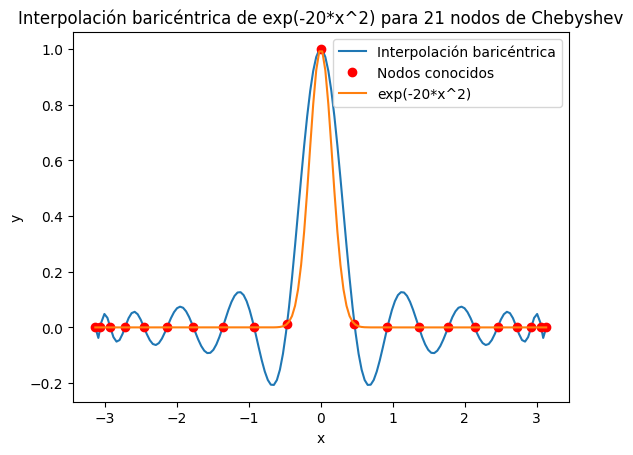

In [22]:
# Definir la función exp(-20*x^2)
def f(x):
    return np.exp(-20 * x**2)

# Definir los 21 nodos de Chebyshev
nodes = x_21

# Calcular la interpolación para varios puntos en el rango
x_range = np.linspace(min(nodes), max(nodes), 150)

tiempo0 = time.time()
interpolated_values = barycentric_interpolate(nodes, f(nodes), x_range)
tiempo_tot = time.time() - tiempo0

# Imprimir el tiempo de obtención del polinomio
print(f"Tiempo de obtención del polinomio: {tiempo_tot:.8f} segundos")

# Graficar los resultados
plt.plot(x_range, interpolated_values, label='Interpolación baricéntrica')
plt.plot(nodes, f(nodes), 'ro', label='Nodos conocidos')
plt.plot(x_range, f(x_range), label='exp(-20*x^2)')
plt.legend()
plt.title('Interpolación baricéntrica de exp(-20*x^2) para 21 nodos de Chebyshev')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Método de Interpolación de Lagrange
Es un método numérico que genera un polinomio único de grado `n` que pasa por los `n+1` puntos de una función dentro de un intervalo cerrado (Triguero, P. 2023). Esto se fundamenta en el **Teorema de Weierstrass** que establece que dada una función definida existe un polinomio que se ajusta cuanto se necesite a dicha función (Pinkus, A. 2000).

### Fundamento matemático
Para el método de Lagrange se tendrán `n` funciones que llamaremos $L_i(xi)$, por lo que notación pasa a $L_{n,i}(x)$. Sin pormenorizar demasiado en la demostración formal de este método podemos establecer que:

$$L_{n,i}(x) = \prod_{j=0 \atop j \neq i}^{n} \frac{(x - x_j)}{(x_i - x_j)}$$

Así, el polinomio de interpolación de Lagrange $p_n(x)$ de grado `n` tiene la siguiente forma general:

$$ p_n(x) = L_{n,0}(x)f(x_0) + L_{n,1}(x)f(x_1) + \dots + L_{n,n}(x)f(x_n) = \sum_{i=1}^{n} L_{n,i}(x)f(x_i)$$

### Aplicación computacional
Dentro del extenso ecosistema de Python se destaca la biblioteca de computación científica conocida como `Scipy`. En este marco, se encuentra un módulo dedicado a la interpolación, que incluye el método de [Lagrange](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html#scipy.interpolate.lagrange), que utilizaremos en esta actividad:

*`scipy.interpolate.lagrange(x, w)`

Éste método devuelve un polinomio de interpolación de Lagrange.

**Importante:** De acuerdo con la [documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html#scipy.interpolate.lagrange) oficial de Scipy `version 1.11.4`, la implementación de Lagrange es numéricamente **inestable**. Por lo que no se recomienda utilizar más de unos 20 puntos incluso si se eligieron de manera óptima.

## Funciones
* $f(x) = \sin(x)$

* $f(x) = \frac{1}{1 + 25x^2}$

* $f(x) = e^{-20x^2}$


## Bibliotecas y dependencias

In [23]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
cmap = cm.jet

## Nodos de interpolación
Importamos los nodos de interpolación que ya hemos determinado mediante el método de `Chebyshev` y además los nodos equiespaciados

In [24]:
x_ch_11 = np.loadtxt('nodos_11.txt', delimiter='\t')
x_ch_21 = np.loadtxt('nodos_21.txt', delimiter='\t')

x_equi_11 = np.loadtxt('nodos_equis_11.txt', delimiter='\t')
x_equi_21 = np.loadtxt('nodos_equis_21.txt', delimiter='\t')

## Polinomio de interpolación
Definimos nuevamente las funciones en Python

In [25]:
#Funciones de trabajo

def y_1(x:np.array)->np.array:
  '''
  Devuelve el resultado del seno de cada elemento de x
    y = np.sin(x)
  inputs:
    x (np.array): arreglo unidimensional de valores de x en radianes

  return:
    sin(x) (np.array): seno del ángulo para cada valor de x
  '''
  return np.sin(x)

def y_2(x:np.array)->np.array:
  '''
  Devuelve el resultado de la expresión 1/(1+(25*x**2)) para cada elemento de x
    y = 1/(1+(25*x**2))
  inputs:
    x(np.array): arreglo unidimensional de valores de x

  return:
    1/(1+(25*x**2)) (np.array): resultado de la expresión dada para cada valor de x
  '''
  return 1/(1+(25*x**2))

def y_3(x:np.array)->np.array:
  '''
  Devuelve el resultado de la expresión np.exp(-20*x**2) para cada elemento de x
    y = np.exp(-20*x**2)
  inputs:
    x (np.array): arreglo unidimensional de valores de x

  return:
    np.exp(-20*x**2) (np.array): resultado de la expresión para cada valor de x
  '''

  return np.exp(-20*x**2)

Determinamos el Polinomio de interpolación para cada función dados 11 y 21 nodos (x array) en cada función, calcularemos el tiempo de ejecución y graficaremos la solución obtenida con puntos equiespaciados de x.

### Cálculos del error y tiempos de ejecución

Para el cálculo del error utilizaremos la ecuación del error absoluto definido en la siguiente expresión:
$$err = \left\| P(x) - f(x) \right\|$$

Donde $f(x)$, la función que se va a aproximar y $P(x)$ el polinomio de Lagrange obtenido.

El cálculo del tiempo de ejecución se ejecutará mediante la función `time` ejecutada en `bash`

### función sin(x)

* Para 11 nodos de `Chebyshev`

El polinomio obtenido es de grado 10 desde donde posteriormente extraremos los coeficientes.

In [26]:
%%time
w_ch_11_f1 = y_1(x_ch_11) # f(x)
poly_ch_11_f1 = lagrange(x_ch_11, w_ch_11_f1) # Polinomio de grado 10
Polynomial(poly_ch_11_f1.coef[::-1]) # resultado simbólico del polinomio

CPU times: total: 0 ns
Wall time: 3 ms


Polynomial([-9.45195531e-22,  9.99978840e-01,  9.45099034e-16, -1.66623646e-01,
        5.52943108e-17,  8.30871554e-03,  8.63567030e-17, -1.92613589e-04,
       -2.76878130e-17,  2.14623571e-06,  5.61582844e-19], domain=[-1,  1], window=[-1,  1], symbol='x')

podemos extraer los coeficientes del polinomio obtenido de la siguiente forma:

In [27]:
coeffs_ch_11_f1 = Polynomial(poly_ch_11_f1.coef[::-1]).coef
coeffs_ch_11_f1

array([-9.45195531e-22,  9.99978840e-01,  9.45099034e-16, -1.66623646e-01,
        5.52943108e-17,  8.30871554e-03,  8.63567030e-17, -1.92613589e-04,
       -2.76878130e-17,  2.14623571e-06,  5.61582844e-19])

A continuación, graficaremos los resultados obtenidos a fin de comparar la bondad de ajuste entre el resultado real y la aproximación polinomial. El dominio de las funciones será el mismo utilizado al momento de encontrar los nodos de `Chebyshev`, es decir en el intervalo $[-\pi , \pi]$

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


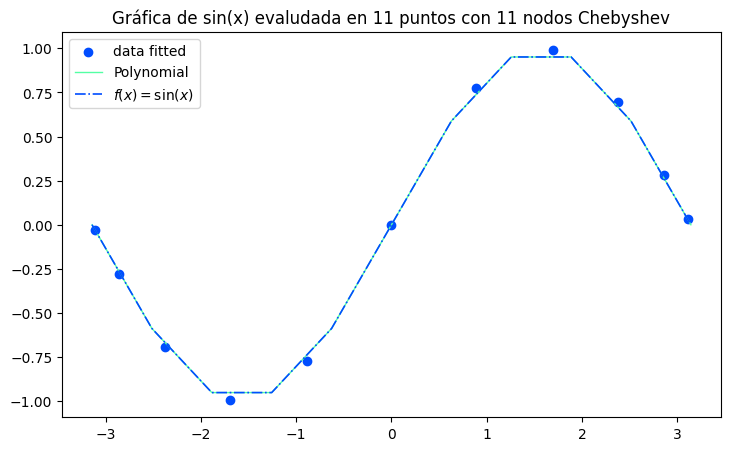

In [28]:
x = np.linspace(-np.pi, np.pi, 11)
plt.figure(figsize=(8.5,5))
plt.scatter(x_ch_11, w_ch_11_f1, label='data fitted',c=cmap(0.2))
plt.plot(x, Polynomial(poly_ch_11_f1.coef[::-1])(x), label='Polynomial', linewidth=1, color=cmap(0.45))
plt.plot(x, y_1(x),
         label=r"$f(x) = \sin(x)$", linestyle='-.', linewidth=1.2, color=cmap(0.2))
plt.title(f'Gráfica de sin(x) evaludada en 11 puntos con 11 nodos Chebyshev')
plt.legend()
plt.show()

In [29]:
#error absoluto
e = np.sum(np.abs((poly_ch_11_f1(x) - y_1(x))))
print(f'Error absoluto: {e:.8f}')


Error absoluto: 0.00004926


* Para 21 nodos de `Chebyshev`

Llegados a este punto, podemos definir una función general que englobe los pasos anteriores y que pueda ser reproducida en las siguientes implementaciones. La función definida lleva por nombre: `lagrange_interpolation`

In [30]:
def lagrange_interpolation(x_data:np.array,
                           w_data:np.array,
                           f_evaluate:callable,
                           f_name:str,
                           interval:list,
                           n:int,
                           method:str='Chebyshev')->tuple:
    '''
    Realiza la interpolación polinómica de Lagrange y devuelve el polinomio simbólico obtenido, sus coeficientes
    y el error absoluto porcentual obtenido con respecto a la función evaluada.

    Parámetros:
    - x_data (np.array): Array de datos x.
    - w_data (np.array): Array de datos y correspondientes a x o f(x).
    - f_evaluate(callable): Función que será evaluada graficamente.
    - f_name (str): Etiqueta para la función a evaluar en la demostración gráfica, en formato LATeX.
    - interval (list): Intervalo cerrado donde estará definida la función.
    - n (int): Número de puntos a generar en el intervalo.

    Devuelve:
    - tuple: Tupla que contiene el polinomio simbólico, sus coeficientes y el error absoluto.

    Ejemplo de uso:
    poly_symb, coeffs, err = lagrange_interpolation(x_data, w_data, '$Función a Evaluar$', [a, b], num_points)

    '''
    x = np.linspace(interval[0], interval[1], n)
    n_nodos = len(x_data)
    poly_fitted = lagrange(x_data, w_data) # Polinomio de grado [length(x_data) - 1]
    poly_symb = Polynomial(poly_fitted.coef[::-1]) # resultado simbólico del polinomio
    coeffs = Polynomial(poly_fitted.coef[::-1]).coef # obtención de coeficientes en orden inverso
    err = np.sum(np.absolute((poly_fitted(x) - f_evaluate(x))))
    err = "{:.4f}".format(err)


    # demostración gráfica
    plt.figure(figsize=(8.5,5))
    plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))
    plt.plot(x, Polynomial(poly_fitted.coef[::-1])(x), label='Polynomial', linewidth=1, color=cmap(0.45))
    plt.plot(x, f_evaluate(x),
            label=f_name, linestyle='-.', linewidth=1.2, color=cmap(0.2))
    plt.title(f'Gráfica de {f_name} evaluada en {n} puntos con {n_nodos} nodos {method}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()
    return poly_symb, coeffs, err

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


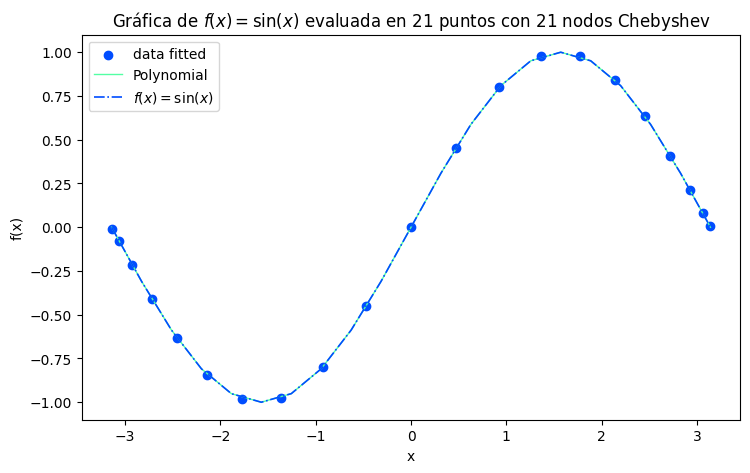

CPU times: total: 46.9 ms
Wall time: 187 ms


In [31]:
%%time
w_ch_21_f1 = y_1(x_ch_21) # f(x)
P_ch_21_f1, coeffs_ch_21_f1, err_ch_21_f1 = lagrange_interpolation(x_ch_21,
                                         w_ch_21_f1,
                                         f_evaluate=y_1,
                                         f_name=r"$f(x) = \sin(x)$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_ch_21))

In [32]:
P_ch_21_f1

Polynomial([-2.08980251e-30,  1.00000000e+00, -2.88723039e-15, -1.66666667e-01,
       -2.03452706e-14,  8.33333333e-03,  9.40085683e-14, -1.98412698e-04,
        4.65296204e-14,  2.75573192e-06, -3.93420106e-14, -2.50520771e-08,
       -5.19902047e-15,  1.60588196e-10,  5.34877589e-16, -7.64593690e-13,
        4.21483595e-18,  2.79452581e-15, -8.00657893e-19, -7.22072261e-18,
       -2.26978360e-21], domain=[-1,  1], window=[-1,  1], symbol='x')

In [33]:
coeffs_ch_21_f1

array([-2.08980251e-30,  1.00000000e+00, -2.88723039e-15, -1.66666667e-01,
       -2.03452706e-14,  8.33333333e-03,  9.40085683e-14, -1.98412698e-04,
        4.65296204e-14,  2.75573192e-06, -3.93420106e-14, -2.50520771e-08,
       -5.19902047e-15,  1.60588196e-10,  5.34877589e-16, -7.64593690e-13,
        4.21483595e-18,  2.79452581e-15, -8.00657893e-19, -7.22072261e-18,
       -2.26978360e-21])

In [34]:
print(f'Error absoluto: {err_ch_21_f1}')

Error absoluto: 0.0000


* Para 11 nodos equiespaciados

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


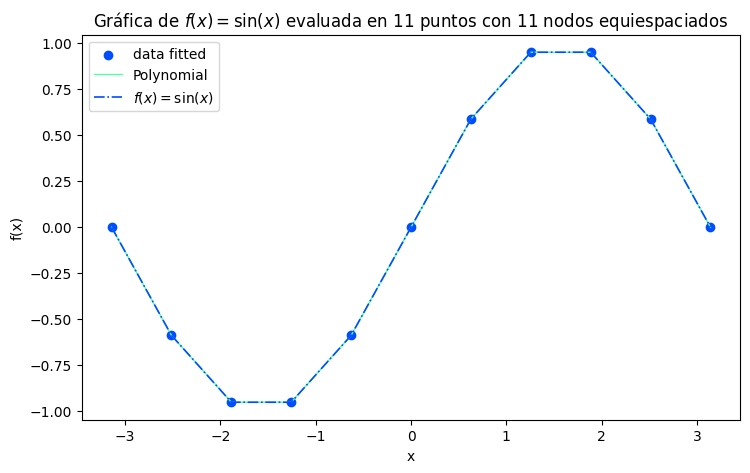

CPU times: total: 93.8 ms
Wall time: 174 ms


In [35]:
%%time
w_equi_11_f1 = y_1(x_equi_11)
P_equi_11_f1, coeffs_equi_11_f1, err_equi_11_f1 = lagrange_interpolation(x_equi_11,
                                         w_equi_11_f1,
                                         y_1,
                                         f_name=r"$f(x) = \sin(x)$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_equi_11),
                                        method='equiespaciados')

In [36]:
P_equi_11_f1

Polynomial([ 0.00000000e+00,  9.99996991e-01, -5.44653932e-16, -1.66655489e-01,
       -4.26919534e-16,  8.32300768e-03, -1.16038027e-15, -1.94869471e-04,
        1.25936238e-18,  2.25910135e-06, -6.74107116e-19], domain=[-1,  1], window=[-1,  1], symbol='x')

In [37]:
coeffs_equi_11_f1

array([ 0.00000000e+00,  9.99996991e-01, -5.44653932e-16, -1.66655489e-01,
       -4.26919534e-16,  8.32300768e-03, -1.16038027e-15, -1.94869471e-04,
        1.25936238e-18,  2.25910135e-06, -6.74107116e-19])

In [38]:
print(f'Error absoluto: {err_equi_11_f1}')

Error absoluto: 0.0000


* Para 21 nodos equiespaciados

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


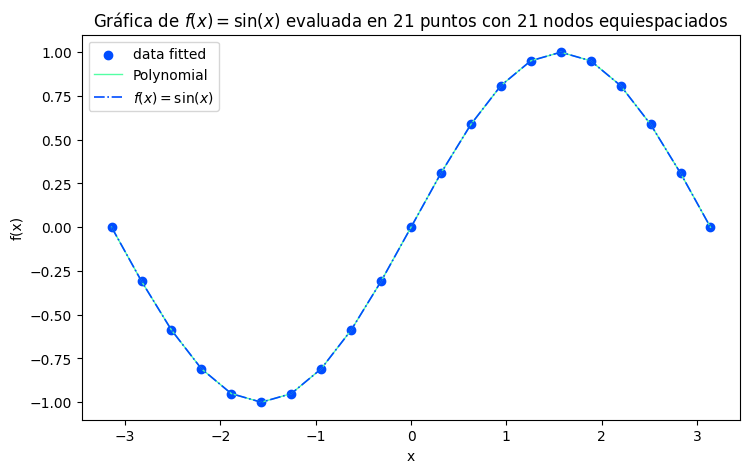

CPU times: total: 109 ms
Wall time: 185 ms


In [39]:
%%time
w_equi_21_f1 = y_1(x_equi_21)
P_equi_21_f1, coeffs_equi_21_f1, err_equi_21_f1 = lagrange_interpolation(x_equi_21,
                                         w_equi_21_f1,
                                         y_1,
                                         f_name=r"$f(x) = \sin(x)$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_equi_21),
                                         method='equiespaciados')

### función $f(x) = \frac{1}{1 + 25x^2}$

* Para 11 nodos de `Chebyshev`:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


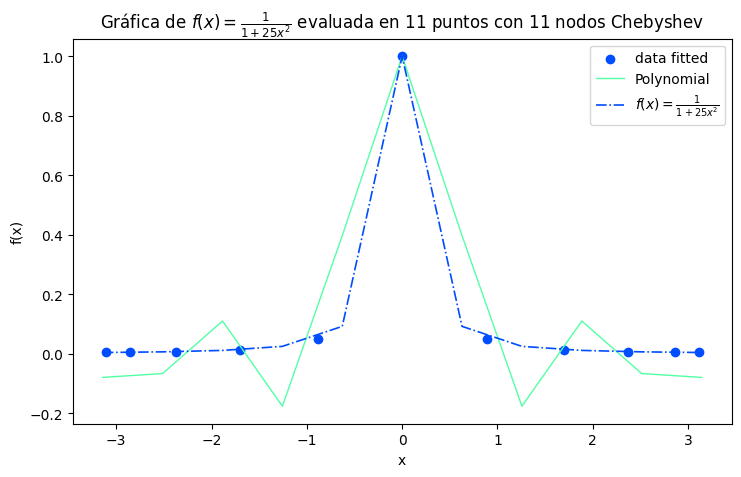

CPU times: total: 93.8 ms
Wall time: 179 ms


In [40]:
%%time
w_ch_11_f2 = y_2(x_ch_11)
P_ch_11_f2, coeffs_ch_11_f2, err_ch_11_f2 = lagrange_interpolation(x_ch_11,
                                         w_ch_11_f2,
                                         y_2,
                                         f_name=r"$f(x) = \frac{1}{1 + 25x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_ch_11))

In [41]:
P_ch_11_f2

Polynomial([ 1.00000000e+00, -3.10249873e-15, -1.91413500e+00,  1.95871964e-15,
        1.07163154e+00, -9.72691979e-16, -2.46891437e-01,  5.04696111e-17,
        2.49509280e-02, -7.52588774e-18, -9.17940830e-04], domain=[-1,  1], window=[-1,  1], symbol='x')

In [42]:
coeffs_ch_11_f2

array([ 1.00000000e+00, -3.10249873e-15, -1.91413500e+00,  1.95871964e-15,
        1.07163154e+00, -9.72691979e-16, -2.46891437e-01,  5.04696111e-17,
        2.49509280e-02, -7.52588774e-18, -9.17940830e-04])

In [43]:
print(f'Error absoluto: {err_ch_11_f2}')

Error absoluto: 1.5227


* Para 21 nodos de `Chebyshev`:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


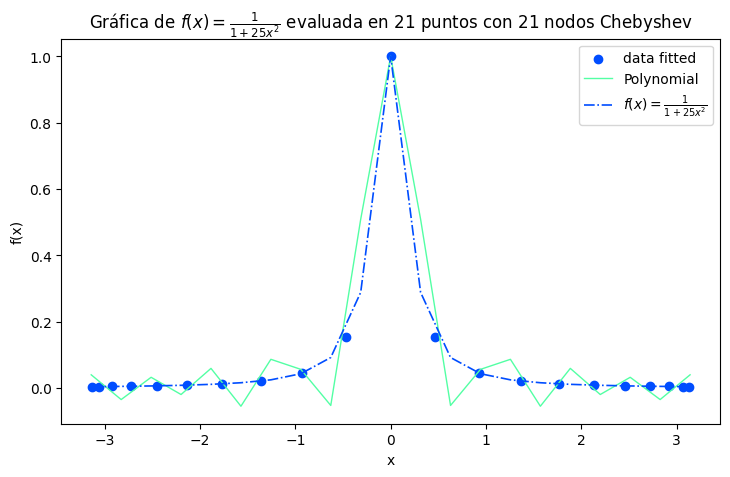

CPU times: total: 78.1 ms
Wall time: 188 ms


In [44]:
%%time
w_ch_21_f2 = y_2(x_ch_21)
P_ch_21_f2, coeffs_ch_21_f2, err_ch_21_f2 = lagrange_interpolation(x_ch_21,
                                         w_ch_21_f2,
                                         y_2,
                                         f_name=r"$f(x) = \frac{1}{1 + 25x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_ch_21))

In [45]:
P_ch_21_f2

Polynomial([ 1.00000000e+00,  4.19073955e-15, -6.12202664e+00,  2.22602969e-14,
        1.27831682e+01,  1.61635462e-13, -1.25985178e+01,  5.10403352e-14,
        6.88873107e+00,  2.73125706e-14, -2.27296993e+00, -2.85825508e-15,
        4.70962152e-01, -2.34426194e-15, -6.16811912e-02, -4.79147904e-16,
        4.95589408e-03, -6.31246010e-18, -2.22942418e-04, -9.70109151e-20,
        4.29930766e-06], domain=[-1,  1], window=[-1,  1], symbol='x')

In [46]:
coeffs_ch_21_f2

array([ 1.00000000e+00,  4.19073955e-15, -6.12202664e+00,  2.22602969e-14,
        1.27831682e+01,  1.61635462e-13, -1.25985178e+01,  5.10403352e-14,
        6.88873107e+00,  2.73125706e-14, -2.27296993e+00, -2.85825508e-15,
        4.70962152e-01, -2.34426194e-15, -6.16811912e-02, -4.79147904e-16,
        4.95589408e-03, -6.31246010e-18, -2.22942418e-04, -9.70109151e-20,
        4.29930766e-06])

In [47]:
print(f'Error absoluto: {err_ch_21_f2}')

Error absoluto: 1.3764


* Para 11 nodos equiespaciados

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


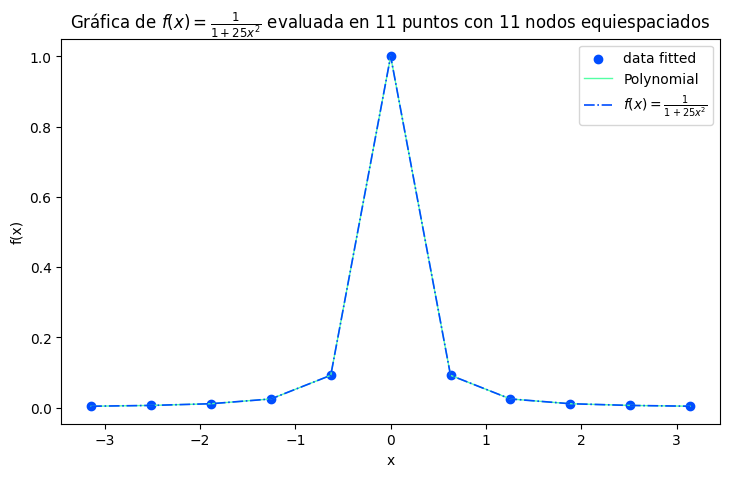

CPU times: total: 109 ms
Wall time: 295 ms


In [48]:
%%time
w_equi_11_f2 = y_2(x_equi_11)
P_equi_11_f2, coeffs_equi_11_f2, err_equi_11_f2 = lagrange_interpolation(x_equi_11,
                                         w_equi_11_f2,
                                         y_2,
                                         f_name=r"$f(x) = \frac{1}{1 + 25x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_equi_11),
                                         method='equiespaciados')

In [49]:
P_equi_11_f2

Polynomial([ 1.00000000e+00, -1.85894086e-16, -3.33282994e+00,  8.46097823e-16,
        2.99252684e+00,  2.65938530e-15, -1.00614319e+00, -5.12905555e-16,
        1.36528323e-01, -2.11008613e-17, -6.27626117e-03], domain=[-1,  1], window=[-1,  1], symbol='x')

In [50]:
coeffs_equi_11_f2

array([ 1.00000000e+00, -1.85894086e-16, -3.33282994e+00,  8.46097823e-16,
        2.99252684e+00,  2.65938530e-15, -1.00614319e+00, -5.12905555e-16,
        1.36528323e-01, -2.11008613e-17, -6.27626117e-03])

In [51]:
print(f'Error absoluto: {err_equi_11_f2}')

Error absoluto: 0.0000


* Para 21 nodos equiespaciados

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


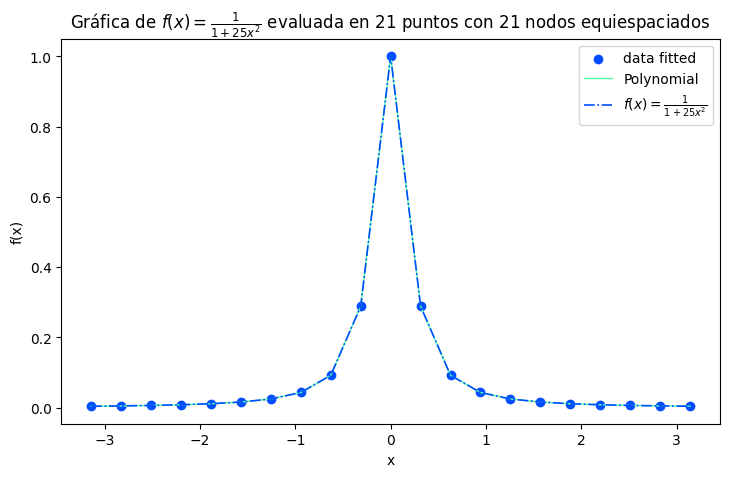

CPU times: total: 78.1 ms
Wall time: 183 ms


In [52]:
%%time
w_equi_21_f2 = y_2(x_equi_21)
P_equi_21_f2, coeffs_equi_21_f2, err_equi_21_f2 = lagrange_interpolation(x_equi_21,
                                         w_equi_21_f2,
                                         y_2,
                                         f_name=r"$f(x) = \frac{1}{1 + 25x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=21,
                                         method='equiespaciados')

In [53]:
P_equi_21_f2

Polynomial([ 1.00000000e+00,  1.84055072e-16, -1.06722017e+01,  7.30231329e-14,
        4.18237908e+01,  3.40752468e-13, -7.49965649e+01, -3.97500606e-14,
        7.12066164e+01, -3.97794462e-13, -3.89074144e+01, -2.73190188e-13,
        1.27626834e+01, -1.10335080e-13, -2.53769817e+00, -7.90693643e-15,
        2.97791047e-01,  2.70249475e-16, -1.88770159e-02,  1.75895620e-18,
        4.96267610e-04], domain=[-1,  1], window=[-1,  1], symbol='x')

In [54]:
coeffs_equi_21_f2

array([ 1.00000000e+00,  1.84055072e-16, -1.06722017e+01,  7.30231329e-14,
        4.18237908e+01,  3.40752468e-13, -7.49965649e+01, -3.97500606e-14,
        7.12066164e+01, -3.97794462e-13, -3.89074144e+01, -2.73190188e-13,
        1.27626834e+01, -1.10335080e-13, -2.53769817e+00, -7.90693643e-15,
        2.97791047e-01,  2.70249475e-16, -1.88770159e-02,  1.75895620e-18,
        4.96267610e-04])

In [55]:
print(f'Error absoluto: {err_equi_21_f2}')

Error absoluto: 0.0000


### función  $f(x) = e^{-20x^2}$

* Para 11 nodos de `Chebyshev`:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


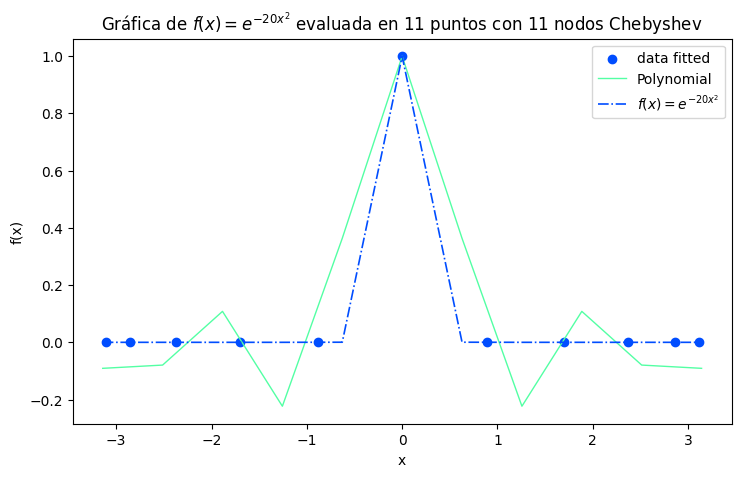

CPU times: total: 78.1 ms
Wall time: 170 ms


In [56]:
%%time
w_ch_11_f3 = y_3(x_ch_11)
P_ch_11_f3, coeffs_ch_11_f3, err_ch_11_f3 = lagrange_interpolation(x_ch_11,
                                         w_ch_11_f3,
                                         y_3,
                                         f_name=r"$f(x) = e^{-20x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_ch_11))

In [57]:
P_ch_11_f3

Polynomial([ 1.00000000e+00, -3.49718943e-15, -2.02642329e+00,  2.33145832e-15,
        1.14978972e+00, -1.05470927e-15, -2.66281263e-01,  6.93886413e-17,
        2.69799324e-02, -7.80624479e-18, -9.94050421e-04], domain=[-1,  1], window=[-1,  1], symbol='x')

In [58]:
coeffs_ch_11_f3

array([ 1.00000000e+00, -3.49718943e-15, -2.02642329e+00,  2.33145832e-15,
        1.14978972e+00, -1.05470927e-15, -2.66281263e-01,  6.93886413e-17,
        2.69799324e-02, -7.80624479e-18, -9.94050421e-04])

In [59]:
print(f'Error absoluto: {err_ch_11_f3}')

Error absoluto: 1.7302


* Para 21 nodos de `Chebyshev`:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


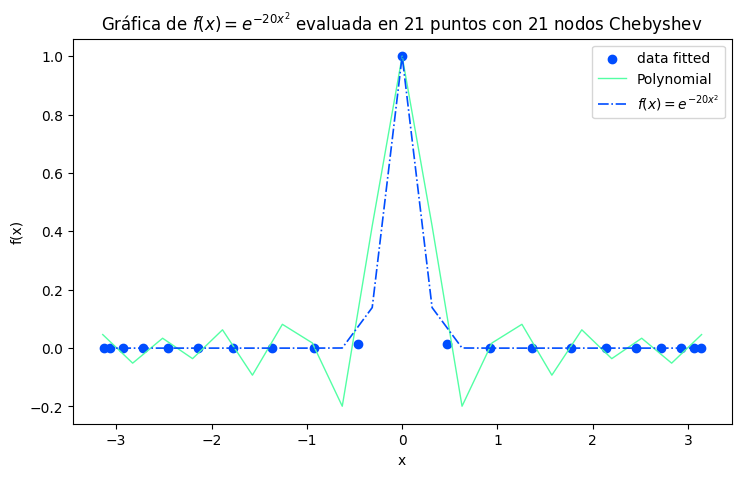

CPU times: total: 0 ns
Wall time: 181 ms


In [60]:
%%time
w_ch_21_f3 = y_3(x_ch_21)
P_ch_21_f3, coeffs_ch_21_f3, err_ch_21_f3 = lagrange_interpolation(x_ch_21,
                                         w_ch_21_f3,
                                         y_3,
                                         f_name=r"$f(x) = e^{-20x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_ch_21))

In [61]:
P_ch_21_f3

Polynomial([ 1.00000000e+00,  5.02810538e-15, -7.31777422e+00,  1.61091951e-14,
        1.59387092e+01,  1.73824329e-13, -1.59622063e+01,  6.62690394e-14,
        8.79579671e+00,  6.01976705e-14, -2.91480167e+00,  5.66301731e-15,
        6.05562644e-01, -1.37672207e-15, -7.94493648e-02, -4.94152937e-16,
        6.39133735e-03, -5.54803353e-18, -2.87771659e-04, -1.35019282e-19,
        5.55318994e-06], domain=[-1,  1], window=[-1,  1], symbol='x')

In [62]:
coeffs_ch_21_f3

array([ 1.00000000e+00,  5.02810538e-15, -7.31777422e+00,  1.61091951e-14,
        1.59387092e+01,  1.73824329e-13, -1.59622063e+01,  6.62690394e-14,
        8.79579671e+00,  6.01976705e-14, -2.91480167e+00,  5.66301731e-15,
        6.05562644e-01, -1.37672207e-15, -7.94493648e-02, -4.94152937e-16,
        6.39133735e-03, -5.54803353e-18, -2.87771659e-04, -1.35019282e-19,
        5.55318994e-06])

In [63]:
print(f'Error absoluto: {err_ch_21_f3}')

Error absoluto: 1.8030


* Para 11 nodos equiespaciados

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


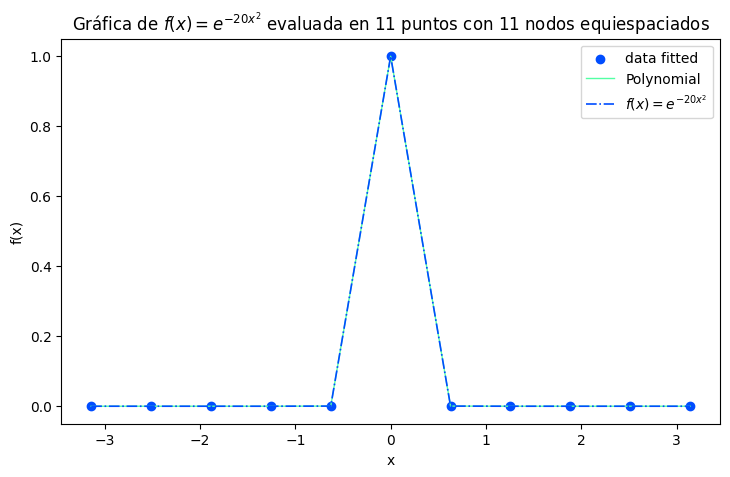

CPU times: total: 15.6 ms
Wall time: 175 ms


In [64]:
%%time
w_equi_11_f3 = y_3(x_equi_11)
P_equi_11_f3, coeffs_equi_11_f3, err_equi_11_f3 = lagrange_interpolation(x_equi_11,
                                         w_equi_11_f3,
                                         y_3,
                                         f_name=r"$f(x) = e^{-20x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_equi_11),
                                         method='equiespaciados')

In [65]:
P_equi_11_f3

Polynomial([ 1.00000000e+00, -1.66541900e-16, -3.70579831e+00,  8.88209798e-16,
        3.40455306e+00,  2.66455698e-15, -1.15392762e+00, -4.99560331e-16,
        1.57143549e-01, -2.08216639e-17, -7.23717754e-03], domain=[-1,  1], window=[-1,  1], symbol='x')

In [66]:
coeffs_equi_11_f3

array([ 1.00000000e+00, -1.66541900e-16, -3.70579831e+00,  8.88209798e-16,
        3.40455306e+00,  2.66455698e-15, -1.15392762e+00, -4.99560331e-16,
        1.57143549e-01, -2.08216639e-17, -7.23717754e-03])

In [67]:
print(f'Error absoluto: {err_equi_11_f3}')

Error absoluto: 0.0000


* Para 21 nodos equiespaciados

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


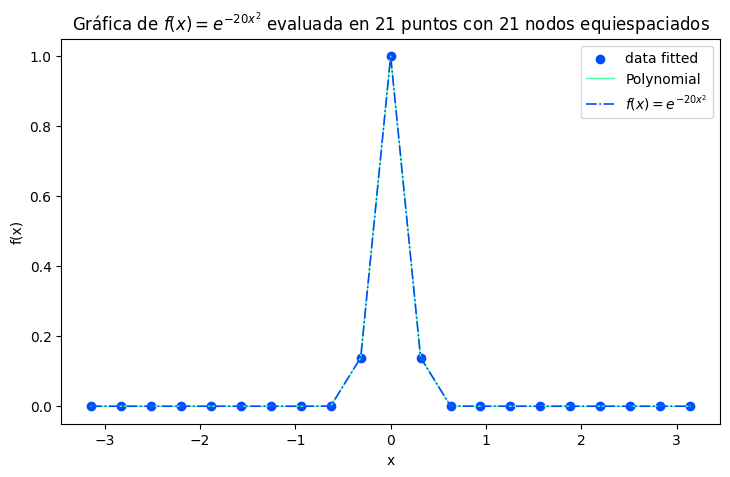

CPU times: total: 62.5 ms
Wall time: 180 ms


In [68]:
%%time
w_equi_21_f3 = y_3(x_equi_21)
P_equi_21_f3, coeffs_equi_21_f3, err_equi_21_f3 = lagrange_interpolation(x_equi_21,
                                         w_equi_21_f3,
                                         y_3,
                                         f_name=r"$f(x) = e^{-20x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_equi_21),
                                         method='equiespaciados')

In [69]:
P_equi_21_f3

Polynomial([ 1.00000000e+00,  4.09048944e-16, -1.31446907e+01,  7.44333817e-14,
        5.35046810e+01,  2.81633330e-13, -9.70075735e+01, -1.77481998e-13,
        9.25023801e+01, -5.90735316e-13, -5.06459174e+01, -3.52931522e-13,
        1.66312654e+01, -1.14603589e-13, -3.30902527e+00, -1.00223302e-14,
        3.88459510e-01,  1.70073687e-16, -2.46310307e-02,  1.79235863e-18,
        6.47656042e-04], domain=[-1,  1], window=[-1,  1], symbol='x')

In [70]:
coeffs_equi_21_f3

array([ 1.00000000e+00,  4.09048944e-16, -1.31446907e+01,  7.44333817e-14,
        5.35046810e+01,  2.81633330e-13, -9.70075735e+01, -1.77481998e-13,
        9.25023801e+01, -5.90735316e-13, -5.06459174e+01, -3.52931522e-13,
        1.66312654e+01, -1.14603589e-13, -3.30902527e+00, -1.00223302e-14,
        3.88459510e-01,  1.70073687e-16, -2.46310307e-02,  1.79235863e-18,
        6.47656042e-04])

In [71]:
print(f'Error absoluto: {err_equi_21_f3}')

Error absoluto: 0.0000


### Análisis de Sensibilidad

Dado que teóricamente las gráficas polinomiales se ajustarían mejor con a un mayor número de puntos evaluados, sería interesante experimentar como se vería afectado el error absoluto y el tiempo de ejecución en otros escenarios. En este sentido, aplicaremos la interpolación de lagrange para `n = [30, 50, 100, 150]` y apuntaremos los resultados. En esta ocasión el tiempo de ejecución será evaluado mediante la función `time` de la biblioteca `time` de Python

In [72]:
def sensibility_analysis(n_evaluation:list,
                         interval:list,
                         x_data:np.array,
                         w_data:np.array,
                         f_evaluate:callable,
                         f_name:str,
                         method:str):
    '''
    Realiza un análisis de sensibilidad variando el número de puntos de evaluación.

    Parámetros:
    - n_evaluation (list): Lista de valores para el número de puntos de evaluación.
    - interval (list): Lista que representa el intervalo de evaluación [a, b].
    - x_data (np.array): Array de datos x para la interpolación.
    - w_data (np.array): Array de datos w para la interpolación.
    - f_evaluate (callable): Función a evaluar para la interpolación.
    - f_name (str): Nombre de la función para etiquetar los resultados.
    - method (str): Nombre del método de nodos analizado: Chebyshev o equiespaciados.

    Devuelve:
    - pd.DataFrame: DataFrame con los resultados del análisis de sensibilidad.

    Ejemplo:
        n_values = [30, 50, 100]
        interval_values = [-2*np.pi, 2*np.pi]
        x_values = np.array([1, 2, 3, 4, 5])
        w_values = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
        def f_evaluate(x): return np.sin(x)
        method = 'Chebyshev'
        results_df = sensibility_analysis(n_values,
                                          interval_values,
                                          x_values,
                                          w_values,
                                          f_evaluate,
                                          "sin(x)",
                                          "Chebyshev")
    '''
    results_dict = {}
    for i in n_evaluation:
        start_time = time.time()
        P, C, E = lagrange_interpolation(x_data=x_data,
                            w_data=w_data,
                            f_evaluate=f_evaluate,
                            f_name=f_name,
                            interval=interval,
                            n=i,
                            method=method)
        end_time = time.time()
        execution_time = end_time - start_time
        results_dict[i] = {'Método':method, 'Función': f_name, 'Puntos evaluados': i, 'Nodos':len(x_data),'Error absoluto': E, 'Tiempo (s)': execution_time}
    # df = pd.DataFrame(results_dict).T.set_index('Puntos evaluados')
    df = pd.DataFrame(results_dict).T
    df['Función'] = ['seno' if '$f(x) = \sin(x)$' in funcion else 'exponencial' if '$f(x) = e^{-20x^2}$' in funcion else 'fracción' for funcion in df['Función']]
    return df

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


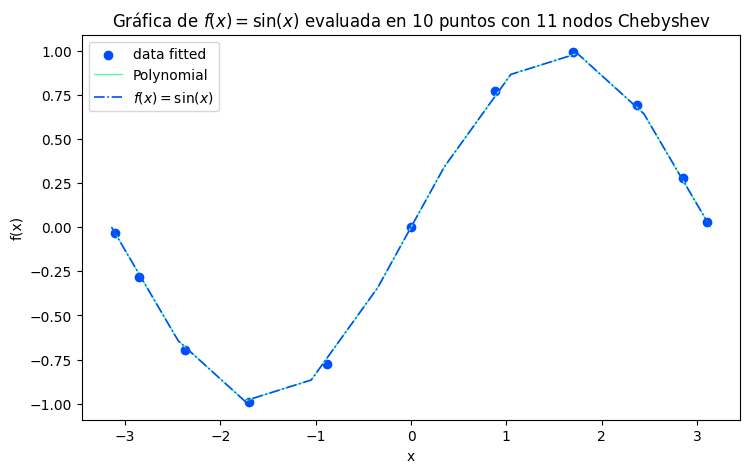

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


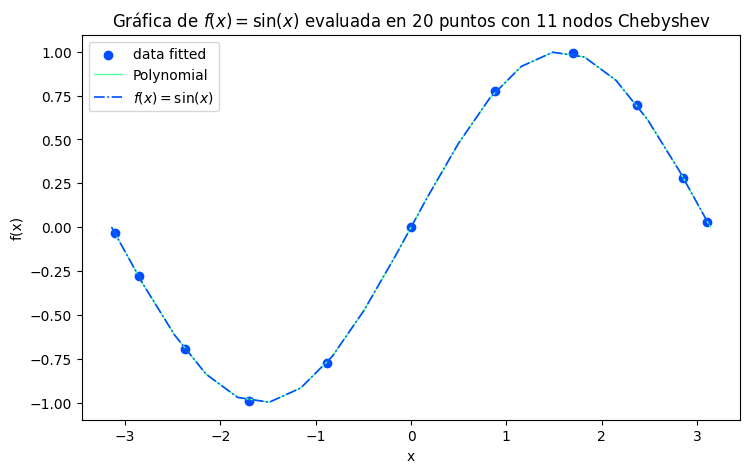

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


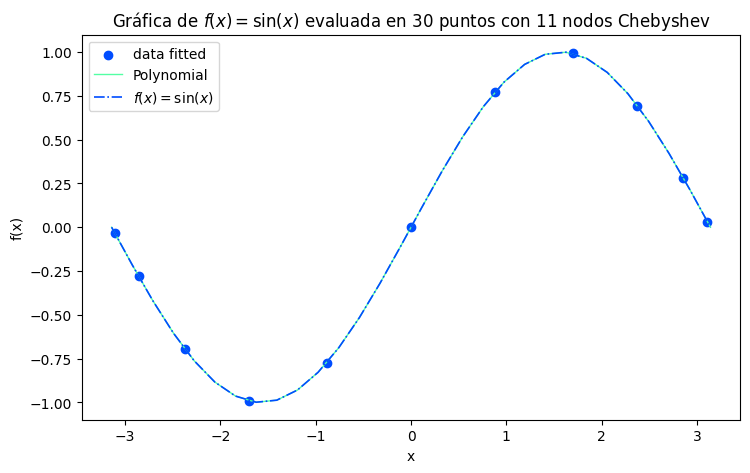

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


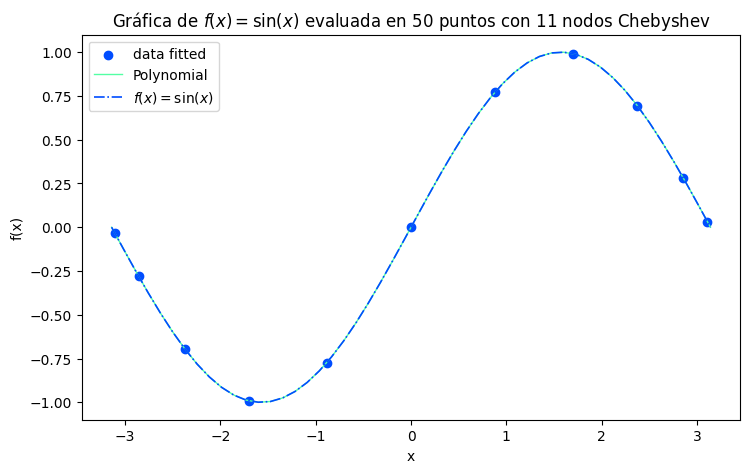

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


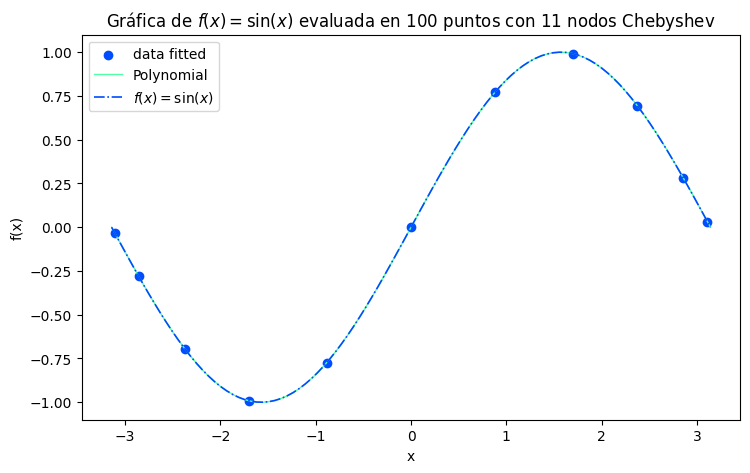

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


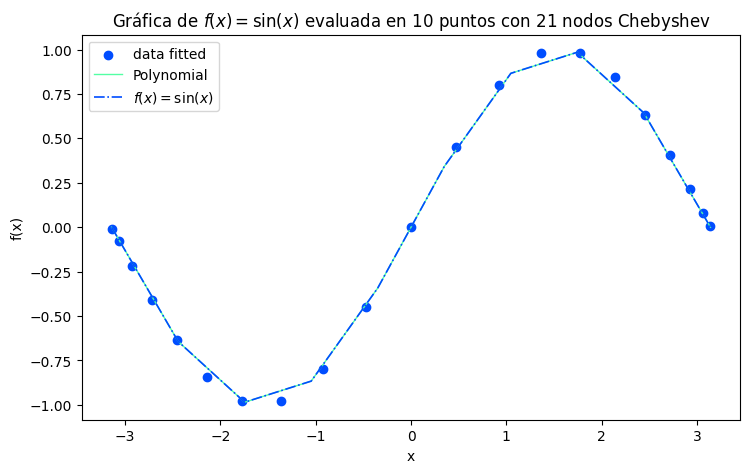

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


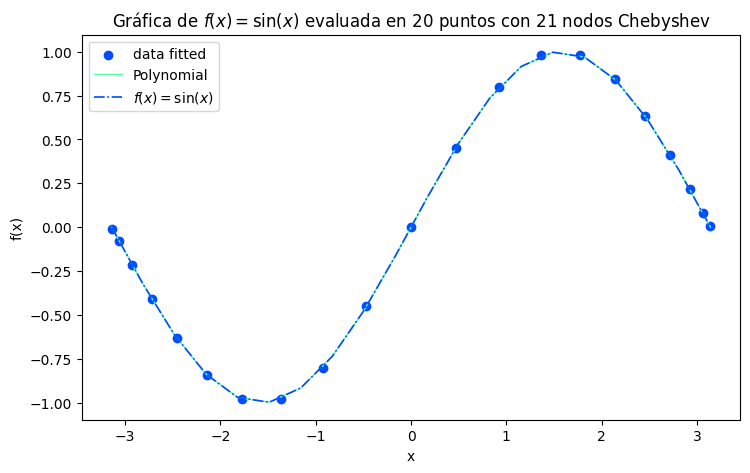

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


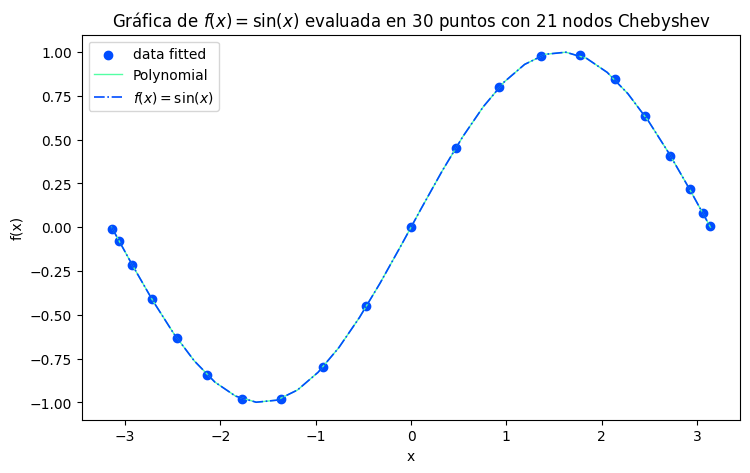

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


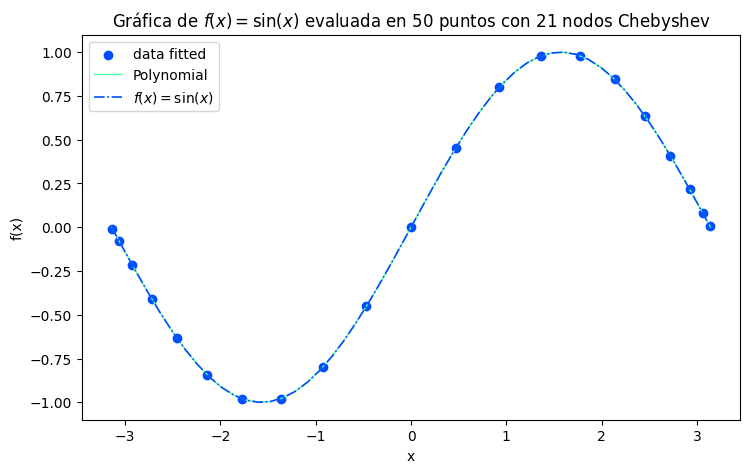

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


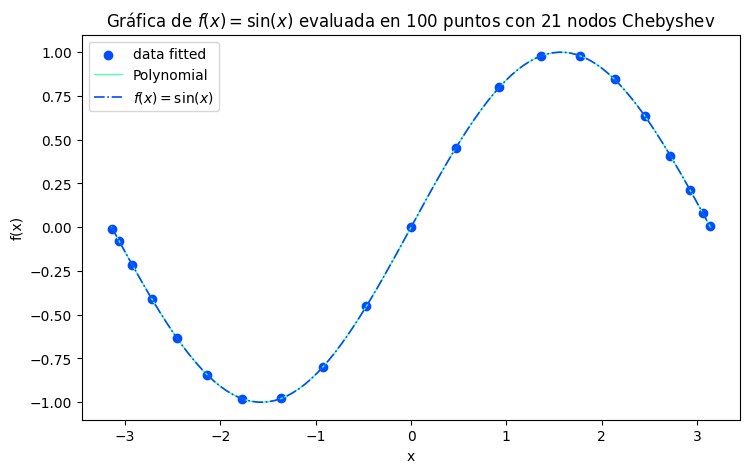

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


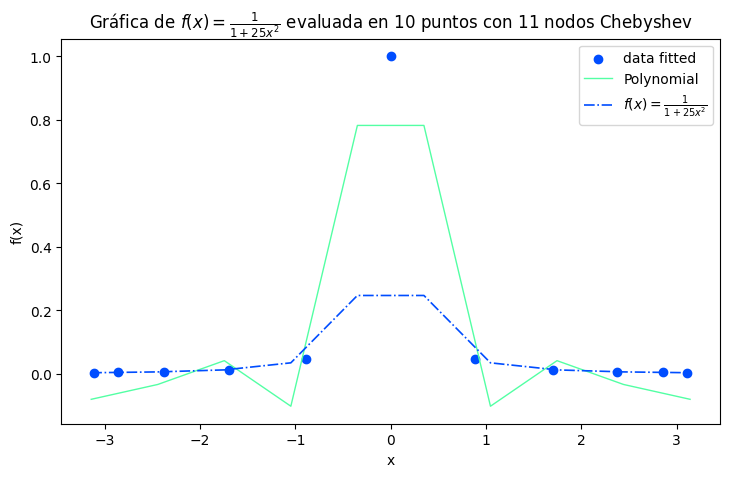

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


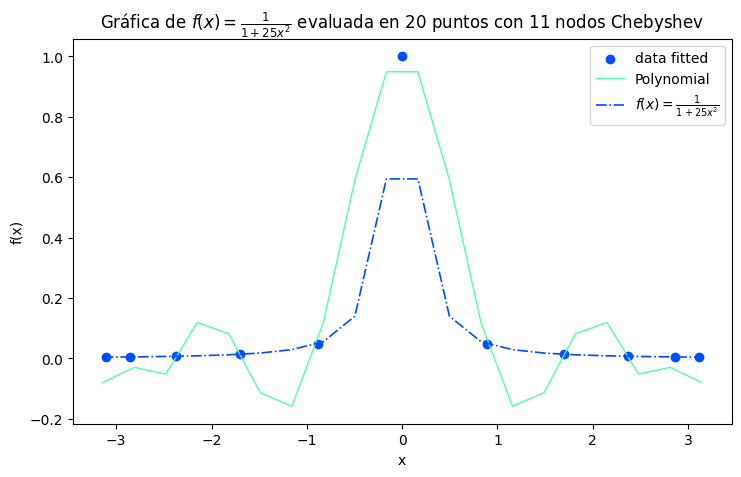

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


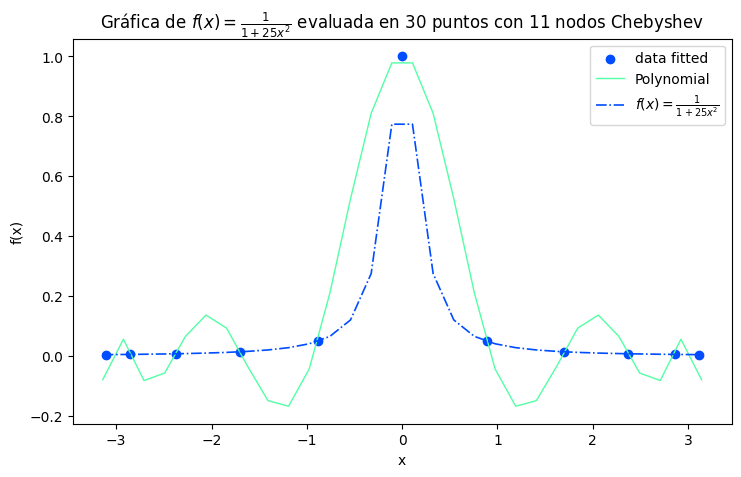

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


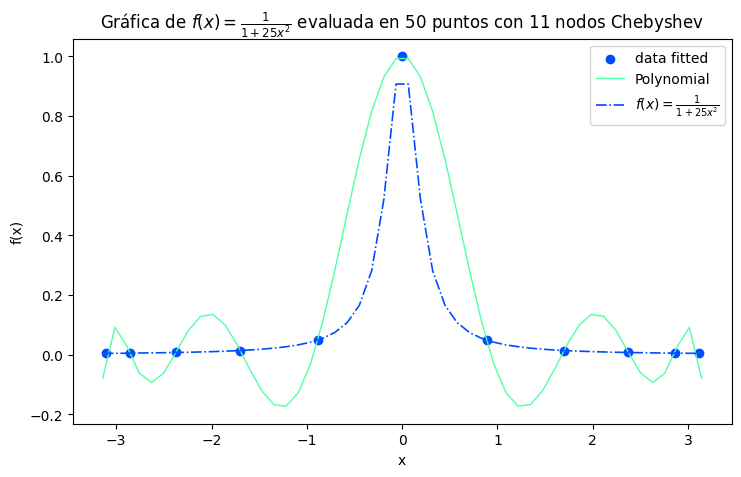

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


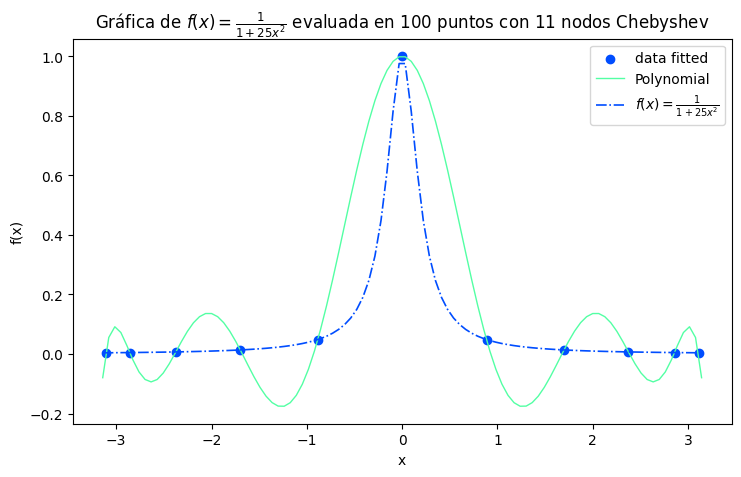

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


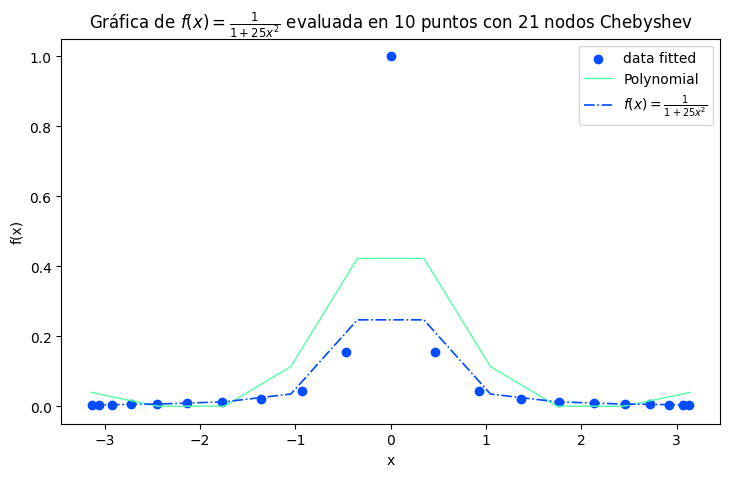

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


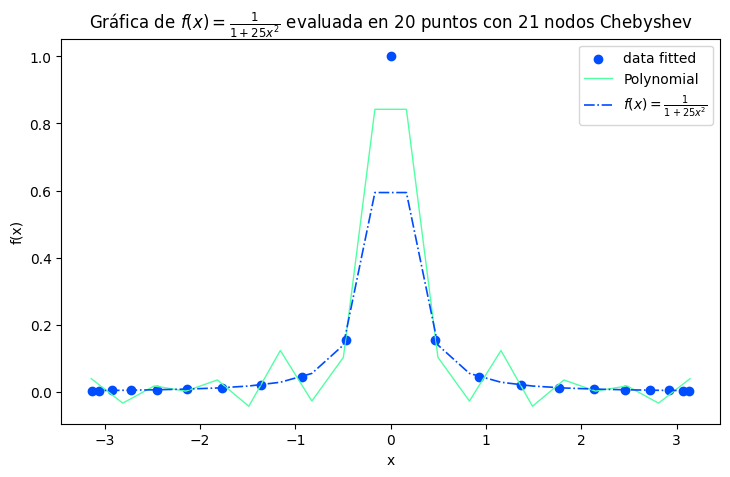

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


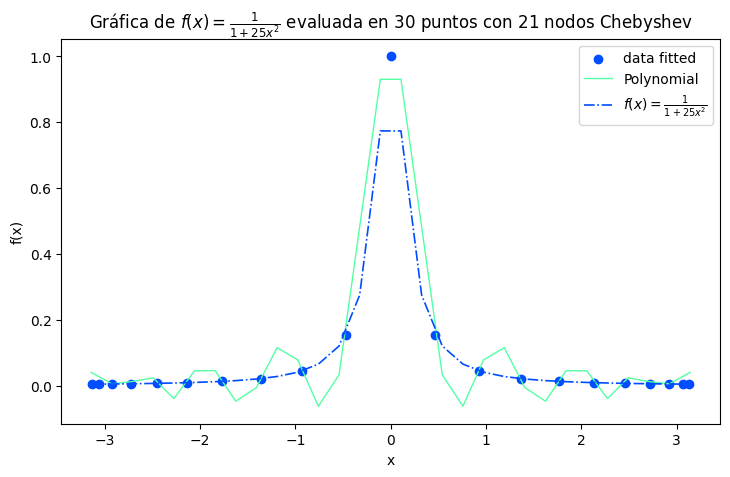

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


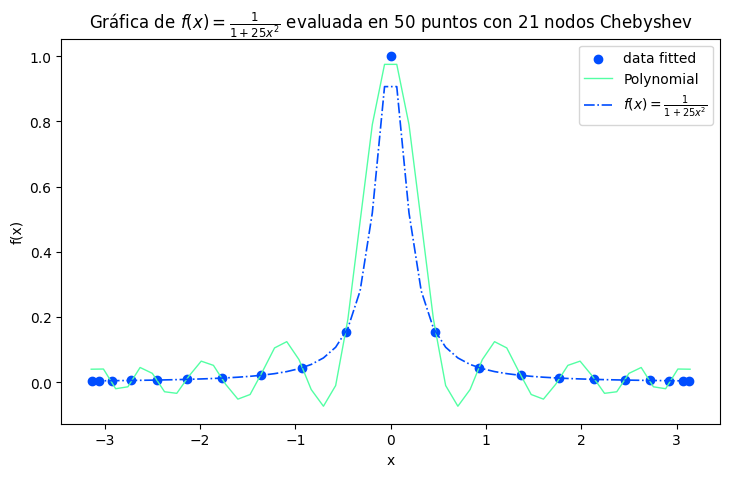

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


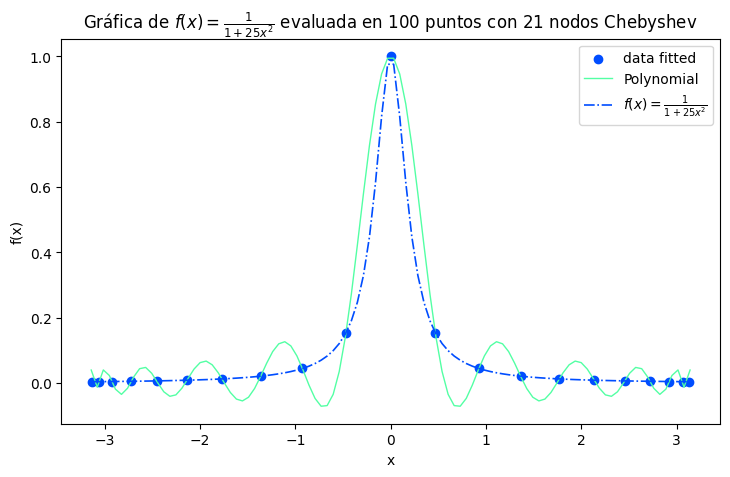

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


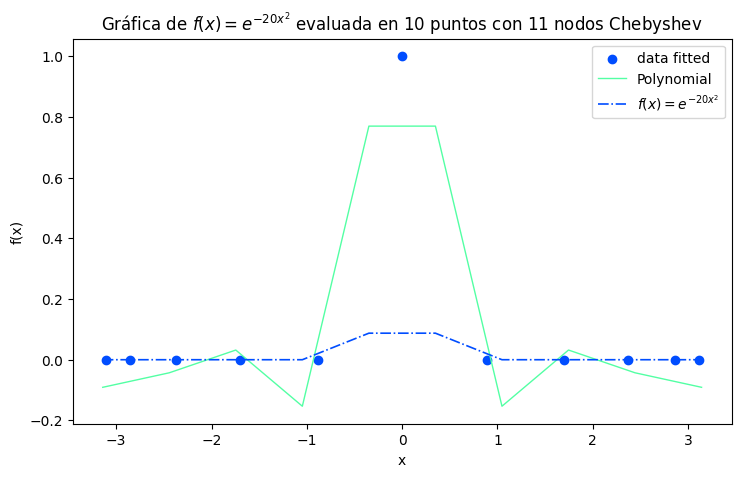

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


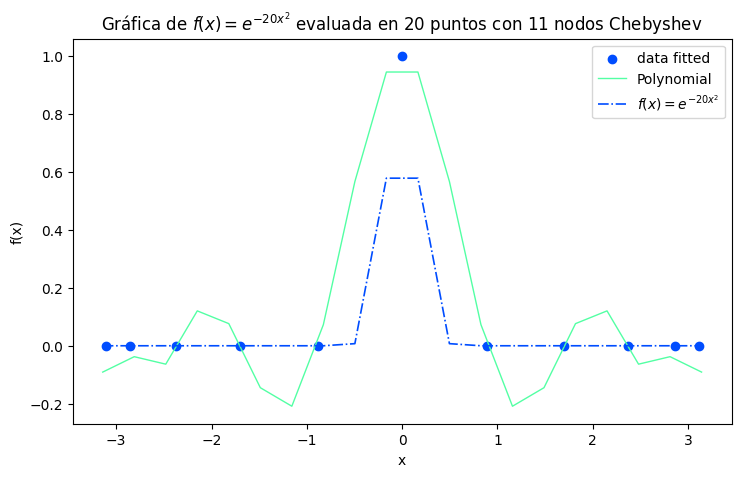

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


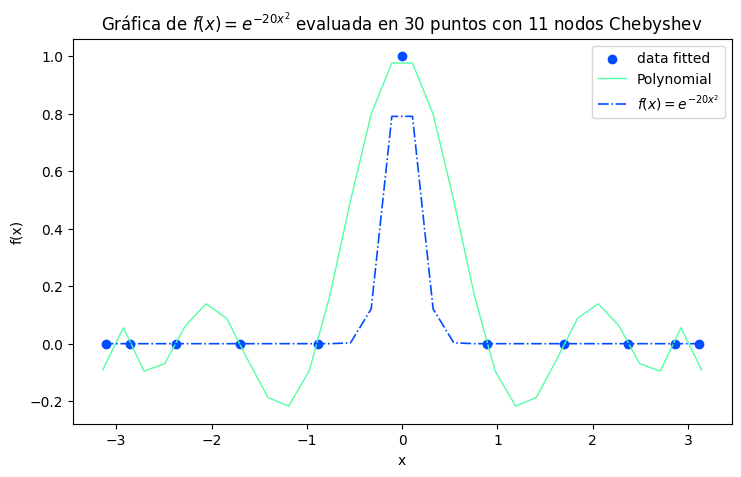

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


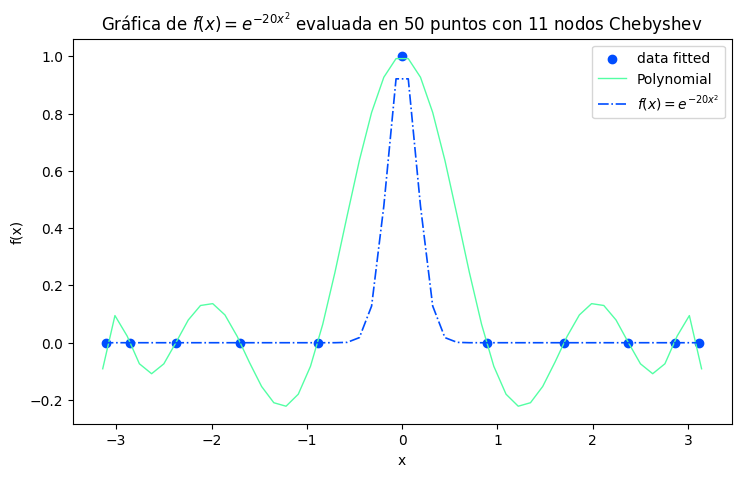

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


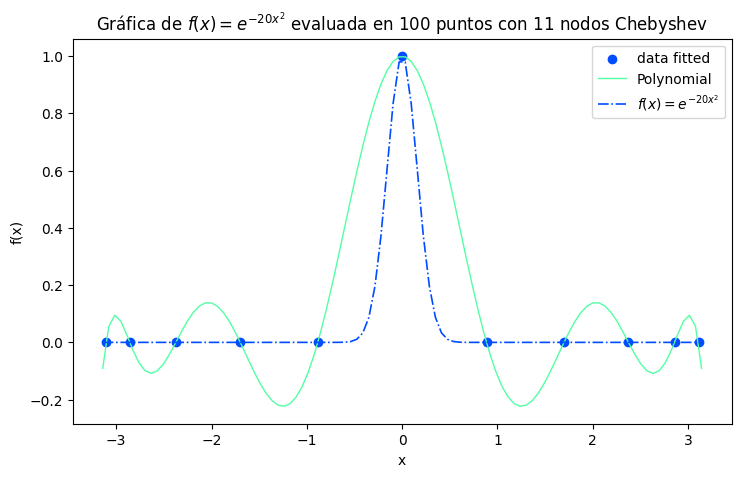

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


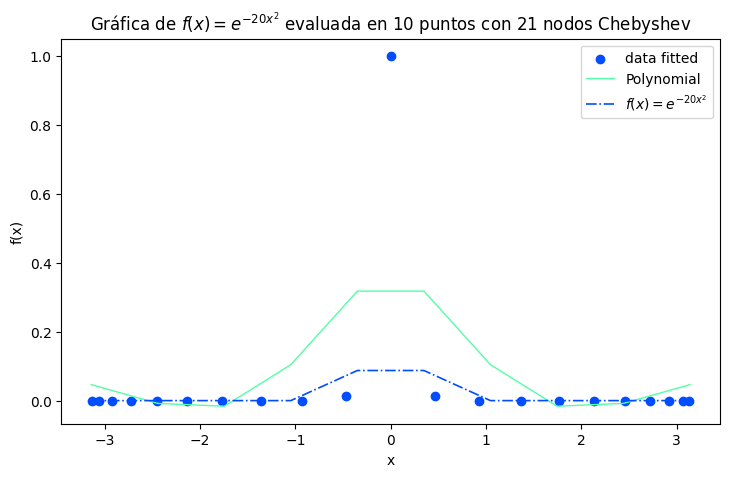

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


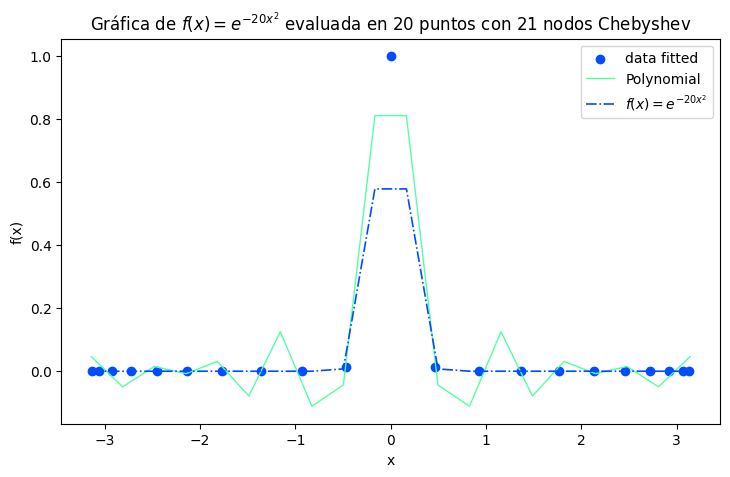

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


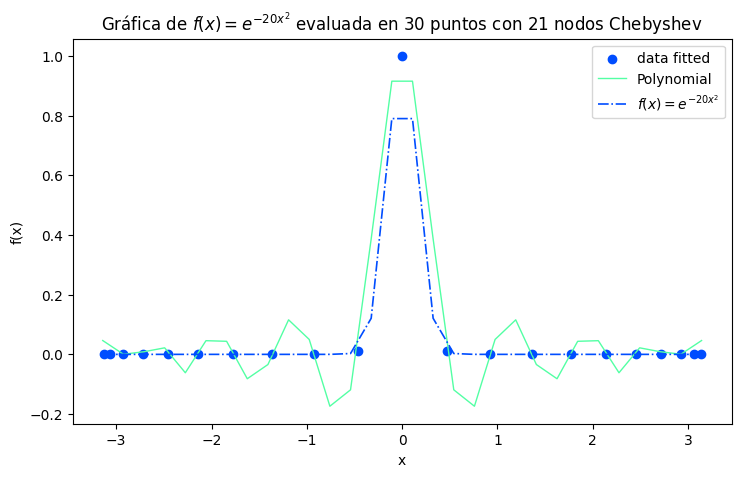

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


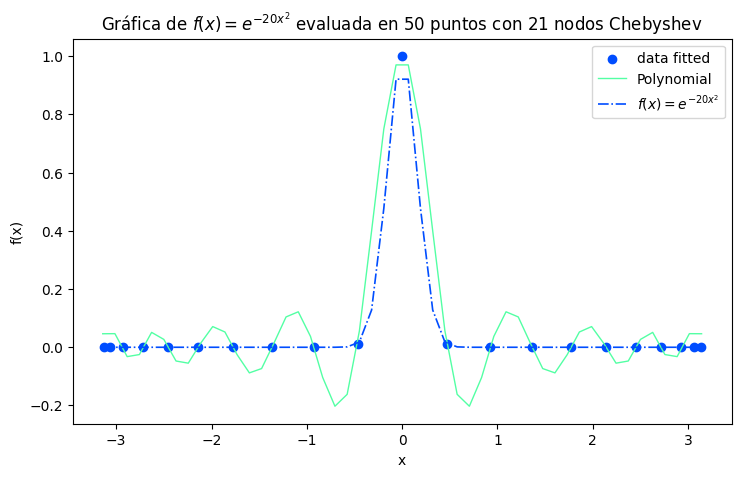

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


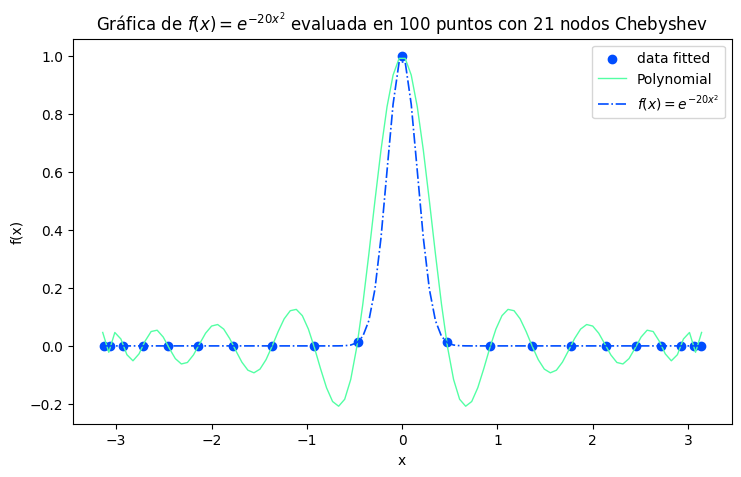

In [73]:
# establecemos alias para las funciones de trabajo:
# seno, fracción, exponencial
n = [10, 20, 30, 50, 100]
interval = [-np.pi, np.pi]
# interval = [-5, 5]


df_ch_11_f1 = sensibility_analysis(n_evaluation=n,
                    interval=interval,
                    x_data=x_ch_11,
                    w_data=w_ch_11_f1,
                    f_evaluate=y_1,
                    f_name=r"$f(x) = \sin(x)$",
                    method="Chebyshev")

df_ch_21_f1 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_ch_21,
                     w_data=w_ch_21_f1,
                     f_evaluate=y_1,
                    f_name=r"$f(x) = \sin(x)$",
                    method="Chebyshev")

df_ch_11_f2 = sensibility_analysis(n_evaluation=n,
                    interval=interval,
                    x_data=x_ch_11,
                    w_data=w_ch_11_f2,
                    f_evaluate=y_2,
                    f_name=r"$f(x) = \frac{1}{1 + 25x^2}$",
                    method="Chebyshev")

df_ch_21_f2 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_ch_21,
                     w_data=w_ch_21_f2,
                     f_evaluate=y_2, f_name=r"$f(x) = \frac{1}{1 + 25x^2}$", method="Chebyshev")

df_ch_11_f3 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_ch_11,
                     w_data=w_ch_11_f3,
                     f_evaluate=y_3, f_name=r"$f(x) = e^{-20x^2}$", method="Chebyshev")

df_ch_21_f3 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_ch_21,
                     w_data=w_ch_21_f3,
                     f_evaluate=y_3, f_name=r"$f(x) = e^{-20x^2}$", method="Chebyshev")



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


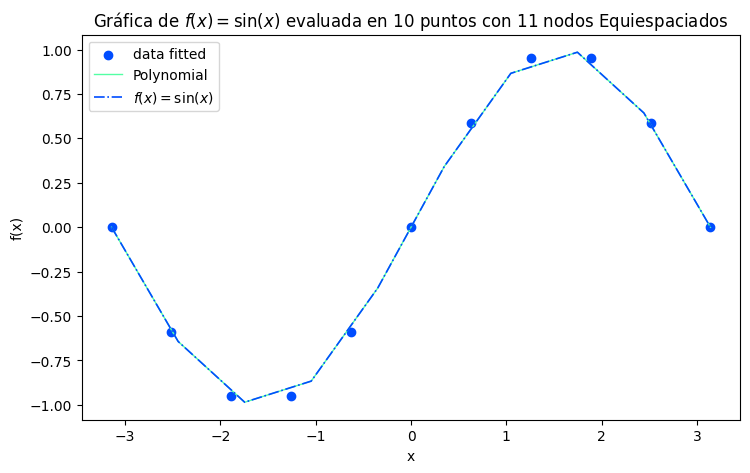

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


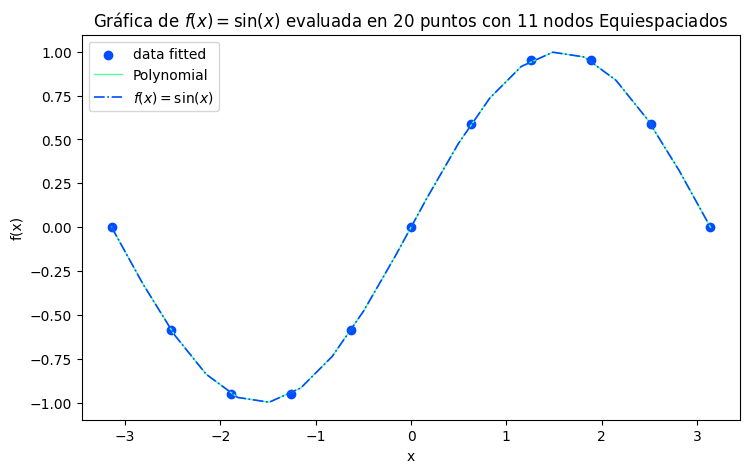

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


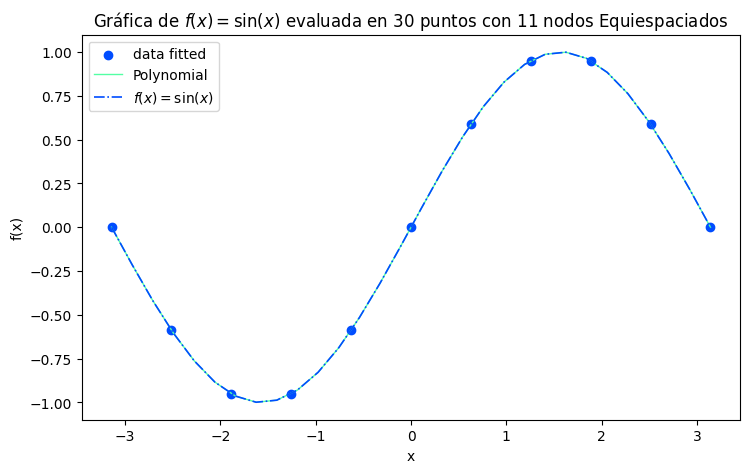

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


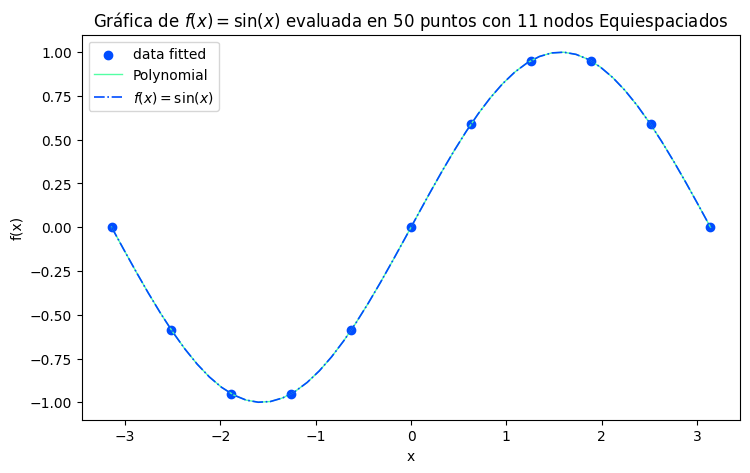

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


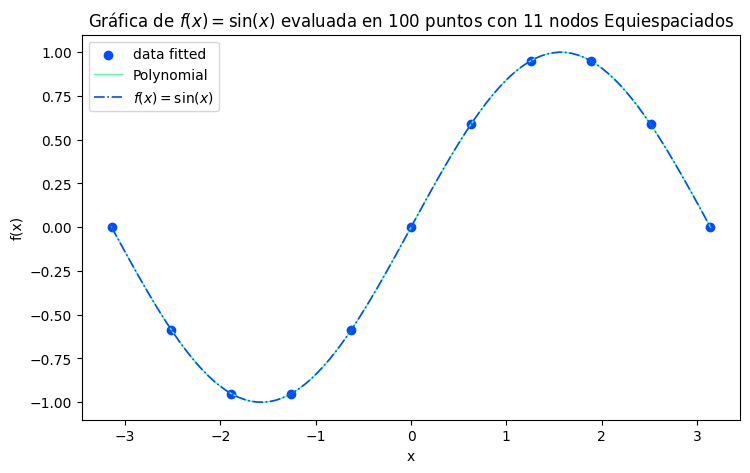

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


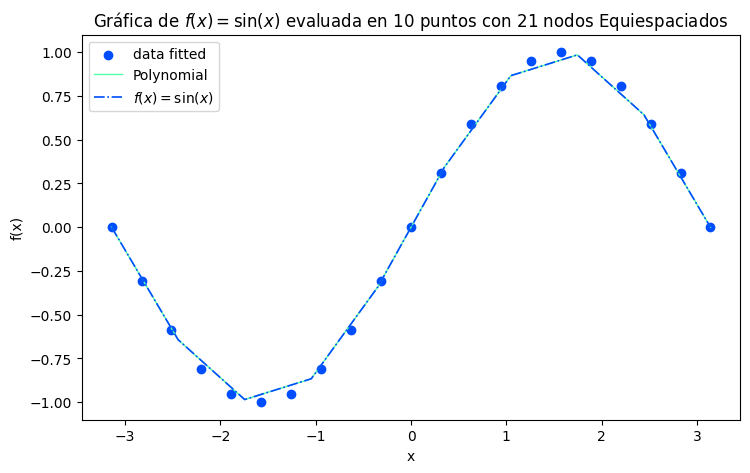

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


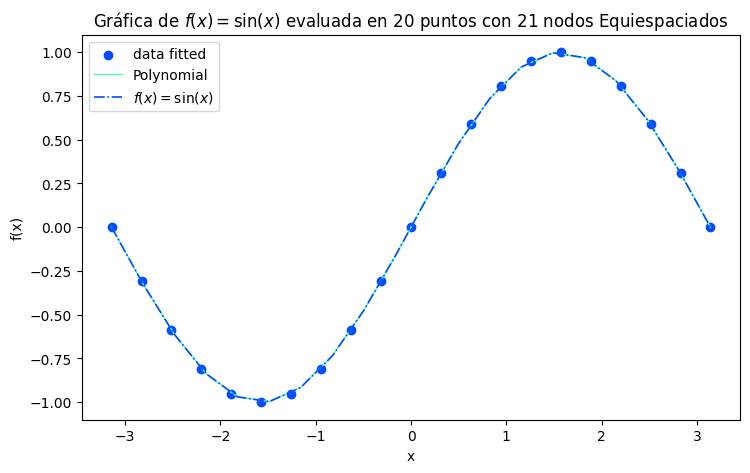

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


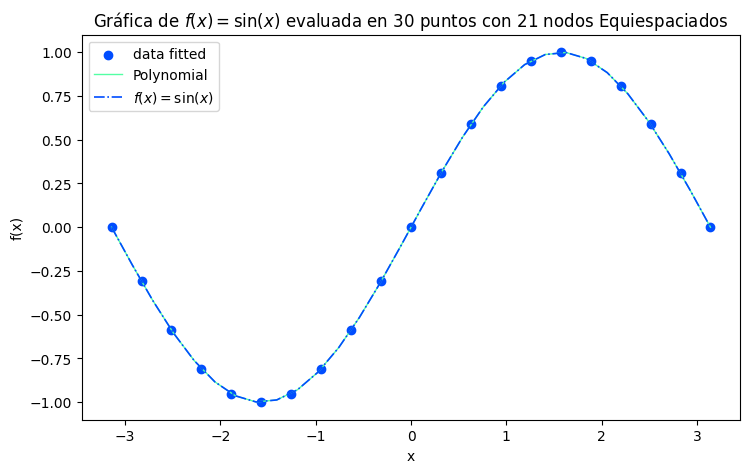

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


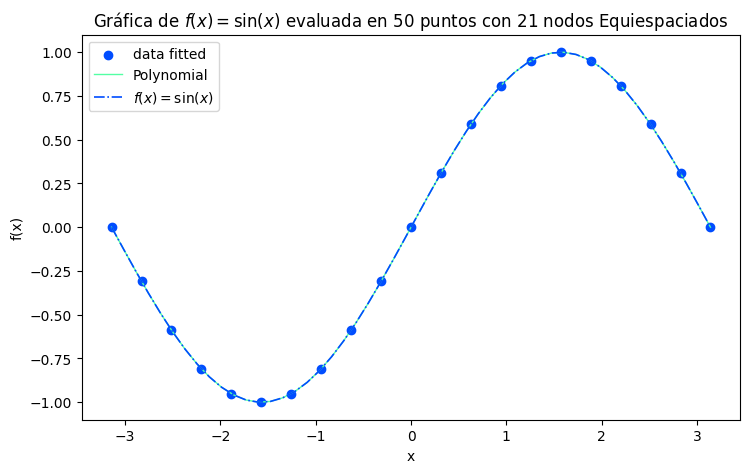

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


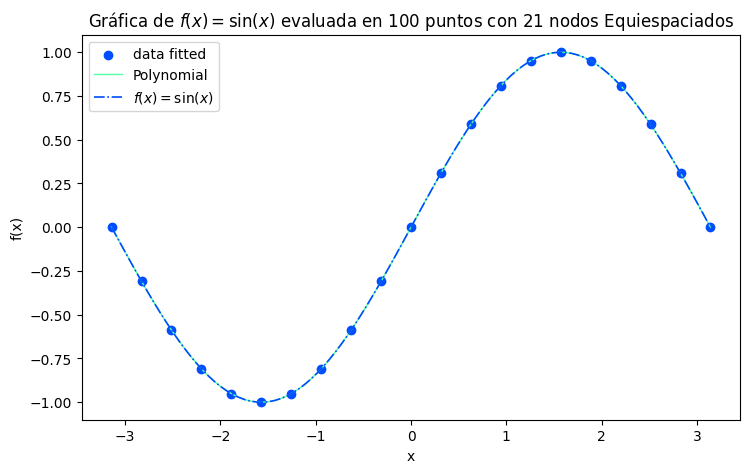

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


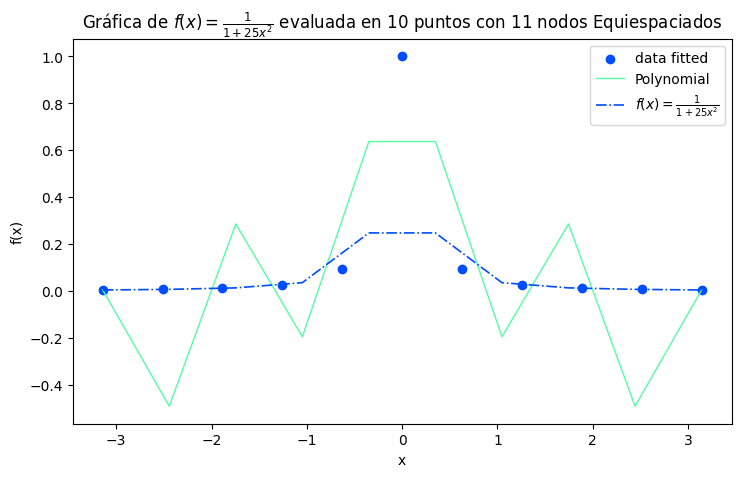

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


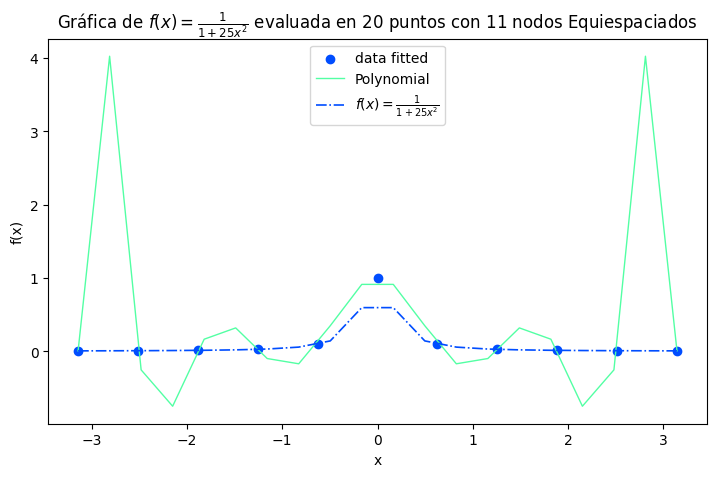

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


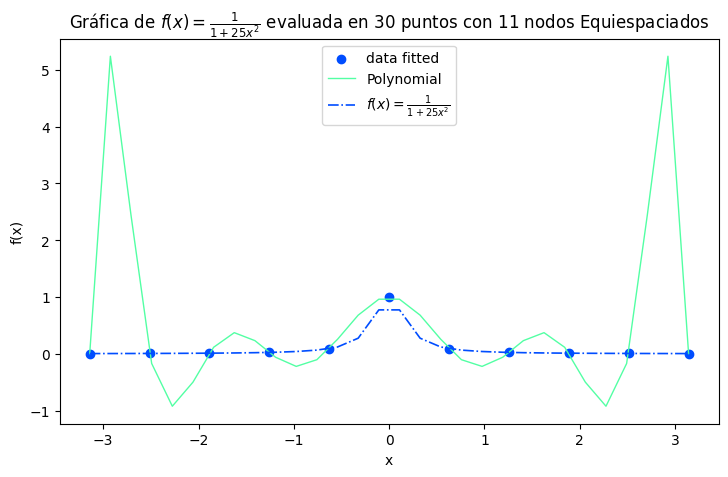

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


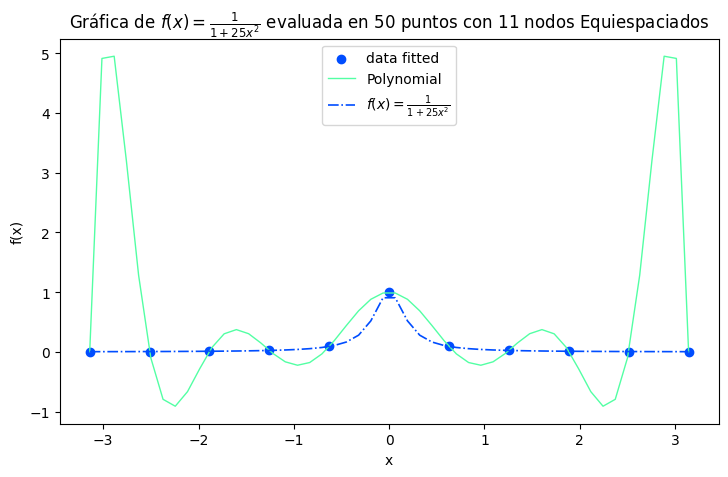

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


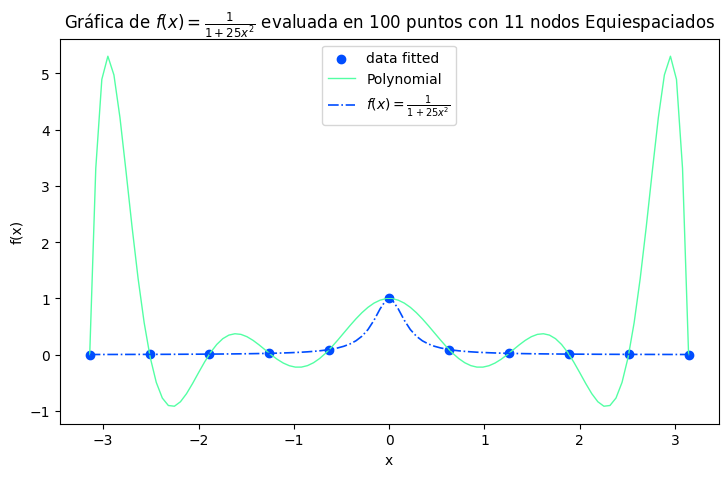

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


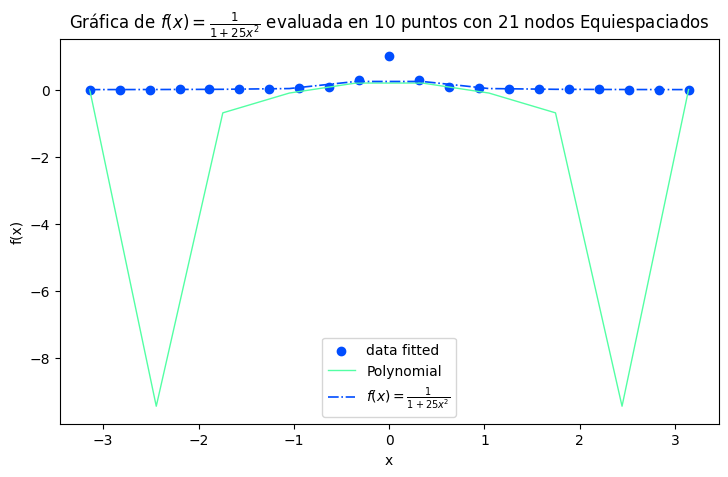

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


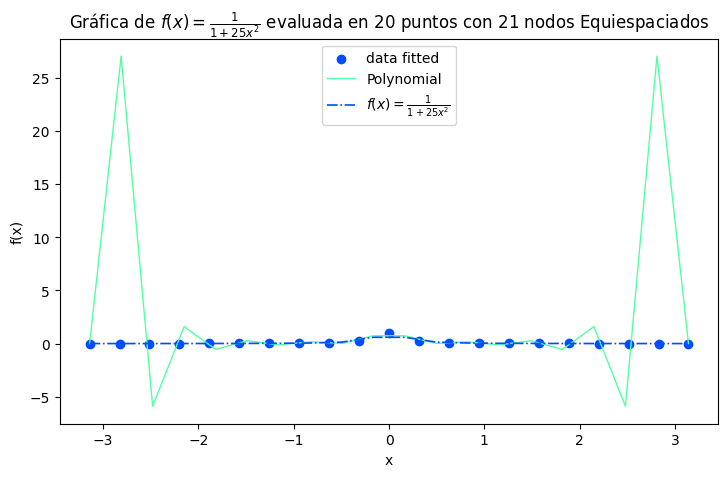

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


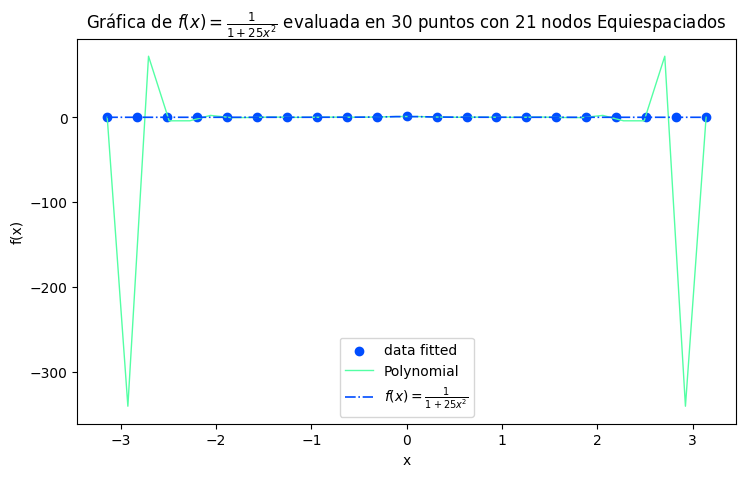

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


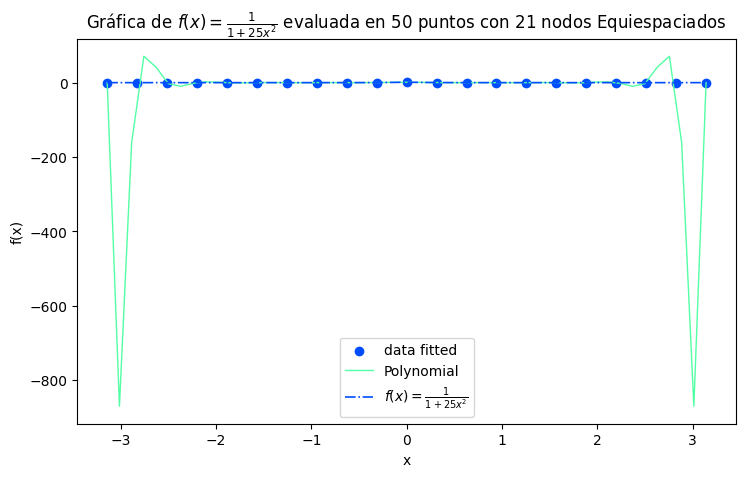

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


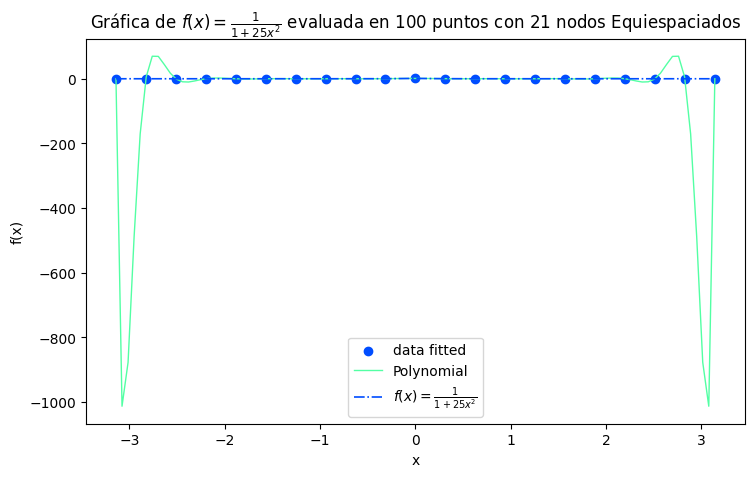

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


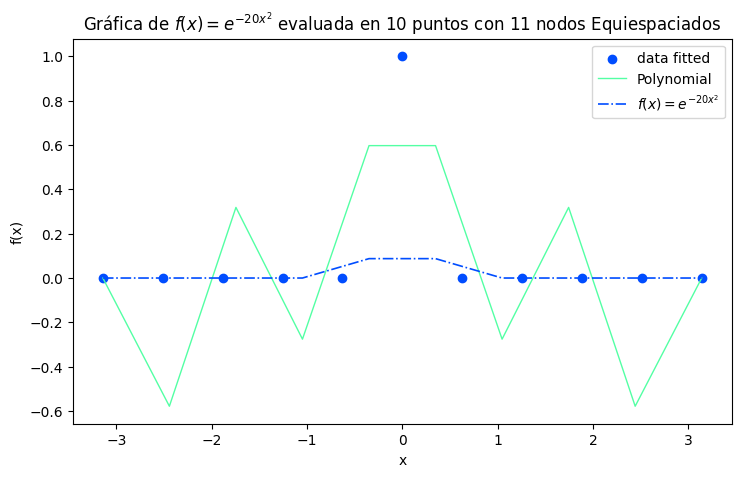

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


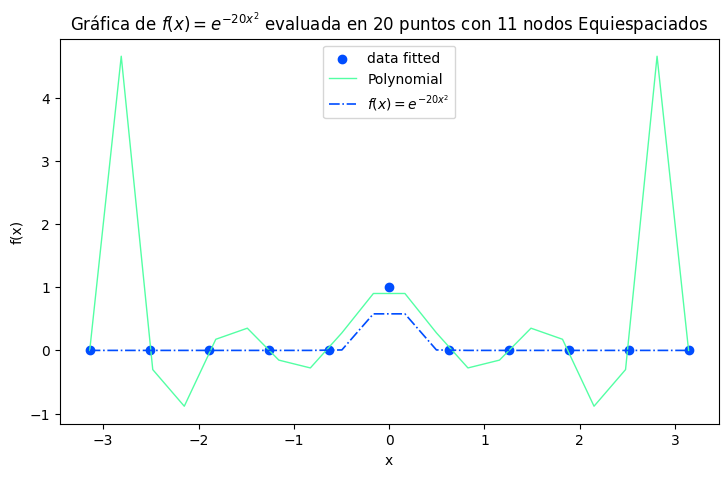

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


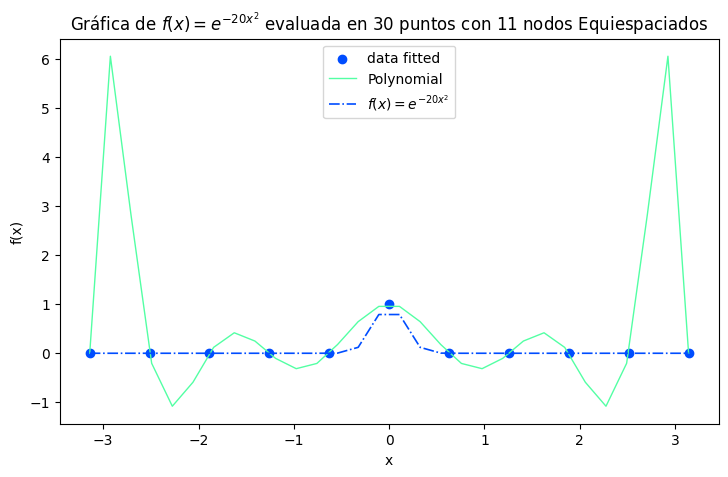

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


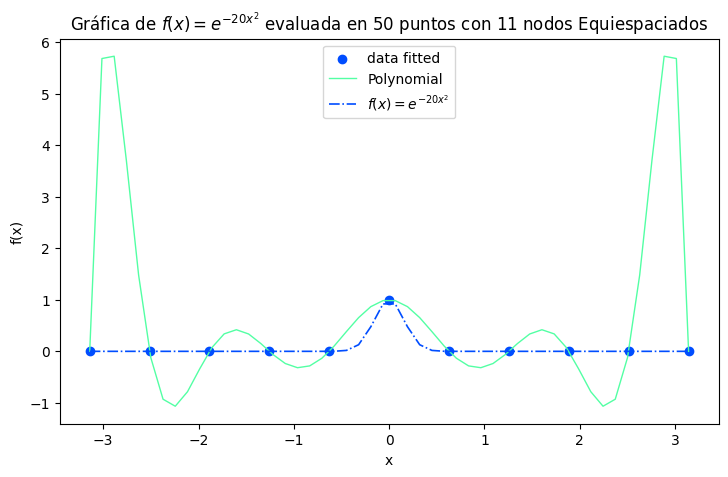

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


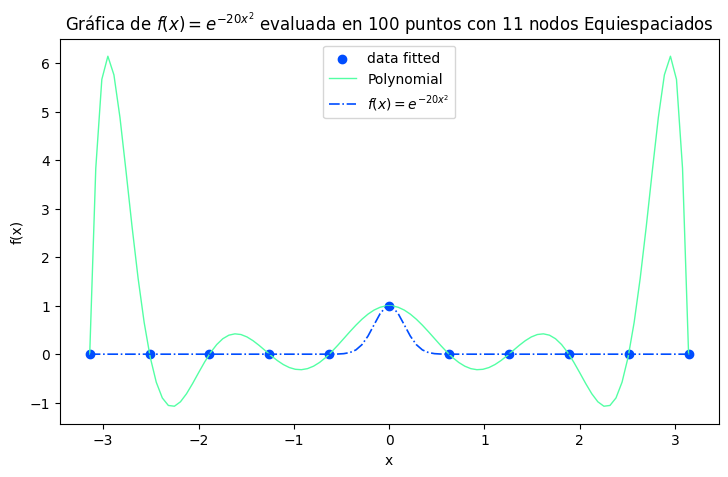

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


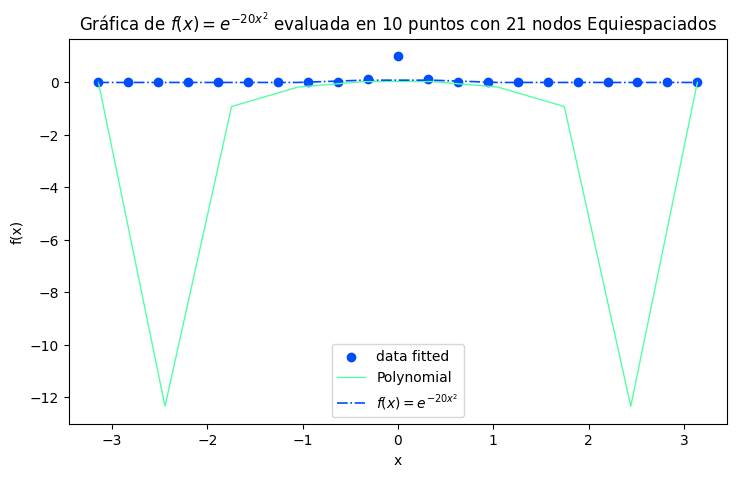

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


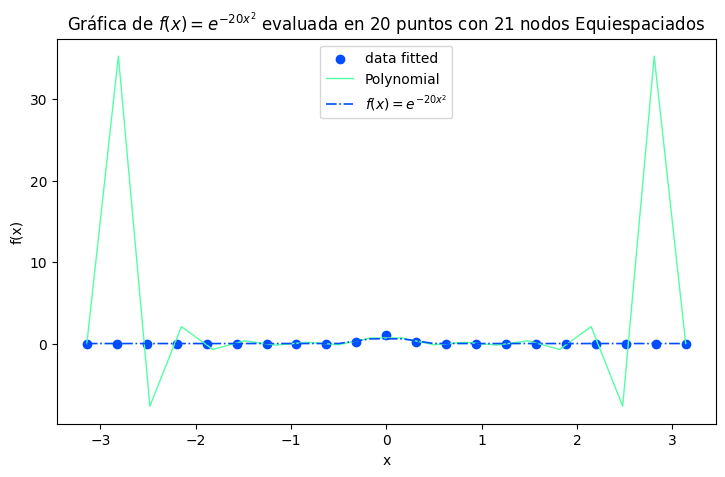

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


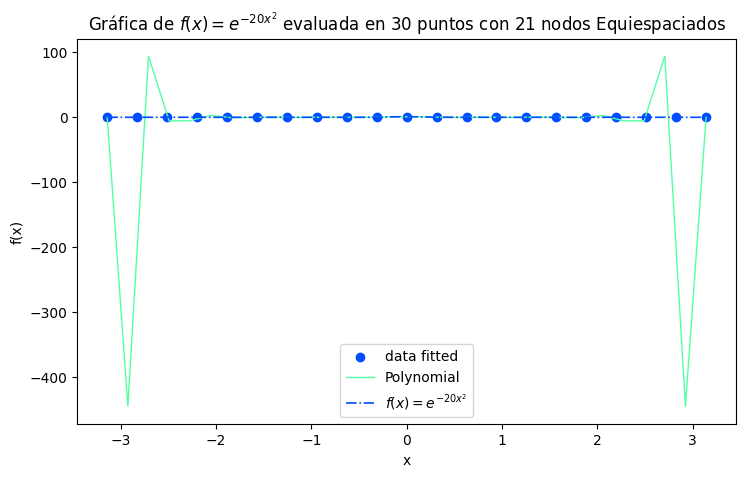

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


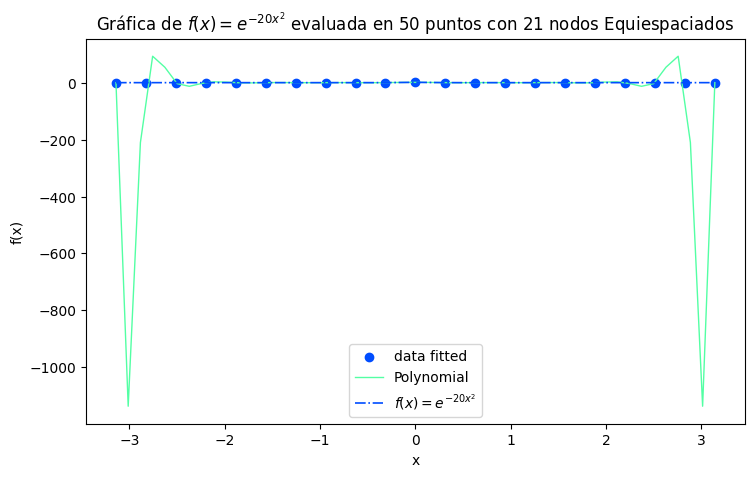

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


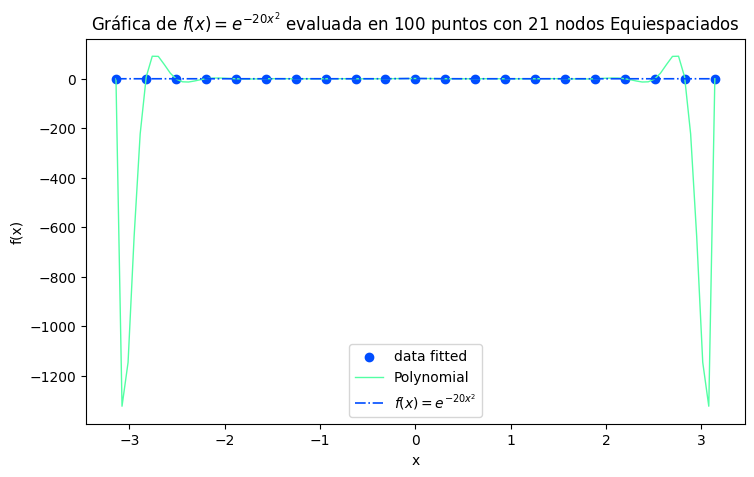

In [74]:
# Para nodos equiespaciados

df_equi_11_f1 = sensibility_analysis(n_evaluation=n,
                    interval=interval,
                    x_data=x_equi_11,
                    w_data=w_equi_11_f1,
                    f_evaluate=y_1,
                    f_name=r"$f(x) = \sin(x)$",
                    method="Equiespaciados")

df_equi_21_f1 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_equi_21,
                     w_data=w_equi_21_f1,
                     f_evaluate=y_1,
                    f_name=r"$f(x) = \sin(x)$",
                    method="Equiespaciados")

df_equi_11_f2 = sensibility_analysis(n_evaluation=n,
                    interval=interval,
                    x_data=x_equi_11,
                    w_data=w_equi_11_f2,
                    f_evaluate=y_2,
                    f_name=r"$f(x) = \frac{1}{1 + 25x^2}$",
                    method="Equiespaciados")

df_equi_21_f2 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_equi_21,
                     w_data=w_equi_21_f2,
                     f_evaluate=y_2,
                    f_name=r"$f(x) = \frac{1}{1 + 25x^2}$",
                    method="Equiespaciados")

df_equi_11_f3 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_equi_11,
                     w_data=w_equi_11_f3,
                     f_evaluate=y_3, f_name=r"$f(x) = e^{-20x^2}$", method="Equiespaciados")

df_equi_21_f3 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_equi_21,
                     w_data=w_equi_21_f3,
                     f_evaluate=y_3, f_name=r"$f(x) = e^{-20x^2}$", method="Equiespaciados")


In [75]:
df_r = pd.concat([df_ch_11_f1,
                  df_ch_21_f1,
                  df_ch_11_f2,
                  df_ch_21_f2,
                  df_ch_11_f3,
                  df_ch_21_f3,
                  df_equi_11_f1,
                  df_equi_21_f1,
                  df_equi_11_f2,
                  df_equi_21_f2,
                  df_equi_11_f3,
                  df_equi_21_f3], axis=0)
df_r

Método      Función Puntos evaluados Nodos Error absoluto  \
10        Chebyshev         seno               10    11         0.0000   
20        Chebyshev         seno               20    11         0.0001   
30        Chebyshev         seno               30    11         0.0001   
50        Chebyshev         seno               50    11         0.0002   
100       Chebyshev         seno              100    11         0.0004   
10        Chebyshev         seno               10    21         0.0000   
20        Chebyshev         seno               20    21         0.0000   
30        Chebyshev         seno               30    21         0.0000   
50        Chebyshev         seno               50    21         0.0000   
100       Chebyshev         seno              100    21         0.0000   
10        Chebyshev     fracción               10    11         1.6476   
20        Chebyshev     fracción               20    11         3.0874   
30        Chebyshev     fracción               30    11         4.6698   
50        Chebyshev     fracción               50    11         7.6549   
100       Chebyshev     fracción              100    11        15.3249   
10        Chebyshev     fracción               10    21         0.6166   
20        Chebyshev     fracción               20    21         1.2741   
30        Chebyshev     fracción               30    21         1.9384   
50        Chebyshev     fracción               50    21         3.2658   
100       Chebyshev     fracción              100    21         6.4949   
10        Chebyshev  exponencial               10    11         2.0028   
20        Chebyshev  exponencial               20    11         3.4841   
30        Chebyshev  exponencial               30    11         5.3548   
50        Chebyshev  exponencial               50    11         8.8205   
100       Chebyshev  exponencial              100    11        17.6675   
10        Chebyshev  exponencial               10    21         0.8114   
20        Chebyshev  exponencial               20    21         1.4978   
30        Chebyshev  exponencial               30    21         2.3964   
50        Chebyshev  exponencial               50    21         4.0649   
100       Chebyshev  exponencial              100    21         8.0809   
10   Equiespaciados         seno               10    11         0.0000   
20   Equiespaciados         seno               20    11         0.0001   
30   Equiespaciados         seno               30    11         0.0002   
50   Equiespaciados         seno               50    11         0.0003   
100  Equiespaciados         seno              100    11         0.0007   
10   Equiespaciados         seno               10    21         0.0000   
20   Equiespaciados         seno               20    21         0.0000   
30   Equiespaciados         seno               30    21         0.0000   
50   Equiespaciados         seno               50    21         0.0000   
100  Equiespaciados         seno              100    21         0.0000   
10   Equiespaciados     fracción               10    11         2.7811   
20   Equiespaciados     fracción               20    11        12.7454   
30   Equiespaciados     fracción               30    11        22.4079   
50   Equiespaciados     fracción               50    11        40.6045   
100  Equiespaciados     fracción              100    11        84.4196   
10   Equiespaciados     fracción               10    21        20.6672   
20   Equiespaciados     fracción               20    21        71.6515   
30   Equiespaciados     fracción               30    21       849.5066   
50   Equiespaciados     fracción               50    21      2329.2497   
100  Equiespaciados     fracción              100    21      5595.9830   
10   Equiespaciados  exponencial               10    11         3.3630   
20   Equiespaciados  exponencial               20    11        14.7954   
30   Equiespaciados  exponencial               30    11        26.0871   
50   Equiespaciad

A efectos visuales se ha configurado el eje `y` en escala logarítmica de los gráficos de error, tal como se muestra a continuación.

<Figure size 1000x700 with 0 Axes>

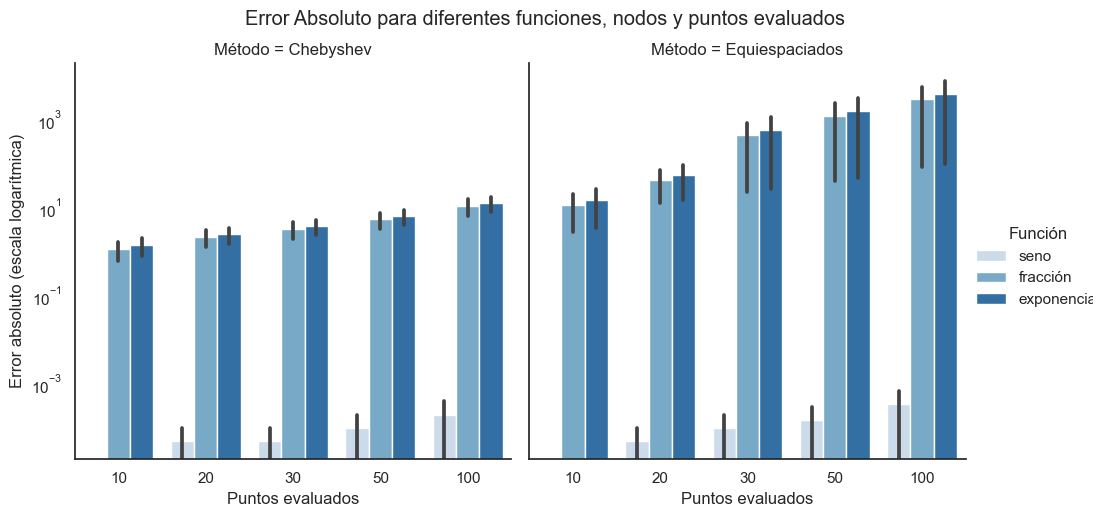

In [76]:
sns.set(style="white")
df = df_r.copy()
df = df.reset_index()
df = df.sort_values(by=['Error absoluto'], ascending=True)
df['Error absoluto'] = df['Error absoluto'].astype(float)
df['Tiempo (s)'] = df['Tiempo (s)'].astype(float)
df['Nodos'] = df['Nodos'].astype(float)
# df.info()
plt.figure(figsize=(10, 7))
# sns.barplot(x="Puntos evaluados", y="Error absoluto", hue="Función", data=df, palette='Blues')
g = sns.catplot(x="Puntos evaluados",
                y="Error absoluto",
                hue="Función",
                col="Método",
                kind="bar",
                data=df,
                palette='Blues')
plt.suptitle("Error Absoluto para diferentes funciones, nodos y puntos evaluados", y=1.03)

# Configuración de los ejes en escala logarítmica
ax = g.axes.flat[0]
ax.set_yscale("log")
ax.set_ylabel('Error absoluto (escala logarítmica)')
sns.despine()
g._legend.set_bbox_to_anchor((0.98, 0.5))
g._legend.set_title("Función")
plt.show()

<Figure size 1000x700 with 0 Axes>

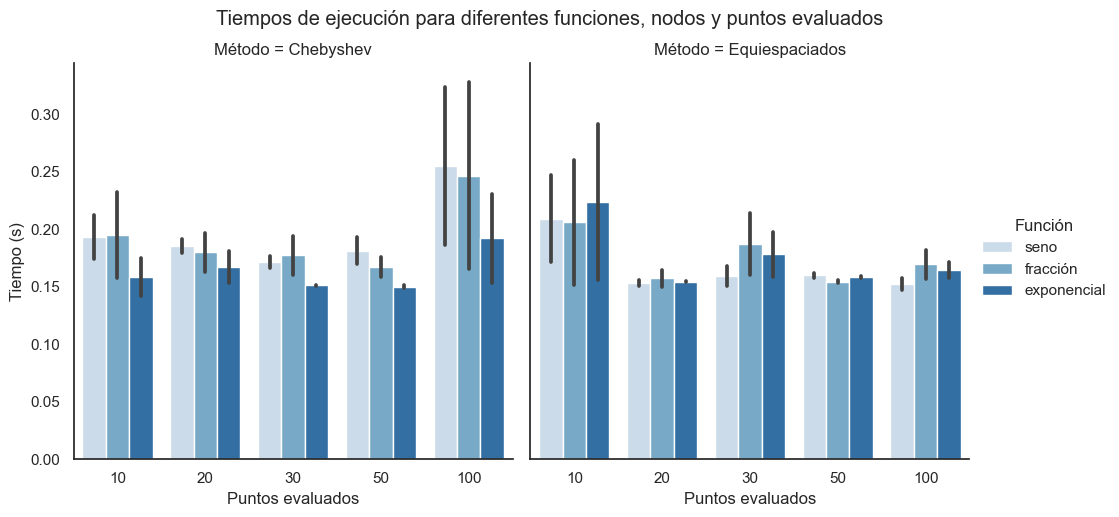

In [77]:
plt.figure(figsize=(10, 7))
sns.catplot(x="Puntos evaluados", y="Tiempo (s)", hue="Función", col="Método",
                kind="bar", data=df, palette='Blues')
plt.suptitle("Tiempos de ejecución para diferentes funciones, nodos y puntos evaluados", y=1.03)
plt.show()

### Conclusiones
A continuación, describiremos los hallazgos más relevantes encontrados hasta esta parte:

* Se destaca la marcada inestabilidad observada cuando se intenta evaluar un polinomio de grado 20 (21 nodos) para las funciones $\frac{1}{1 + 25x^2}$ y $e^{-20x^2}$ dentro del intervalo $[-\pi, \pi]$ en 20 o más puntos de $x$. Este hecho se observa tanto si lo nodos son `equiespaciados` como si fueron obtenidos por `Chebyshev`. Vale resaltar que este comportamiento era esperable dada la existencia del fenómeno de `Runge` citado por la misma documentación de `Scipy` cuando se utilizan interpolaciones de `Lagrange`.

* En cuanto a los valores de error, se ha encontrado que éstos son mínimos en en los polinomios grado 10 y 20 obtenidos a partir de la función $\sin(x)$, mientras que para las funciones $\frac{1}{1 + 25x^2}$ y $e^{-20x^2}$ el error absoluto aumenta de manera considerable. Esto se debe a las marcadas oscilaciones arrojadas por los polinomios de `Lagrange` en los extremos de las funciones antesmencionadas.

* Análogamente, los valores de error absoluto obtenidos de los polinomios grado 10 y 20 evaluados en las funciones $\frac{1}{1 + 25x^2}$ y $e^{-20x^2}$ son aun más pronunciados y evidentes para nodos `equiespaciados`.

* Los tiempos de ejecución en segundos han sido mayores cuando se tratan de ajustar polinomios de grado 10 y 20 con nodos `equiespaciados`, que cuando los nodos han sido obtenidos para `Chebyshev`. No se encotró relación lineal entre los tiempos de ejecución y el tipo de función que se estaba aproximando.

* El fenómeno de `Runge` se hace mucho más evidente en aquellas funciones cuyos extremos sea lineales con pendiente 0, como es el caso de las funciones $\frac{1}{1 + 25x^2}$ y $e^{-20x^2}$.

* Para la aproximación polinomica de las funciones $\frac{1}{1 + 25x^2}$ y $e^{-20x^2}$ se recomiendan métodos alternativos como `trazadores cúbicos` los cuales serán aplicados más adelante en esta actividad.

# Método de Interpolación de Newton


### Fundamento matemático

El método de interpolación de Newton consiste en dos pasos. Primero debemos calcular una serie de coeficientes que suelen ser representados en una tabla. Segundo, obtenemos el polinomio de interpolación de Newton.

El primer paso consiste en generar una tabla con n-1 columnas y n filas. Cada columna es rellenada con funciones del tipo:

$$f_k(\{x\}_{i}^{j}) = \frac{f(x_j) - f(x_i)}{x_j - x_i} \ donde \ j = i + k $$ 
 El segundo paso consiste en la obtención del Polinomio de Interpolación de Newton que tiene la forma:

$$p_i(x) = p_{i-1}(x) + f_i(\{x\}_{0}^{i}) \prod_{j=0}^{n} (x - x_j) (
x_i)$$

### Aplicación comput
aEn este caso, describiemos el método computacional empleado en un apartado posterior de nombre 'Método de Diferencias Divididas de Newton - Implementación'.cóptima.

## Funciones
* $f(x) = \sin(x)$

* $f(x) = \frac{1}{1 + 25x^2}$

* $f(x) = e^{-20x^2}$

## Bibliotecas y dependencias

In [78]:
pip install sympy  

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\javie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [79]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
import sympy as spy
cmap = cm.jet

## Nodos de interpolación

In [80]:
x_11 = np.loadtxt('nodos_11.txt', delimiter='\t')
x_21 = np.loadtxt('nodos_21.txt', delimiter='\t')
x_11_equis = np.loadtxt('nodos_equis_11.txt', delimiter='\t')
x_21_equis = np.loadtxt('nodos_equis_21.txt', delimiter='\t')

In [81]:
#Funciones de trabajo

def y_1(x:np.array)->np.array:
  '''
  Devuelve el resultado del seno de cada elemento de x
    y = np.sin(x)
  inputs:
    x (np.array): arreglo unidimensional de valores de x en radianes

  return:
    sin(x) (np.array): seno del ángulo para cada valor de x
  '''
  return np.sin(x)

def y_2(x:np.array)->np.array:
  '''
  Devuelve el resultado de la expresión 1/(1+(25*x**2)) para cada elemento de x
    y = 1/(1+(25*x**2))
  inputs:
    x(np.array): arreglo unidimensional de valores de x

  return:
    1/(1+(25*x**2)) (np.array): resultado de la expresión dada para cada valor de x
  '''
  return 1/(1+(25*x**2))

def y_3(x:np.array)->np.array:
  '''
  Devuelve el resultado de la expresión np.exp(-20*x**2) para cada elemento de x
    y = np.exp(-20*x**2)
  inputs:
    x (np.array): arreglo unidimensional de valores de x

  return:
    np.exp(-20*x**2) (np.array): resultado de la expresión para cada valor de x
  '''

  return np.exp(-20*x**2)

### Método de Diferencias Divididas de Newton - Implementación



En la siguiente celda de ejecución podemos ver el método de diferencias de Newton implementado. Tenemos tres funciones:
- La primera función es Newton_table, encargada de obtener la tabla de Newton asociada a un conjunto de puntos x,y; que coinciden con los nodos y el efecto de la función f(x) sobre estos
- La segunda función es Newton_Poly, que a partir de la tabla obtenida con el método anterior permite calcular el polinomio de Newton asociado
- Finalmente tenemos una función encargada de representar los resultados que hemos denomindado plot_results. Además, esta función calcula el error absoluto asociado al método.

In [82]:
error_dict_1 = {}
error_dict_2 = {}
error_dict_3 = {}
def Newton_table(x, y):
    n = len(x)
 
    input_array = np.transpose(np.array([x, y]))
    res_array= np.zeros([n, n-1])
    res_array = np.concatenate((input_array, res_array), axis=1)
    for j in range(2,n+2):
        
        for i in range(n-j+1):
    
            res_array[i,j] = (res_array[i+1,j-1]-res_array[i,j-1])/((x[i+j-1] - x[i]))
            
    return res_array
def Newton_Poly(Newton_table):
    x = spy.Symbol('x')
    poly_list =[]
    rows, n = Newton_table.shape
    p0 = Newton_table[0,1]
    
    for col in range(2, n):
        poly_str =1
        for row in range(col-1):
            
            poly_str = poly_str * (x-Newton_table[row,0])
            
        poly_str = Newton_table[0,col]* poly_str
        
        p0 += poly_str
        
    return p0     

def plot_results(x_val, y_val, poly, f, desc):
    x = spy.Symbol('x')
    
    plt.plot(x_val,y_val)

    x_to_eval =  array = np. arange(start=x_val[0], stop=x_val[-1], step=0.1)
    n = len(x_to_eval)
    
    pol_eval = np.zeros(n)
    for i in range(n):
        x_i= x_to_eval[i]
        
        pol_eval_i = poly.evalf(subs={x:x_i})
        pol_eval[i] = pol_eval_i

    err = 0
    for i in range(len(x_val)):
        x_i = x_val[i]
        
        err = err + abs(y_val[i] - poly.evalf(subs={x:x_i}))
    err_eval  =0   
    for i in range(n):
        x_i= x_to_eval[i]
        y_eval =  f(x_i)   
        err_eval = err_eval + abs(y_eval - poly.evalf(subs={x:x_i}))
    plt.plot(x_to_eval, pol_eval)
    print('El error absoluto del ajuste, en los nodos dados, es: ', err)
    print('El error absoluto del ajuste, en el intervalo de los nodos granulado en 0.1, es: ', err_eval )
    if f == y_1:
        error_dict_1.update({desc:['Error en los nodos', err, 'Error en el intervalo a paso 0.1', err_eval]})
    if f == y_2:
        error_dict_2.update({desc:['Error en los nodos', err, 'Error en el intervalo a paso 0.1', err_eval]})
    if f == y_3:
        error_dict_3.update({desc:['Error en los nodos', err, 'Error en el intervalo a paso 0.1', err_eval]})

### Función sin(x)

Cuando trabjamos con 11 nodos equiespaciados tenemos:

In [83]:
x_val = x_11_equis
y_val = y_1(x_val)

In [84]:
%%time
sinx_11_eq_tab = Newton_table(x_val, y_val)
sinx_11_eq_poly = Newton_Poly(sinx_11_eq_tab)

CPU times: total: 15.6 ms
Wall time: 53.1 ms


Calculamos el polinomio como:

Representado los resultados:

El error absoluto del ajuste, en los nodos dados, es:  5.69859770918133e-15
El error absoluto del ajuste, en el intervalo de los nodos granulado en 0.1, es:  0.000446052154551679
CPU times: total: 188 ms
Wall time: 383 ms


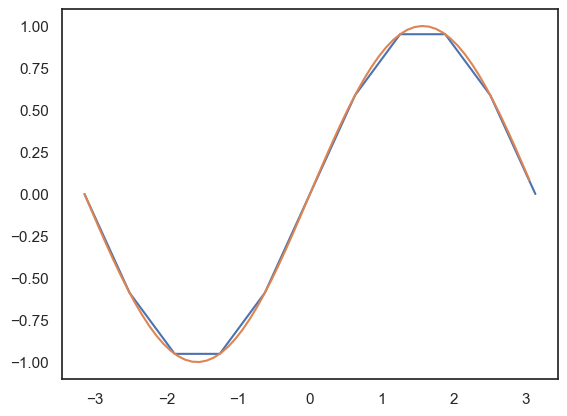

In [85]:
%%time
plot_results(x_val, y_val, sinx_11_eq_poly, y_1, 'Sin(x) 11 nodos equiespaciados')

Para el caso de sin(x) con 11 nodos de Chebyshev:

In [86]:
x_val = x_11
y_val = y_val = y_1(x_val)

In [87]:
%%time
sinx_11_cheby_tab = Newton_table(x_val, y_val)
sinx_11_cheby_poly = Newton_Poly(sinx_11_eq_tab)


CPU times: total: 0 ns
Wall time: 3 ms


El error absoluto del ajuste, en los nodos dados, es:  0.000145138280182775
El error absoluto del ajuste, en el intervalo de los nodos granulado en 0.1, es:  0.000456703487444388
CPU times: total: 266 ms
Wall time: 382 ms


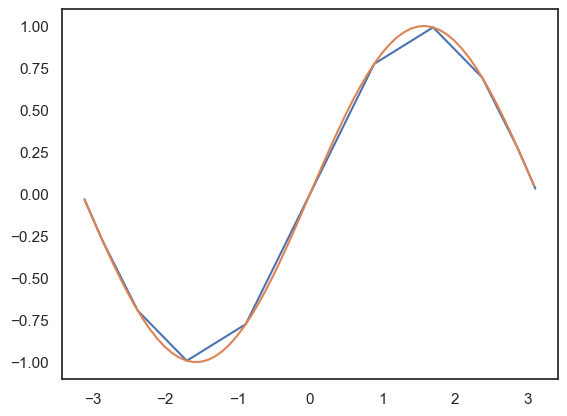

In [88]:
%%time
plot_results(x_val, y_val, sinx_11_cheby_poly,y_1, 'Sin(x) 11 nodos de Chebyshev')

Para el caso de 21 nodos equidistantes:

In [89]:
x_val = x_21_equis
y_val = y_1(x_val)

In [90]:
%%time
sinx_21_eq_tab = Newton_table(x_val, y_val)
sinx_21_eq_poly = Newton_Poly(sinx_21_eq_tab)


CPU times: total: 0 ns
Wall time: 29.1 ms


El error absoluto del ajuste, en los nodos dados, es:  4.59475610303342e-15
El error absoluto del ajuste, en el intervalo de los nodos granulado en 0.1, es:  4.15071831690293e-13
CPU times: total: 1.19 s
Wall time: 1.44 s


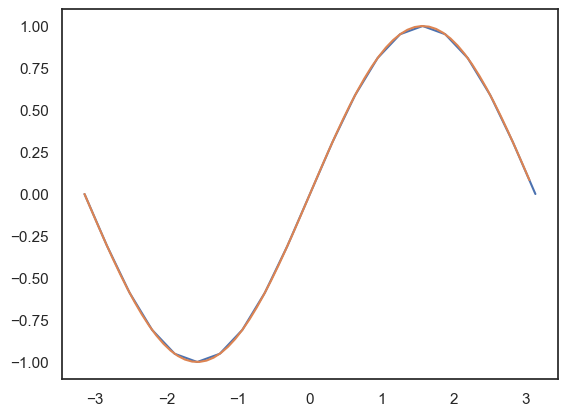

In [91]:
%%time
plot_results(x_val, y_val, sinx_21_eq_poly, y_1, 'Sin(x) 21 nodos equiespaciados')

Para el caso de los 21 nodos de Chebyshev:

In [92]:
x_val = x_21
y_val = y_1(x_val)

In [93]:
%%time
sinx_21_cheby_tab = Newton_table(x_val, y_val)
sinx_21_cheby_poly = Newton_Poly(sinx_21_cheby_tab)

CPU times: total: 0 ns
Wall time: 29.7 ms


El error absoluto del ajuste, en los nodos dados, es:  1.31476450513330e-14
El error absoluto del ajuste, en el intervalo de los nodos granulado en 0.1, es:  3.31852600954363e-14
CPU times: total: 1.28 s
Wall time: 1.53 s


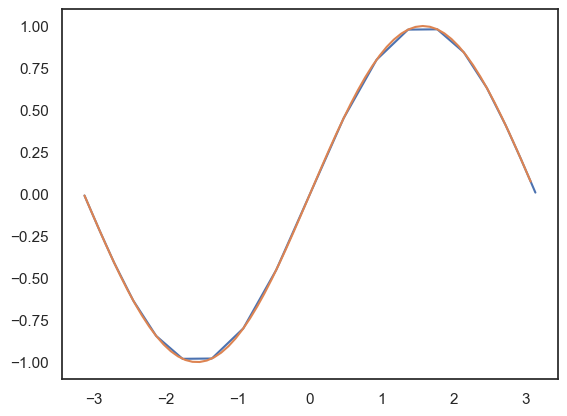

In [94]:
%%time
plot_results(x_val, y_val, sinx_21_cheby_poly, y_1, 'Sin(x) 21 nodos de Chebyshev')

### Función $f(x) = \frac{1}{1 + 25x^2}$



Para 11 nodos equidistantes

In [95]:
x_val = x_11_equis
y_val = y_2(x_val)

In [96]:
%%time
y25_11_eq_tab = Newton_table(x_val, y_val)

y25_11_eq_poly = Newton_Poly(y25_11_eq_tab)


CPU times: total: 0 ns
Wall time: 10.5 ms


El error absoluto del ajuste, en los nodos dados, es:  2.82699211262560e-14
El error absoluto del ajuste, en el intervalo de los nodos granulado en 0.1, es:  53.4641665288636
CPU times: total: 281 ms
Wall time: 457 ms


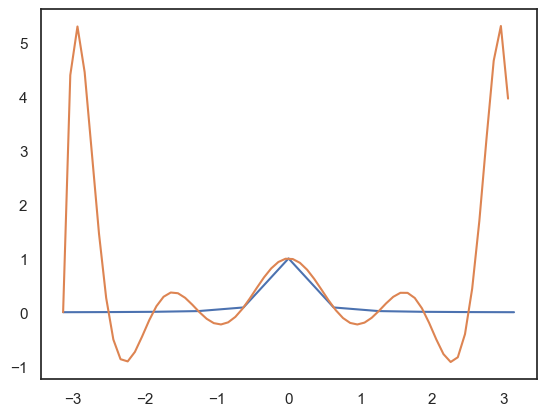

In [97]:
%%time
plot_results(x_val, y_val, y25_11_eq_poly, y_2, '1/(1+25x^2) 11 nodos equiespaciados')

Para el caso de 11 nodos de Chebyshev:

In [98]:
x_val = x_11
y_val = y_2(x_val)

In [99]:
%%time
y25_11_cheby_tab = Newton_table(x_val, y_val)
y25_11_cheby_poly = Newton_Poly(y25_11_cheby_tab)

CPU times: total: 0 ns
Wall time: 12.9 ms


El error absoluto del ajuste, en los nodos dados, es:  2.30041680149284e-14
El error absoluto del ajuste, en el intervalo de los nodos granulado en 0.1, es:  9.58086191186604
CPU times: total: 422 ms
Wall time: 521 ms


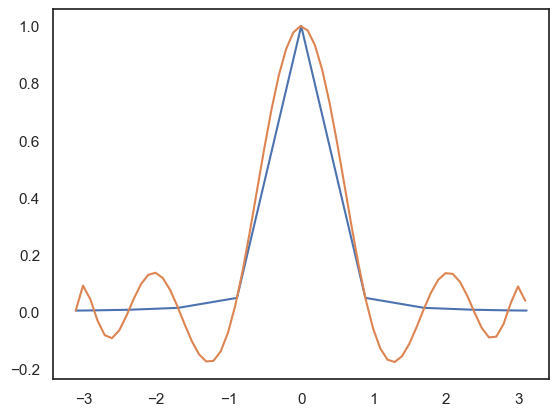

In [100]:
%%time
plot_results(x_val, y_val, y25_11_cheby_poly, y_2,'1/(1+25x^2) 11 nodos de Chebyshev')

Para el caso de 21 nodos equiespaciados:

In [101]:
x_val = x_21_equis
y_val = y_2(x_val)

In [102]:
%%time
y25_21_eq_tab = Newton_table(x_val, y_val)
y25_21_eq_poly = Newton_Poly(y25_21_eq_tab)

CPU times: total: 0 ns
Wall time: 18.3 ms


El error absoluto del ajuste, en los nodos dados, es:  3.70919485057075e-9
El error absoluto del ajuste, en el intervalo de los nodos granulado en 0.1, es:  3425.55869623703
CPU times: total: 1.75 s
Wall time: 2.03 s


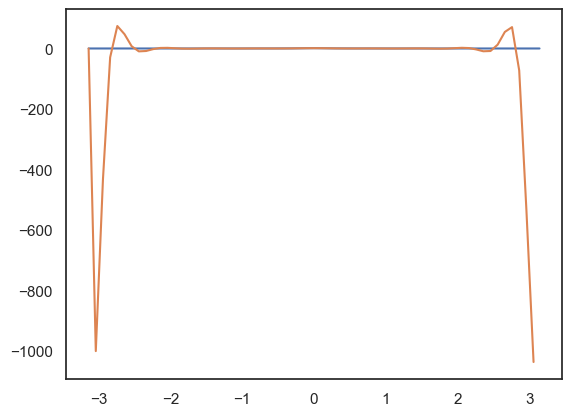

In [103]:
%%time
plot_results(x_val, y_val, y25_21_eq_poly, y_2,'1/(1+25x^2) 21 nodos equiespaciados')

Para el caso de 21 nodos de Chebyshev:

In [104]:
x_val = x_21
y_val = y_2(x_val)

In [105]:
%%time
y25_21_cheby_tab = Newton_table(x_val, y_val)
y25_21_cheby_poly = Newton_Poly(y25_21_cheby_tab)

CPU times: total: 0 ns
Wall time: 23.2 ms


El error absoluto del ajuste, en los nodos dados, es:  4.11011793176319e-10
El error absoluto del ajuste, en el intervalo de los nodos granulado en 0.1, es:  4.03351596119562
CPU times: total: 1.77 s
Wall time: 2.01 s


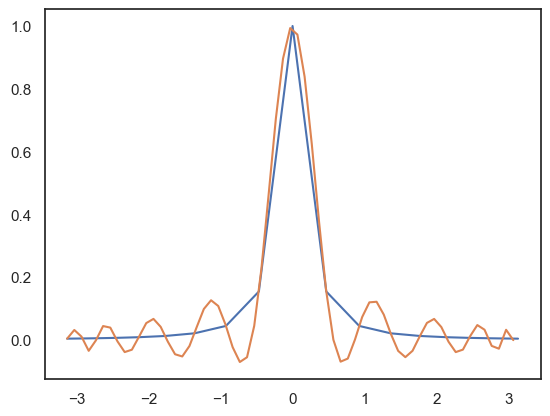

In [106]:
%%time
plot_results(x_val, y_val, y25_21_cheby_poly, y_2, '1/(1+25x^2) 21 nodos de Chebyshev')

### Función $f(x) = e^{-20x^2}$


Para el caso de 11 nodos equidistantes:

In [107]:
%%time
x_val = x_11_equis
y_val = y_3(x_val)

ye_11_eq_tab = Newton_table(x_val, y_val)
ye_11_eq_poly = Newton_Poly(ye_11_eq_tab)


CPU times: total: 15.6 ms
Wall time: 8.53 ms


El error absoluto del ajuste, en los nodos dados, es:  1.57395801696408e-13
El error absoluto del ajuste, en el intervalo de los nodos granulado en 0.1, es:  62.2468352351988
CPU times: total: 312 ms
Wall time: 445 ms


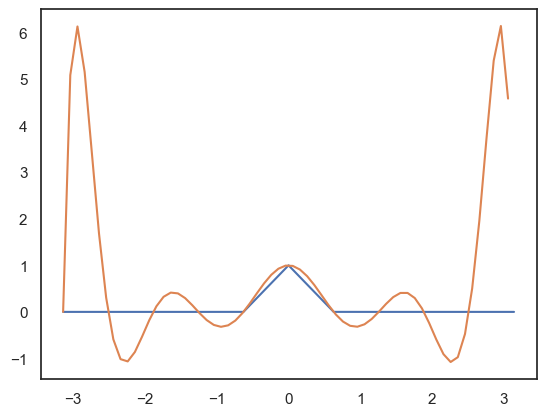

In [108]:
%%time
plot_results(x_val, y_val, ye_11_eq_poly, y_3, 'e^(-20*x^2) 11 nodos equiespaciados')

Para el caso de 11 nodos de Chebyshev:

In [109]:
%%time
x_val = x_11
y_val = y_3(x_val)

ye_11_cheb_tab = Newton_table(x_val, y_val)
ye_11_cheb_poly = Newton_Poly(ye_11_cheb_tab)

CPU times: total: 0 ns
Wall time: 5.53 ms


El error absoluto del ajuste, en los nodos dados, es:  6.09321005392697e-14
El error absoluto del ajuste, en el intervalo de los nodos granulado en 0.1, es:  11.0541186805816
CPU times: total: 438 ms
Wall time: 530 ms


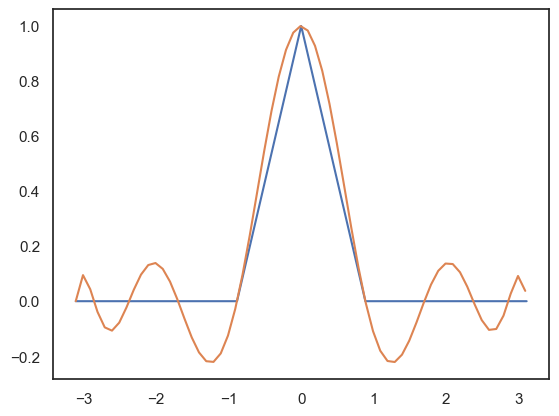

In [110]:
%%time
plot_results(x_val, y_val, ye_11_cheb_poly, y_3, 'e^(-20*x^2) 11 nodos de Chebyshev')

Para 21 nodos equidistantes se tiene:

In [111]:
%%time
x_val = x_21_equis
y_val = y_3(x_val)

ye_21_eq_tab = Newton_table(x_val, y_val)
ye_21_eq_poly = Newton_Poly(ye_21_eq_tab)

CPU times: total: 0 ns
Wall time: 15.1 ms


El error absoluto del ajuste, en los nodos dados, es:  7.08621065615380e-9
El error absoluto del ajuste, en el intervalo de los nodos granulado en 0.1, es:  4473.43569472720
CPU times: total: 1.75 s
Wall time: 1.99 s


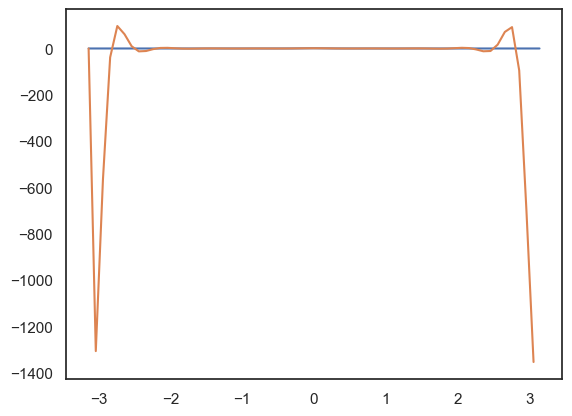

In [112]:
%%time
plot_results(x_val, y_val, ye_21_eq_poly, y_3, 'e^(-20*x^2) 21 nodos equiespaciados')

Para el caso de 21 nodos de Chebyshev:

In [113]:
%%time
x_val = x_21
y_val = y_3(x_val)

ye_21_cheby_tab = Newton_table(x_val, y_val)
ye_21_cheby_poly = Newton_Poly(ye_21_cheby_tab)

CPU times: total: 0 ns
Wall time: 15.1 ms


El error absoluto del ajuste, en los nodos dados, es:  2.74075316256615e-10
El error absoluto del ajuste, en el intervalo de los nodos granulado en 0.1, es:  5.01339912467243
CPU times: total: 1.98 s
Wall time: 2.1 s


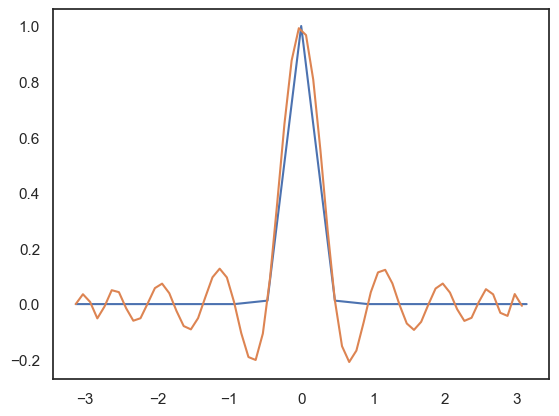

In [114]:
%%time
plot_results(x_val, y_val, ye_21_cheby_poly, y_3, 'e^(-20*x^2) 21 nodos de Chebyshev')

In [115]:
print(error_dict_1)

{'Sin(x) 11 nodos equiespaciados': ['Error en los nodos', 5.69859770918133e-15, 'Error en el intervalo a paso 0.1', 0.000446052154551679], 'Sin(x) 11 nodos de Chebyshev': ['Error en los nodos', 0.000145138280182775, 'Error en el intervalo a paso 0.1', 0.000456703487444388], 'Sin(x) 21 nodos equiespaciados': ['Error en los nodos', 4.59475610303342e-15, 'Error en el intervalo a paso 0.1', 4.15071831690293e-13], 'Sin(x) 21 nodos de Chebyshev': ['Error en los nodos', 1.31476450513330e-14, 'Error en el intervalo a paso 0.1', 3.31852600954363e-14]}


In [116]:
def plot_bars(error_dict):
    
    bar_data_nodes = []
    bar_err_nodes = []
    bar_data_eval = []
    bar_err_eval = []
    
    for i in list(error_dict.keys()):
        err_nodes, err, err_inter, err_eval =error_dict[i]
        bar_data_nodes.append(i) 
        bar_data_eval.append(i)
        bar_err_nodes.append(err)
        bar_err_eval.append(err_eval)

    
    fig = plt.figure(figsize=(10,5))
    plt.xticks(rotation=30)
    plt.bar(bar_data_nodes, bar_err_nodes, color = 'blue', width = 0.2)
    plt.xlabel('Caso a estudiar')
    plt.ylabel('Error asociado')
    plt.title('Comparación en los nodos')
    plt.show()
    fig2 = plt.figure(figsize=(10,5))
    plt.xticks(rotation=30)
    plt.bar(bar_data_eval, bar_err_eval, color = 'maroon', width = 0.2)
    plt.xlabel('Caso a estudiar')
    plt.ylabel('Error asociado')
    plt.title('Comparación en el intervalo')
    plt.show()
    print('Los errores en los nodos son: ', bar_err_nodes)
    print('Los errores en el intervalo son: ', bar_err_eval)

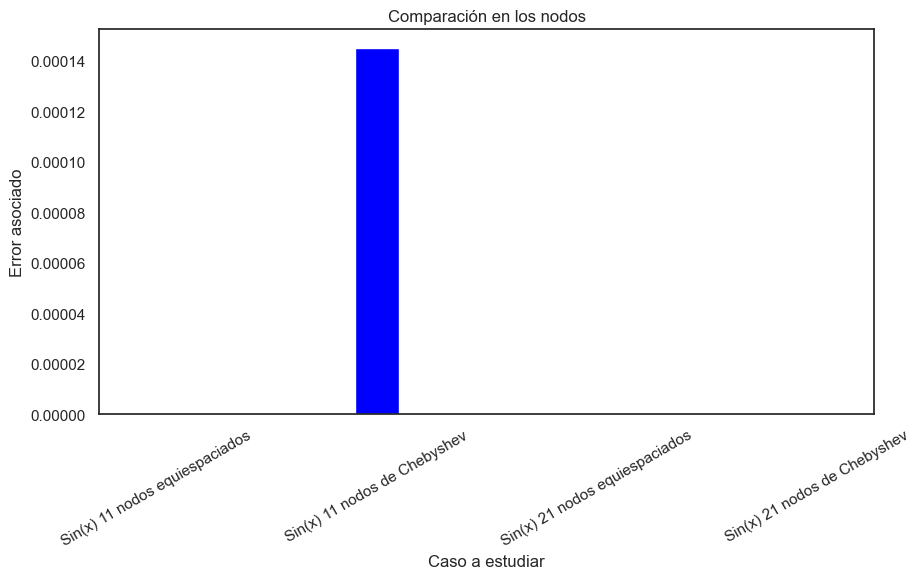

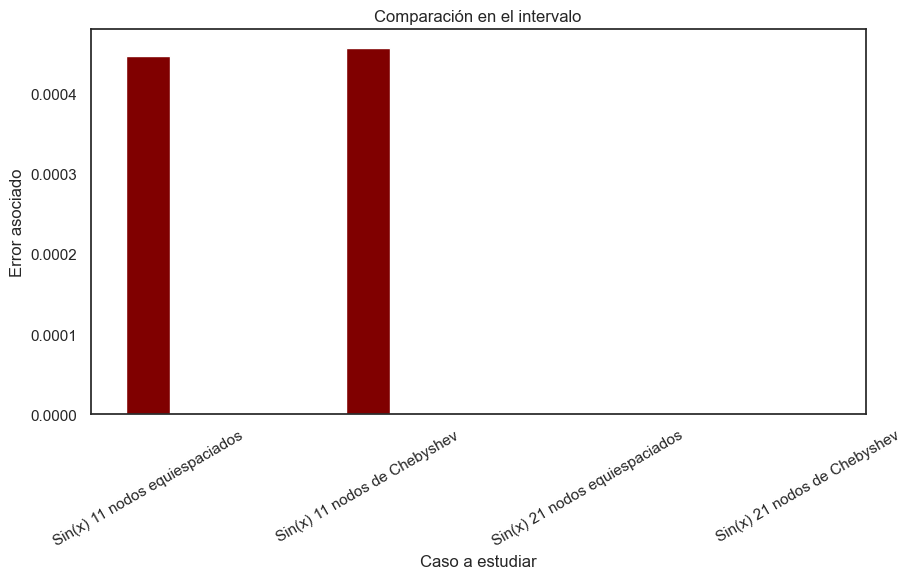

Los errores en los nodos son:  [5.69859770918133e-15, 0.000145138280182775, 4.59475610303342e-15, 1.31476450513330e-14]
Los errores en el intervalo son:  [0.000446052154551679, 0.000456703487444388, 4.15071831690293e-13, 3.31852600954363e-14]


In [117]:
plot_bars(error_dict_1)

Los que podemos comprobar para la función sin(x), es lo siguiente:
- Evaluando solamente el error en los nodos, para 11 nodos de Chebyshev obtenemos el máximo error. Esto es probablemente debido a que el comportamient ode la función sin(x) en el intervalo a estudiar es antisimétrica, lo que facilita el cálculo sin variación en la distancia entre nodos.
- En el caso de 21 nodos vemos que los errores son del orden del error para 11 nodos equidistantes.
- Cuando comparamos los errores en el intervalo con los erroes en los nodos, podemos concluir que la interpolación es mejor cuando trabajamos con 21 nodos frente a 11. Además, los nodos de Chebyshev permiten una interpolación 1 orden de magnitud superior a 21 nodos equiespaciados.

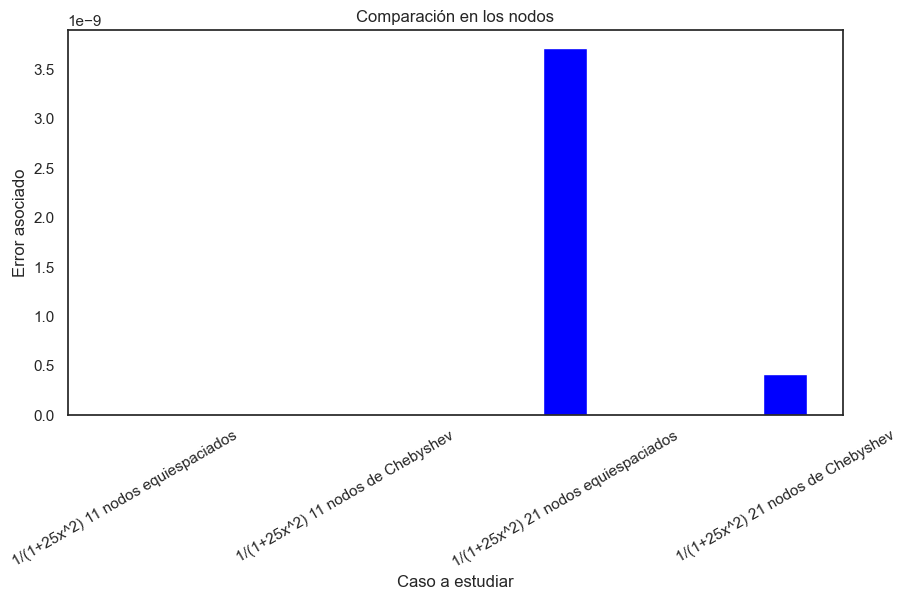

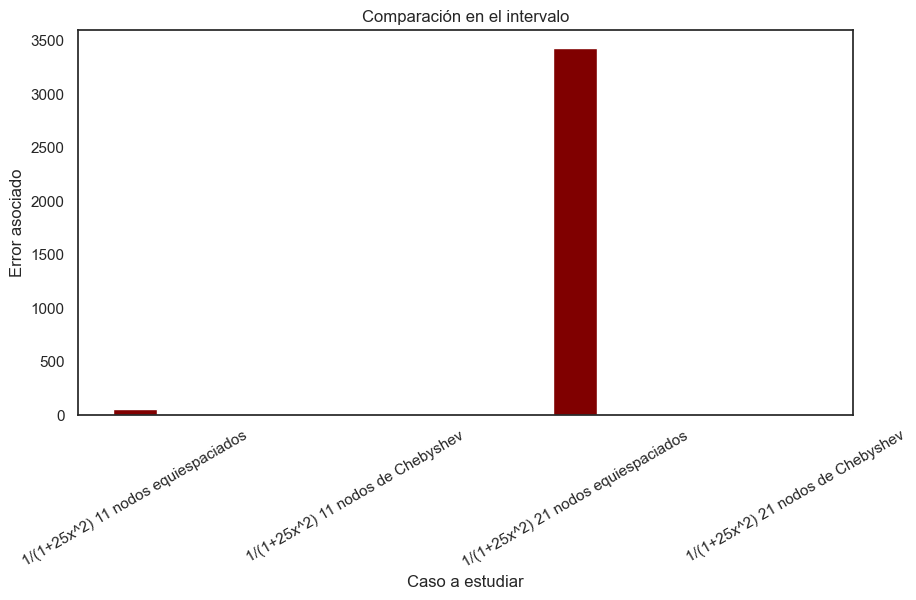

Los errores en los nodos son:  [2.82699211262560e-14, 2.30041680149284e-14, 3.70919485057075e-9, 4.11011793176319e-10]
Los errores en el intervalo son:  [53.4641665288636, 9.58086191186604, 3425.55869623703, 4.03351596119562]


In [118]:
plot_bars(error_dict_2)

Para la función 1/(1+25x^2) podemos concluir:
- Los errores evaluados en los nodos dan buenos resultados, por debajo de 10e-9. Es decir que el polinomio se ajusta muy bien a los nodos a interpolar.
- Pero además, si estudiamos el comportamiento del polinomio en todo el intervalo, comprobamos que los errores son más grandes. El mejor de todos los resultados lo proporciona Chebyshev para 21 nodos.
- El error máximo para el intervalo se encuentra en el caso de 21 nodos equiespaciados, consecuencia del comportamiento del polinomio en los extremos del intervalo.

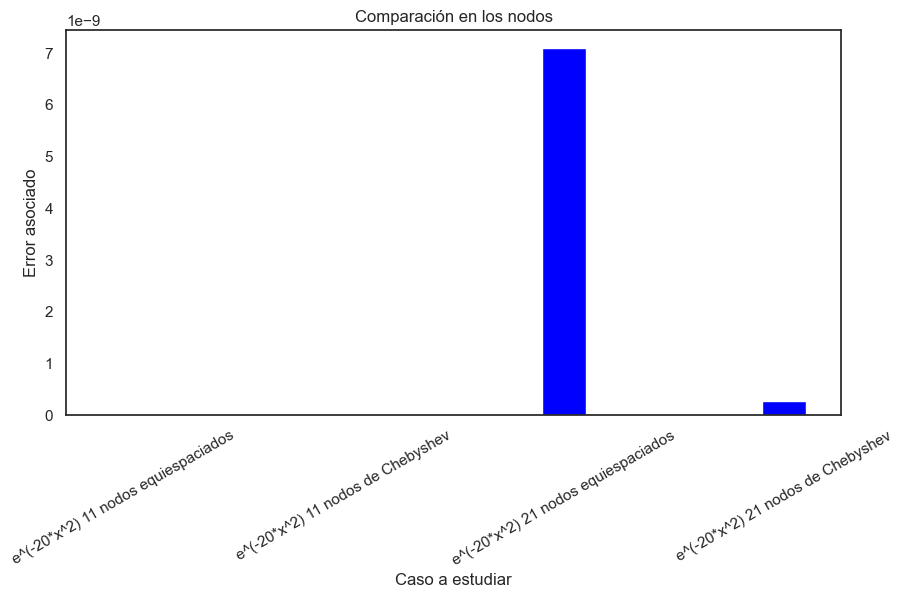

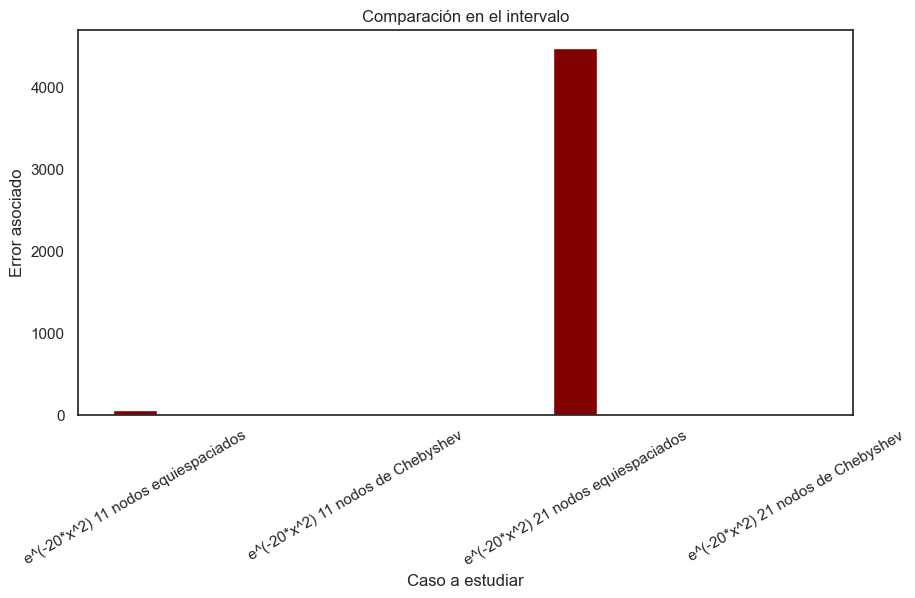

Los errores en los nodos son:  [1.57395801696408e-13, 6.09321005392697e-14, 7.08621065615380e-9, 2.74075316256615e-10]
Los errores en el intervalo son:  [62.2468352351988, 11.0541186805816, 4473.43569472720, 5.01339912467243]


In [119]:
plot_bars(error_dict_3)

Para la función e^(-20*x^2) tenemos un comportamiento similar al caso anterior:
- El caso de 21 nodos de Chebyshev es el mejor para el intervalo, aunque la evaluación solamnete en los nodos ajustados es mejor para 11 ndoos equiespaciados y para 11 nodos de Chebyshev.
- De nuevo, un comportamiento erroneo del polinomio en los extremos del intervalo para 21 nodos equidistantes provoca que este sea el peor polinomio de interpolación para el intervalo.

<a id="Tarea_2"></a>

# Tarea 2. Interpolación con splines.

Es un método de interpolación que emplea polinomios para cada intervalo de interpolación. El *spline* $S(x)$ es una función definida a trozos (uno por cada intervalo de interpolación) donde cada trozo es un polinomio $S_i(x)$ de grado $n$. Si $n=3$ se denomina *spline cúbico* y es el más empleado y el que se pide usar en esta actividad.

El *spline cúbico* $S(x)$ permite interpolar en el intervalo $[a,b]$ una función $f(x)$ conocida puntualmente en los *nodos*: $a=x_0<x_1<\cdots<x_{n-1}<x_n=b$, cumpliendo las siguientes condiciones:

1. $S(x)=S_i(x)=a_i+b_i(x-x_i)+c_i(x-x_i)^2+d_i(x-x_i)^3\,,\quad x\in[x_i,x_{i+1})\,,\quad\forall\,i=0,1,\ldots,n-1$<br><br>
2. $S(x_i)=f(x_i)\,,\quad\forall\,i=0,1,\ldots,n$<br><br>
3. $S_i(x_{i+1})=S_{i+1}(x_{i+1})\,,\quad S'_i(x_{i+1})=S'_{i+1}(x_{i+1})\,,\quad S''_i(x_{i+1})=S''_{i+1}(x_{i+1})\,,\quad\forall\,i=0,1,\ldots,n-2$<br><br>
4. Si la condición de contorno es $S''(x_0)=S''(x_n)=0$ entonces se llama *spline cúbico natural* (que es el que se usará).<br><br>
5. El cálculo de los coeficientes $a_i, b_i, c_i, d_i$ implica resolver un sistema de ecuaciones lineal.

Para obtener el *spline cúbico* $S(x)$ se usará la clase `scipy.interpolate.CubicSpline` de la biblioteca de computación científica `SciPy` (ver [documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html))


<hr>

<a id="Apartado_1"></a>

### <ins>Apartado 1.</ins> *Obtengan los puntos de la función en los nodos de interpolación seleccionados.*

Se pide utilizar $11$ y $21$ *nodos equidistantes* o *nodos* obtenidos a partir de los polinomios de *Chebyshev*. Dichos *nodos* se han calculado previamente y guardado en los archivos de *nodos equidistantes*: `nodos_equis_11.txt` y `nodos_equis_21.txt`, y en los archivos de *nodos Chebyshev*: `nodos_11.txt` y `nodos_21.txt`. Se procede a cargar las bibliotecas de Python requeridas y los *nodos*.

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd
import timeit
import matplotlib.pyplot as plt

n11eq = np.loadtxt('nodos_equis_11.txt', delimiter='\t')
n21eq = np.loadtxt('nodos_equis_21.txt', delimiter='\t')
n11ch = np.loadtxt('nodos_11.txt', delimiter='\t')
n21ch = np.loadtxt('nodos_21.txt', delimiter='\t')

Se calculan los valores en los *nodos* para cada función pedida:

$$f(x) = \mathrm{sen}(x)\,,\qquad g(x) = \frac{1}{1 + 25x^2}\,,\qquad h(x) = \mathrm{e}^{-20x^2}$$

In [ ]:
f11eq = np.sin(n11eq)
f21eq = np.sin(n21eq)
f11ch = np.sin(n11ch)
f21ch = np.sin(n21ch)

g11eq = 1/(1+(25*n11eq**2))
g21eq = 1/(1+(25*n21eq**2))
g11ch = 1/(1+(25*n11ch**2))
g21ch = 1/(1+(25*n21ch**2))

h11eq = np.exp(-20*n11eq**2)
h21eq = np.exp(-20*n21eq**2)
h11ch = np.exp(-20*n11ch**2)
h21ch = np.exp(-20*n21ch**2)

<hr>

<a id="Apartado_2"></a>

### <ins>Apartado 2.</ins> *Usen esos puntos para obtener el polinomio de interpolación con splines cúbicos.*

Se calculan los *splines cúbicos naturales* en cada caso:

In [ ]:
def calculaSplineCubicoNatural(nodos, valores):
    return CubicSpline(nodos, valores, bc_type='natural')

SCNf11eq = calculaSplineCubicoNatural(n11eq, f11eq)
SCNf21eq = calculaSplineCubicoNatural(n21eq, f21eq)
SCNf11ch = calculaSplineCubicoNatural(n11ch, f11ch)
SCNf21ch = calculaSplineCubicoNatural(n21ch, f21ch)

SCNg11eq = calculaSplineCubicoNatural(n11eq, g11eq)
SCNg21eq = calculaSplineCubicoNatural(n21eq, g21eq)
SCNg11ch = calculaSplineCubicoNatural(n11ch, g11ch)
SCNg21ch = calculaSplineCubicoNatural(n21ch, g21ch)

SCNh11eq = calculaSplineCubicoNatural(n11eq, h11eq)
SCNh21eq = calculaSplineCubicoNatural(n21eq, h21eq)
SCNh11ch = calculaSplineCubicoNatural(n11ch, h11ch)
SCNh21ch = calculaSplineCubicoNatural(n21ch, h21ch)

<hr>

<a id="Apartado_3"></a>

### <ins>Apartado 3.</ins> *Calculen el error de interpolación en cada caso.*

Se estima el *error absoluto medio* $\overline{\epsilon}$ entre los *splines cúbicos naturales* $S_f(x)$, $S_g(x)$ y $S_h(x)$ y las funciones $f(x)$, $g(x)$ y $h(x)$ repectivamente para cada caso del número y tipo de *nodos*. Para ello se toman $100$ valores de $x$ *equidistantes* con los que comparar las muestras exactas de $f(x)$, $g(x)$ y $h(x)$ con sus *splines* correspondientes en cada caso y se tabulan los resultados.

$$\overline{\epsilon}_f = \frac{\sum\left|S_f(x)-f(x)\right|}{100}\,,\qquad
\overline{\epsilon}_g = \frac{\sum\left|S_g(x)-g(x)\right|}{100}\,,\qquad
\overline{\epsilon}_h = \frac{\sum\left|S_h(x)-h(x)\right|}{100}$$

In [ ]:
xRef = np.linspace(-np.pi, np.pi, 100) # valores de x de referencia para tomar muestras exactas de f(x), g(x) y h(x) y de sus splines...

fVal = np.sin(xRef) # valores exactos de f(x)...
gVal = 1/(1+(25*xRef**2)) # valores exactos de g(x)...
hVal = np.exp(-20*xRef**2) # valores exactos de h(x)...

SCNf11eqVal = SCNf11eq(xRef) # valores del spline de f(x) con 11 nodos equidistantes...
SCNf21eqVal = SCNf21eq(xRef) # valores del spline de f(x) con 21 nodos equidistantes...
SCNf11chVal = SCNf11ch(xRef) # valores del spline de f(x) con 11 nodos Chebyshev...
SCNf21chVal = SCNf21ch(xRef) # valores del spline de f(x) con 21 nodos Chebyshev...

SCNg11eqVal = SCNg11eq(xRef) # valores del spline de g(x) con 11 nodos equidistantes...
SCNg21eqVal = SCNg21eq(xRef) # valores del spline de g(x) con 21 nodos equidistantes...
SCNg11chVal = SCNg11ch(xRef) # valores del spline de g(x) con 11 nodos Chebyshev...
SCNg21chVal = SCNg21ch(xRef) # valores del spline de g(x) con 21 nodos Chebyshev...

SCNh11eqVal = SCNh11eq(xRef) # valores del spline de h(x) con 11 nodos equidistantes...
SCNh21eqVal = SCNh21eq(xRef) # valores del spline de h(x) con 21 nodos equidistantes...
SCNh11chVal = SCNh11ch(xRef) # valores del spline de h(x) con 11 nodos Chebyshev...
SCNh21chVal = SCNh21ch(xRef) # valores del spline de h(x) con 21 nodos Chebyshev...

EAMf11eq = np.mean(np.abs(SCNf11eqVal-fVal)) # error absoluto medio del spline con f(x) para 11 nodos equidistantes...
EAMf21eq = np.mean(np.abs(SCNf21eqVal-fVal)) # error absoluto medio del spline con f(x) para 21 nodos equidistantes...
EAMf11ch = np.mean(np.abs(SCNf11chVal-fVal)) # error absoluto medio del spline con f(x) para 11 nodos Chebyshev...
EAMf21ch = np.mean(np.abs(SCNf21chVal-fVal)) # error absoluto medio del spline con f(x) para 21 nodos Chebyshev...

EAMg11eq = np.mean(np.abs(SCNg11eqVal-gVal)) # error absoluto medio del spline con g(x) para 11 nodos equidistantes...
EAMg21eq = np.mean(np.abs(SCNg21eqVal-gVal)) # error absoluto medio del spline con g(x) para 21 nodos equidistantes...
EAMg11ch = np.mean(np.abs(SCNg11chVal-gVal)) # error absoluto medio del spline con g(x) para 11 nodos Chebyshev...
EAMg21ch = np.mean(np.abs(SCNg21chVal-gVal)) # error absoluto medio del spline con g(x) para 21 nodos Chebyshev...

EAMh11eq = np.mean(np.abs(SCNh11eqVal-hVal)) # error absoluto medio del spline con h(x) para 11 nodos equidistantes...
EAMh21eq = np.mean(np.abs(SCNh21eqVal-hVal)) # error absoluto medio del spline con h(x) para 21 nodos equidistantes...
EAMh11ch = np.mean(np.abs(SCNh11chVal-hVal)) # error absoluto medio del spline con h(x) para 11 nodos Chebyshev...
EAMh21ch = np.mean(np.abs(SCNh21chVal-hVal)) # error absoluto medio del spline con h(x) para 21 nodos Chebyshev...

tablaErrores = pd.DataFrame({'11 nodos equidistantes': [EAMf11eq, EAMg11eq, EAMh11eq], '21 nodos equidistantes': [EAMf21eq, EAMg21eq, EAMh21eq], '11 nodos Chebyshev': [EAMf11ch, EAMg11ch, EAMh11ch], '21 nodos Chebyshev': [EAMf21ch, EAMg21ch, EAMh21ch]}, index=['$\overline{\epsilon}_f$', '$\overline{\epsilon}_g$', '$\overline{\epsilon}_h$'])
display(HTML('<a id="Apartado_3_Out"></a>'))
tablaErrores

11 nodos equidistantes  21 nodos equidistantes  \
$\overline{\epsilon}_f$                0.000158                0.000009   
$\overline{\epsilon}_g$                0.059047                0.010446   
$\overline{\epsilon}_h$                0.072905                0.007941   

                         11 nodos Chebyshev  21 nodos Chebyshev  
$\overline{\epsilon}_f$            0.000429            0.000025  
$\overline{\epsilon}_g$            0.098134            0.030192  
$\overline{\epsilon}_h$            0.117034            0.036316

<hr>

<a id="Apartado_4"></a>

### <ins>Apartado 4.</ins> *Calculen los tiempos de cálculo de los polinomios.*

Se estima el *tiempo promedio de cálculo* de los *splines cúbicos naturales* mediante la función `timeit.timeit()` (ver [documentación](https://docs.python.org/3/library/timeit.html)) y se tabulan los resultados en *milisegundos*.

In [ ]:
def milisegundosCalculo(stmt):
    return 1000*timeit.timeit(stmt=stmt, globals=globals(), number=10)

tSCNf11eq = milisegundosCalculo('calculaSplineCubicoNatural(n11eq, f11eq)')
tSCNg11eq = milisegundosCalculo('calculaSplineCubicoNatural(n11eq, g11eq)')
tSCNh11eq = milisegundosCalculo('calculaSplineCubicoNatural(n11eq, h11eq)')

tSCNf21eq = milisegundosCalculo('calculaSplineCubicoNatural(n21eq, f21eq)')
tSCNg21eq = milisegundosCalculo('calculaSplineCubicoNatural(n21eq, g21eq)')
tSCNh21eq = milisegundosCalculo('calculaSplineCubicoNatural(n21eq, h21eq)')

tSCNf11ch = milisegundosCalculo('calculaSplineCubicoNatural(n11ch, f11ch)')
tSCNg11ch = milisegundosCalculo('calculaSplineCubicoNatural(n11ch, g11ch)')
tSCNh11ch = milisegundosCalculo('calculaSplineCubicoNatural(n11ch, h11ch)')

tSCNf21ch = milisegundosCalculo('calculaSplineCubicoNatural(n21ch, f21ch)')
tSCNg21ch = milisegundosCalculo('calculaSplineCubicoNatural(n21ch, g21ch)')
tSCNh21ch = milisegundosCalculo('calculaSplineCubicoNatural(n21ch, h21ch)')

tablaTiempos = pd.DataFrame({'11 nodos equidistantes (ms)': [tSCNf11eq, tSCNg11eq, tSCNh11eq], '21 nodos equidistantes (ms)': [tSCNf21eq, tSCNg21eq, tSCNh21eq], '11 nodos Chebyshev (ms)': [tSCNf11ch, tSCNg11ch, tSCNh11ch], '21 nodos Chebyshev (ms)': [tSCNf21ch, tSCNg21ch, tSCNh21ch]}, index=['calcular $S_f(x)$', 'calcular $S_g(x)$', 'calcular $S_h(x)$'])
display(HTML('<a id="Apartado_4_Out"></a>'))
tablaTiempos

11 nodos equidistantes (ms)  21 nodos equidistantes (ms)  \
calcular $S_f(x)$                       2.3948                       2.0003   
calcular $S_g(x)$                       1.9328                       1.8385   
calcular $S_h(x)$                       1.8535                       1.8746   

                   11 nodos Chebyshev (ms)  21 nodos Chebyshev (ms)  
calcular $S_f(x)$                   1.8201                   2.0136  
calcular $S_g(x)$                   1.8237                   2.0213  
calcular $S_h(x)$                   2.0191                   2.0461

<hr>

<a id="Apartado_5"></a>

### <ins>Apartado 5.</ins> *Dibujen las gráficas de la función real y del polinomio obtenido.*

Se carga la configuración para *plotear* las gráficas...

In [ ]:
%config InlineBackend.figure_format = 'svg' # para mejorar la calidad visual de las gráficas...
plt.rcdefaults()
#plt.rcParams.keys()
dpi = plt.rcParams['figure.dpi']
plt.rc('figure', figsize=(2*450/dpi, 2*350/dpi))
plt.rc('font', size=12)
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage[cm]{sfmath}')
plt.rc('axes', titley=1.05)

<hr>

<a id="Ploteo_f"></a>

Se *plotean* las gráficas $f(x) = \mathrm{sen}(x)$ y sus *splines*:

* $S_f^{(11eq)}(x)\rightarrow$ es el *spline* calculado a partir de los $11$ *nodos equidistantes*<br><br>
* $S_f^{(21eq)}(x)\rightarrow$ es el *spline* calculado a partir de los $21$ *nodos equidistantes*<br><br>
* $S_f^{(11ch)}(x)\rightarrow$ es el *spline* calculado a partir de los $11$ *nodos Chebyshev*<br><br>
* $S_f^{(21ch)}(x)\rightarrow$ es el *spline* calculado a partir de los $21$ *nodos Chebyshev*

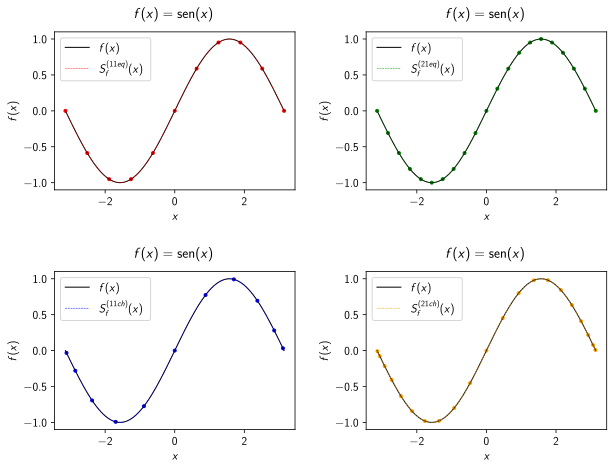

In [ ]:
plt.subplot(2, 2, 1)
plt.title(r'$f(x) = \mathrm{sen}(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.plot(xRef, fVal, label=r'$f(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNf11eqVal, label=r'$S_f^{(11eq)}(x)$', color='red', linewidth=0.5, linestyle='--')
plt.scatter(n11eq, f11eq, color='red', marker='.')
plt.legend()

plt.subplot(2, 2, 2)
plt.title(r'$f(x) = \mathrm{sen}(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.plot(xRef, fVal, label=r'$f(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNf21eqVal, label=r'$S_f^{(21eq)}(x)$', color='green', linewidth=0.5, linestyle='--')
plt.scatter(n21eq, f21eq, color='green', marker='.')
plt.legend()

plt.subplot(2, 2, 3)
plt.title(r'$f(x) = \mathrm{sen}(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.plot(xRef, fVal, label=r'$f(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNf11chVal, label=r'$S_f^{(11ch)}(x)$', color='blue', linewidth=0.5, linestyle='--')
plt.scatter(n11ch, f11ch, color='blue', marker='.')
plt.legend()

plt.subplot(2, 2, 4)
plt.title(r'$f(x) = \mathrm{sen}(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.plot(xRef, fVal, label=r'$f(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNf21chVal, label=r'$S_f^{(21ch)}(x)$', color='orange', linewidth=0.5, linestyle='--')
plt.scatter(n21ch, f21ch, color='orange', marker='.')
plt.legend()

plt.tight_layout(pad=2.0)
display(HTML('<a id="Apartado_5_Out_f"></a>'))
plt.show()

<hr>

<a id="Ploteo_g"></a>

Se *plotean* las gráficas $g(x) = {\displaystyle\frac{1}{1 + 25x^2}}$ y sus *splines*:

* $S_g^{(11eq)}(x)\rightarrow$ es el *spline* calculado a partir de los $11$ *nodos equidistantes*<br><br>
* $S_g^{(21eq)}(x)\rightarrow$ es el *spline* calculado a partir de los $21$ *nodos equidistantes*<br><br>
* $S_g^{(11ch)}(x)\rightarrow$ es el *spline* calculado a partir de los $11$ *nodos Chebyshev*<br><br>
* $S_g^{(21ch)}(x)\rightarrow$ es el *spline* calculado a partir de los $21$ *nodos Chebyshev*

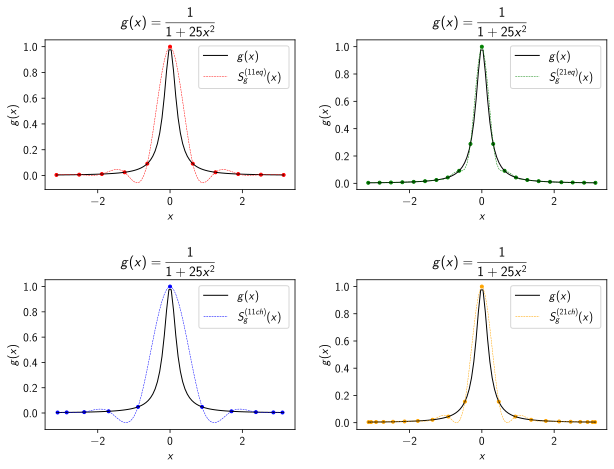

In [ ]:
plt.subplot(2, 2, 1)
plt.title(r'$g(x) = {\displaystyle\frac{1}{1 + 25x^2}}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.plot(xRef, gVal, label=r'$g(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNg11eqVal, label=r'$S_g^{(11eq)}(x)$', color='red', linewidth=0.5, linestyle='--')
plt.scatter(n11eq, g11eq, color='red', marker='.')
plt.legend()

plt.subplot(2, 2, 2)
plt.title(r'$g(x) = {\displaystyle\frac{1}{1 + 25x^2}}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.plot(xRef, gVal, label=r'$g(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNg21eqVal, label=r'$S_g^{(21eq)}(x)$', color='green', linewidth=0.5, linestyle='--')
plt.scatter(n21eq, g21eq, color='green', marker='.')
plt.legend()

plt.subplot(2, 2, 3)
plt.title(r'$g(x) = {\displaystyle\frac{1}{1 + 25x^2}}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.plot(xRef, gVal, label=r'$g(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNg11chVal, label=r'$S_g^{(11ch)}(x)$', color='blue', linewidth=0.5, linestyle='--')
plt.scatter(n11ch, g11ch, color='blue', marker='.')
plt.legend()

plt.subplot(2, 2, 4)
plt.title(r'$g(x) = {\displaystyle\frac{1}{1 + 25x^2}}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.plot(xRef, gVal, label=r'$g(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNg21chVal, label=r'$S_g^{(21ch)}(x)$', color='orange', linewidth=0.5, linestyle='--')
plt.scatter(n21ch, g21ch, color='orange', marker='.')
plt.legend()

plt.tight_layout(pad=2.0)
display(HTML('<a id="Apartado_5_Out_g"></a>'))
plt.show()

<hr>

<a id="Ploteo_h"></a>

Se *plotean* las gráficas $h(x) = \mathrm{e}^{-20x^2}$ y sus *splines*:

* $S_h^{(11eq)}(x)\rightarrow$ es el *spline* calculado a partir de los $11$ *nodos equidistantes*<br><br>
* $S_h^{(21eq)}(x)\rightarrow$ es el *spline* calculado a partir de los $21$ *nodos equidistantes*<br><br>
* $S_h^{(11ch)}(x)\rightarrow$ es el *spline* calculado a partir de los $11$ *nodos Chebyshev*<br><br>
* $S_h^{(21ch)}(x)\rightarrow$ es el *spline* calculado a partir de los $21$ *nodos Chebyshev*

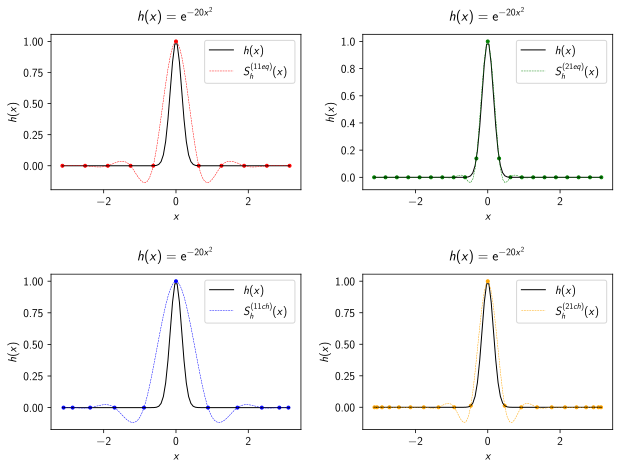

In [ ]:
plt.subplot(2, 2, 1)
plt.title(r'$h(x) = \mathrm{e}^{-20x^2}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$h(x)$')
plt.plot(xRef, hVal, label=r'$h(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNh11eqVal, label=r'$S_h^{(11eq)}(x)$', color='red', linewidth=0.5, linestyle='--')
plt.scatter(n11eq, h11eq, color='red', marker='.')
plt.legend()

plt.subplot(2, 2, 2)
plt.title(r'$h(x) = \mathrm{e}^{-20x^2}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$h(x)$')
plt.plot(xRef, hVal, label=r'$h(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNh21eqVal, label=r'$S_h^{(21eq)}(x)$', color='green', linewidth=0.5, linestyle='--')
plt.scatter(n21eq, h21eq, color='green', marker='.')
plt.legend()

plt.subplot(2, 2, 3)
plt.title(r'$h(x) = \mathrm{e}^{-20x^2}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$h(x)$')
plt.plot(xRef, hVal, label=r'$h(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNh11chVal, label=r'$S_h^{(11ch)}(x)$', color='blue', linewidth=0.5, linestyle='--')
plt.scatter(n11ch, h11ch, color='blue', marker='.')
plt.legend()

plt.subplot(2, 2, 4)
plt.title(r'$h(x) = \mathrm{e}^{-20x^2}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$h(x)$')
plt.plot(xRef, hVal, label=r'$h(x)$', color='black', linewidth=1)
plt.plot(xRef, SCNh21chVal, label=r'$S_h^{(21ch)}(x)$', color='orange', linewidth=0.5, linestyle='--')
plt.scatter(n21ch, h21ch, color='orange', marker='.')
plt.legend()

plt.tight_layout(pad=2.0)
display(HTML('<a id="Apartado_5_Out_h"></a>'))
plt.show()

<hr>

<a id="Apartado_6"></a>

### <ins>Apartado 6.</ins> *Presenten las conclusiones obtenidas indicando las diferencias encontradas, contrastando los valores obtenidos en los errores, en el tiempo de cálculo y el análisis de las gráficas.*

Se observa claramente que la función [f(x)](#Apartado_5_Out_f) queda muy bien estimada por sus *splines* como confirman los *errores absolutos medios* (ver [tabla de errores absolutos medios](#Apartado_3_Out)). Para [g(x)](#Apartado_5_Out_g) y [h(x)](#Apartado_5_Out_h) se observa mejor estimación sobre todo para los *splines* calculados con $21$ *nodos equidistantes*, y usar *nodos Chebyshev* no es mejor. En resumen, duplicar los intervalos de interpolación mejora en todos los casos la estimación de las funciones mediante sus *splines* pero son mejores en el caso de *nodos equidistantes* que en el caso de *nodos Chebyshev*, claramente.

De la [tabla de tiempos promedios de cálculo](#Apartado_4_Out) se puede concluir que más o menos en todos los casos se tarda apróximadamente lo mismo. En este apartado es difícil de comparar los casos ya que influyen muchos factores como la disponibilidad de recursos del sistema en el momento del cálculo, además al realizar las tareas seguidas, el sistema se optimiza con los cálculos previos mejorando el desempeño en los seguientes.